<a href="https://colab.research.google.com/github/Jassie22/BSc-Chem-project/blob/main/methanol_flash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **A notebook to flesh out the calculations of the methanol flash photolysis**


In [ ]:
#imports
from tabulate import tabulate
from google.colab import drive
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import math
from scipy.stats import zscore
from scipy import stats
import seaborn as sns

# **Initial Loading of Data**

import folder from drive:

In [ ]:
try:
  drive.mount('/content/drive')
except Exception as e:
    print("Error mounting Drive:", e)
  #set path
folder_path = '/content/drive/MyDrive/Methanol'

try:
    drive.mount('/content/drive')
except Exception as e:
    print("Error mounting Drive:", e)

# Set path for UVVIS
UVVIS_PATH = '/content/drive/MyDrive/UV VIS'
#removes unwanted files
def filter_filename(filename):
    parts = filename.split(" ")
    number_part = parts[-1]
    return number_part.isdigit() and "sad" not in filename and "pointy" not in filename
# Count original files
original_file_count = len(os.listdir(folder_path))
# filter filenames using the function
filtered_filenames = [filename for filename in os.listdir(folder_path) if filter_filename(filename)]


Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Make DataFrame from each file:

In [ ]:
# Create a dictionary to store the DataFrames
dfs = {}

# Iterate through the filtered filenames
for filename in filtered_filenames:
  file_path = os.path.join(folder_path, filename)  # Construct full file path
  try:
    df = pd.read_csv(file_path,delimiter='\t')  # Read the file into a DataFrame
    # Replace the second column (index 1) with absorbance values
    df.iloc[:, 1] = -df.iloc[:, 1]
    #test
    #df.iloc[:, 1] =1- df.iloc[:, 1].apply(lambda val: math.log10(val))
    dfs[filename] = df  # Store the DataFrame in the dictionary with the filename as key
  except Exception as e:
    print(f"Error reading file {filename}: {e}")

print(f"Created {len(dfs)} DataFrames from filtered files.")

# Access DataFrames using their filenames:
for filename, df in dfs.items():
  print(f"DataFrame for file '{filename}':")
  print(df.head())  # Print the first few rows of each DataFrame

Created 125 DataFrames from filtered files.
DataFrame for file 'Methanol 23 C, 200 us flash, 2 s duration, 1':
   -0.200  3.693
0  -0.198 -3.692
1  -0.196 -3.694
2  -0.194 -3.693
3  -0.192 -3.675
4  -0.190 -3.693
DataFrame for file 'Methanol 23 C, 200 us flash, 2 s duration, 2':
   -0.200  3.575
0  -0.198 -3.573
1  -0.196 -3.575
2  -0.194 -3.576
3  -0.192 -3.573
4  -0.190 -3.578
DataFrame for file 'Methanol 23 C, 200 us flash, 2 s duration, 3':
   -0.200  3.712
0  -0.198 -3.711
1  -0.196 -3.705
2  -0.194 -3.705
3  -0.192 -3.709
4  -0.190 -3.708
DataFrame for file 'Methanol 23 C, 200 us flash, 2 s duration, 5':
   -0.200  3.742
0  -0.198 -3.740
1  -0.196 -3.744
2  -0.194 -3.739
3  -0.192 -3.743
4  -0.190 -3.740
DataFrame for file 'Methanol 23 C, 200 us flash, 2 s duration, 4':
   -0.200  3.705
0  -0.198 -3.706
1  -0.196 -3.709
2  -0.194 -3.708
3  -0.192 -3.707
4  -0.190 -3.708
DataFrame for file 'Methanol 33 C, 200 us flash, 2 s duration, 2':
   -0.200  3.717
0  -0.198 -3.714
1  -0.196 

In [ ]:
# Create an empty DataFrame to store all data
info = pd.DataFrame(columns=["Solvent", "Temperature (C)", "Flash Rate (us)", "Duration (s)", "Trial num."])

for filename in filtered_filenames:
    try:
        # Split filename on spaces, handling potential trailing spaces
        parts = filename.strip().split()

        # Extract information from specific parts
        solvent = parts[0]
        temperature = int(parts[1].split("C")[0])
        flash_rate = int(parts[3].split("us")[0])
        duration = float(parts[-4].split("s")[0])
        exp_num = int(parts[-1])

        data = {
            "Solvent": solvent,
            "Temperature (C)": temperature,
            "Flash Rate (us)": flash_rate,
            "Duration (s)": duration,
            "Trial num.": exp_num
        }

        info = info.append(data, ignore_index=True)  # Add a new row to the DataFrame

    except Exception as e:
        print(f"Error processing file: {filename}, Error: {str(e)}")

print(info)
#to note one file lost here

Error processing file: Methanol 23 C, 200 us flash, 2 s duration, 1, Error: 'DataFrame' object has no attribute 'append'
Error processing file: Methanol 23 C, 200 us flash, 2 s duration, 2, Error: 'DataFrame' object has no attribute 'append'
Error processing file: Methanol 23 C, 200 us flash, 2 s duration, 3, Error: 'DataFrame' object has no attribute 'append'
Error processing file: Methanol 23 C, 200 us flash, 2 s duration, 5, Error: 'DataFrame' object has no attribute 'append'
Error processing file: Methanol 23 C, 200 us flash, 2 s duration, 4, Error: 'DataFrame' object has no attribute 'append'
Error processing file: Methanol 33 C, 200 us flash, 2 s duration, 2, Error: 'DataFrame' object has no attribute 'append'
Error processing file: Methanol 33 C, 200 us flash, 2 s duration, 1, Error: 'DataFrame' object has no attribute 'append'
Error processing file: Methanol 28 C, 200 us flash, 2 s duration, 1, Error: 'DataFrame' object has no attribute 'append'
Error processing file: Methanol 

**original flash photolysis graphs**

Plotting DataFrame 1 for file 'Methanol 23 C, 200 us flash, 2 s duration, 1':


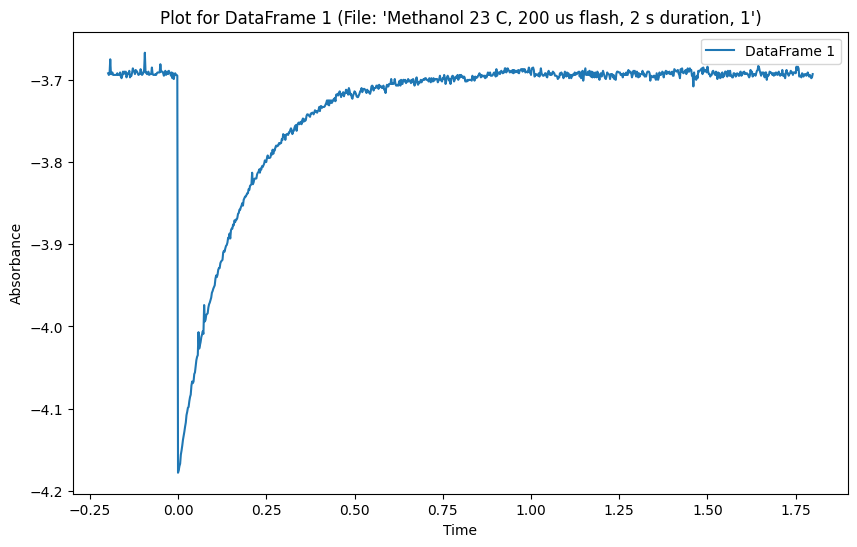

Plotting DataFrame 2 for file 'Methanol 23 C, 200 us flash, 2 s duration, 2':


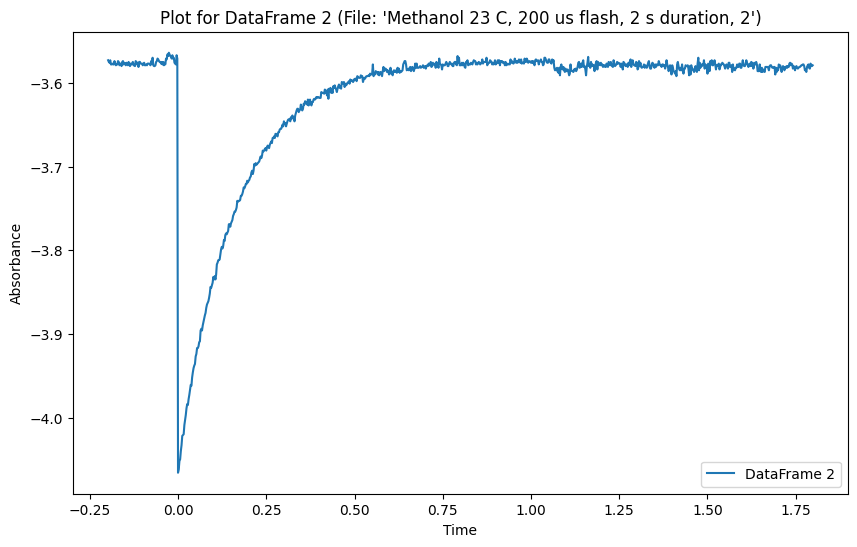

Plotting DataFrame 3 for file 'Methanol 23 C, 200 us flash, 2 s duration, 3':


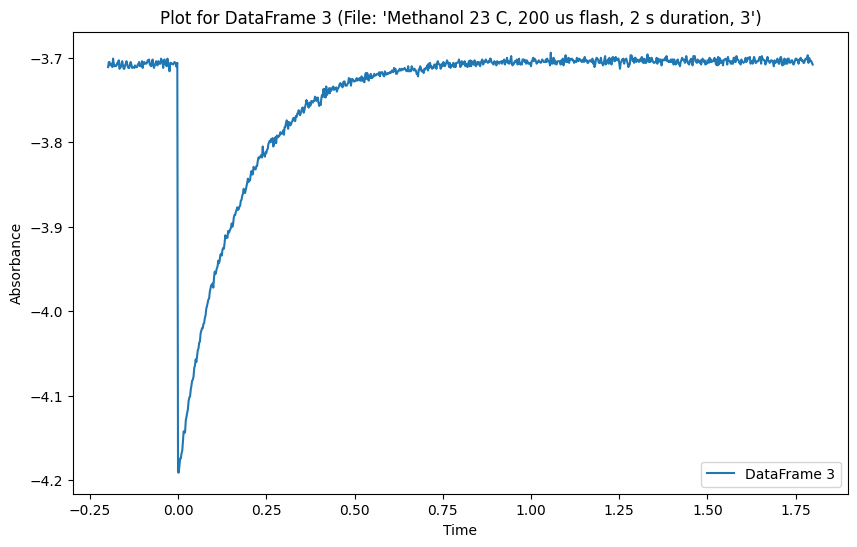

Plotting DataFrame 4 for file 'Methanol 23 C, 200 us flash, 2 s duration, 5':


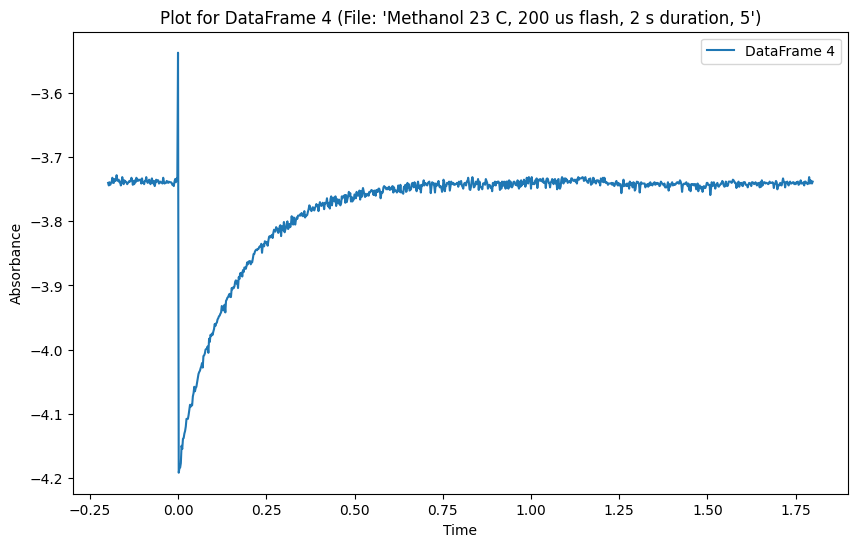

Plotting DataFrame 5 for file 'Methanol 23 C, 200 us flash, 2 s duration, 4':


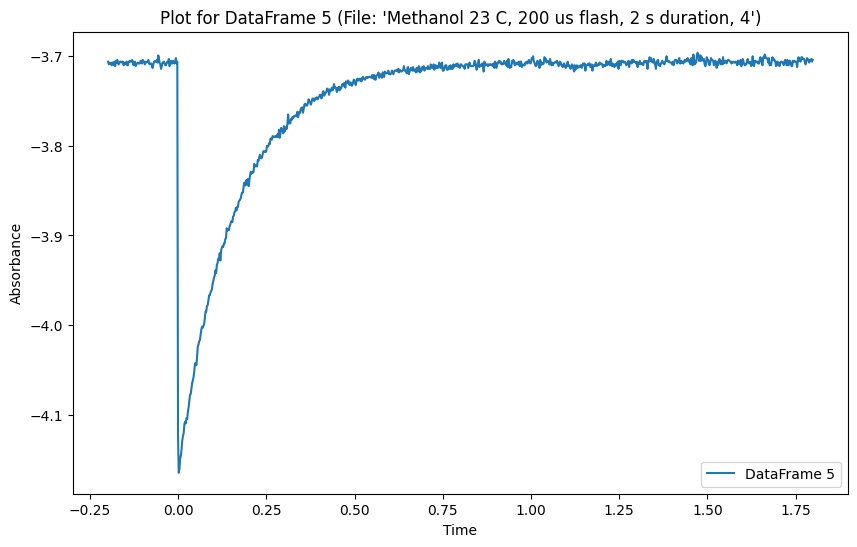

Plotting DataFrame 6 for file 'Methanol 33 C, 200 us flash, 2 s duration, 2':


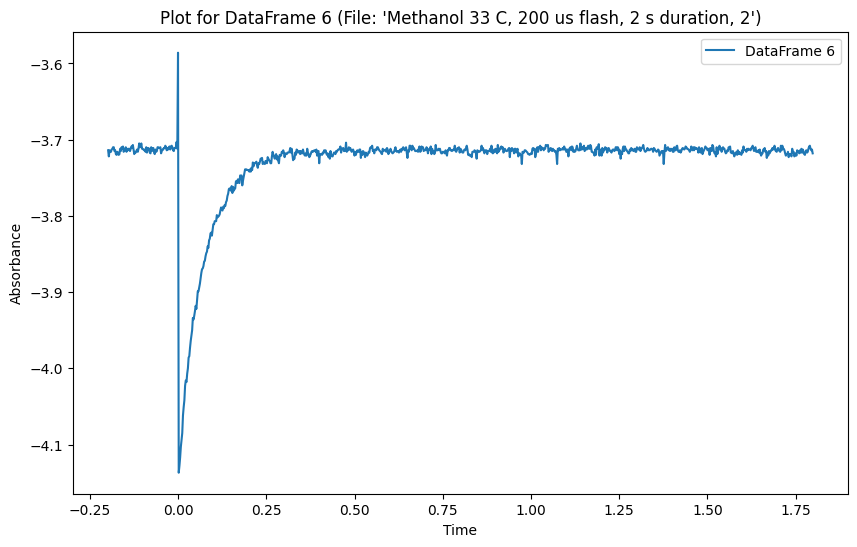

Plotting DataFrame 7 for file 'Methanol 33 C, 200 us flash, 2 s duration, 1':


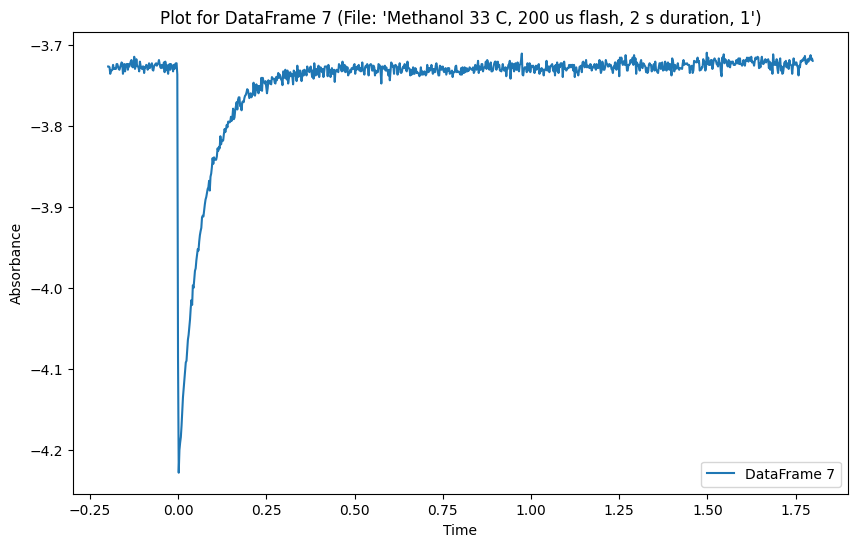

Plotting DataFrame 8 for file 'Methanol 28 C, 200 us flash, 2 s duration, 1':


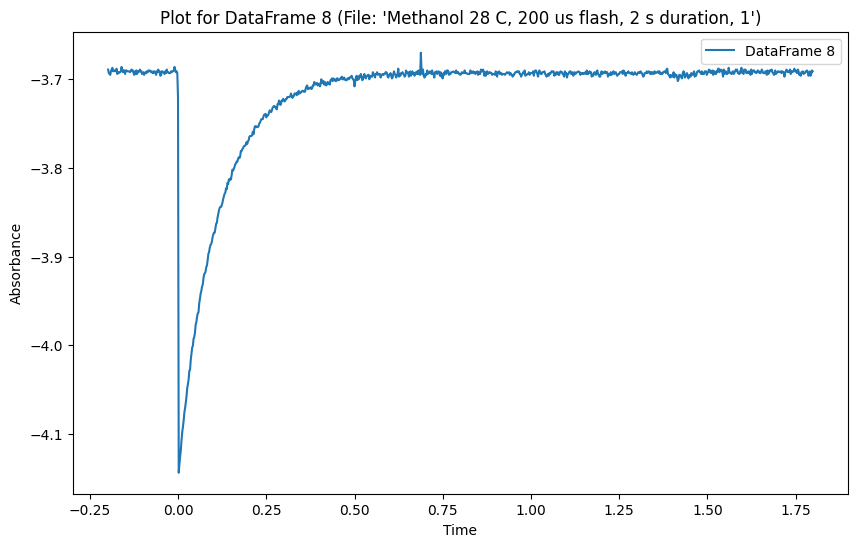

Plotting DataFrame 9 for file 'Methanol 33 C, 200 us flash, 2 s duration, 5':


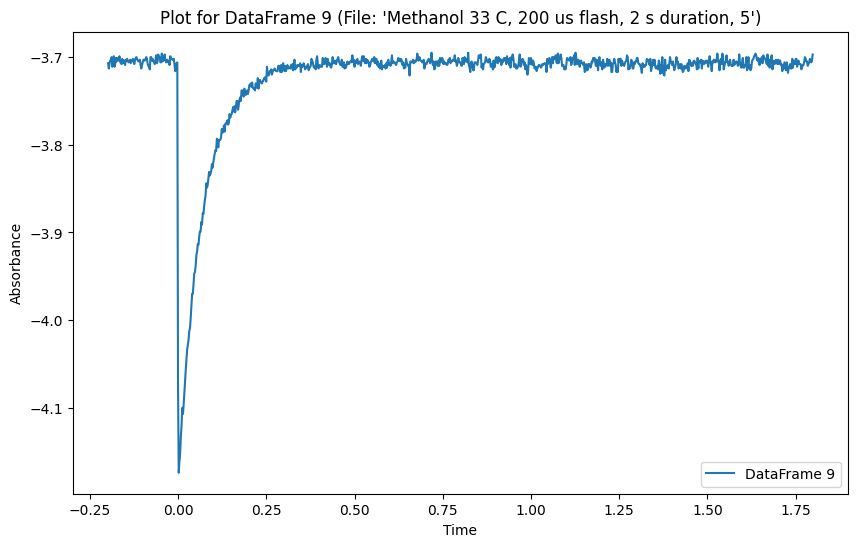

Plotting DataFrame 10 for file 'Methanol 43 C, 200 us flash, 0.5 s duration, 2':


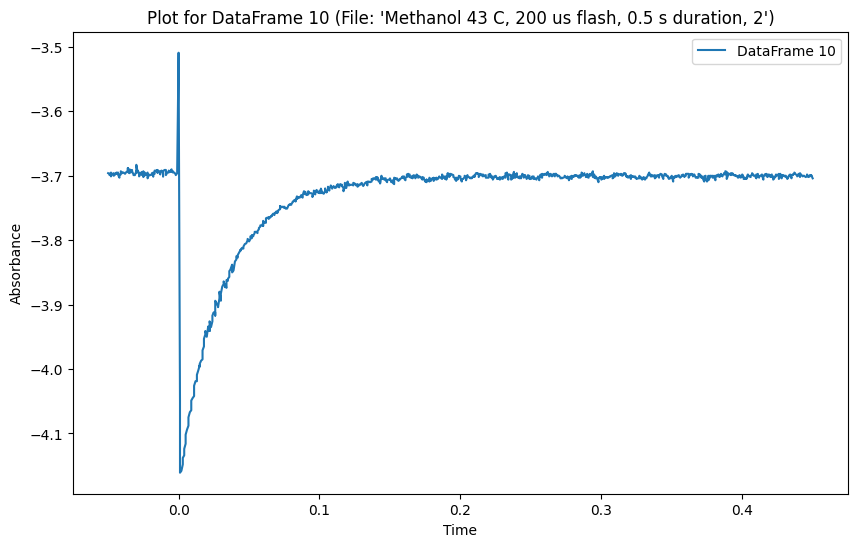

Plotting DataFrame 11 for file 'Methanol 28 C, 200 us flash, 2 s duration, 4':


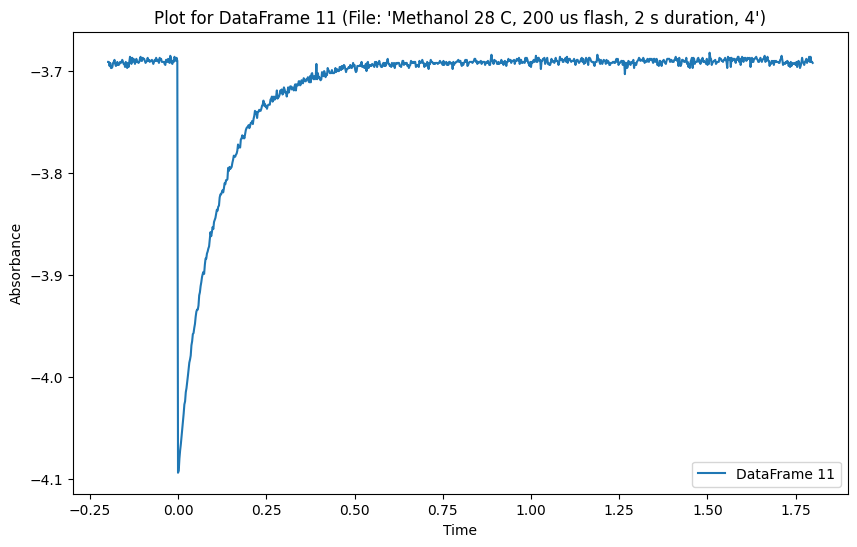

Plotting DataFrame 12 for file 'Methanol 38 C, 200 us flash, 2 s duration, 3':


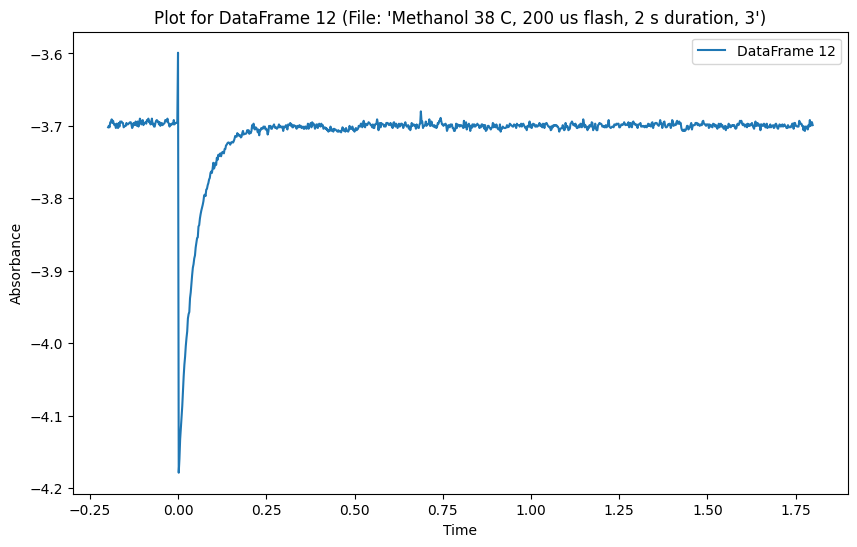

Plotting DataFrame 13 for file 'Methanol 28 C, 200 us flash, 2 s duration, 5':


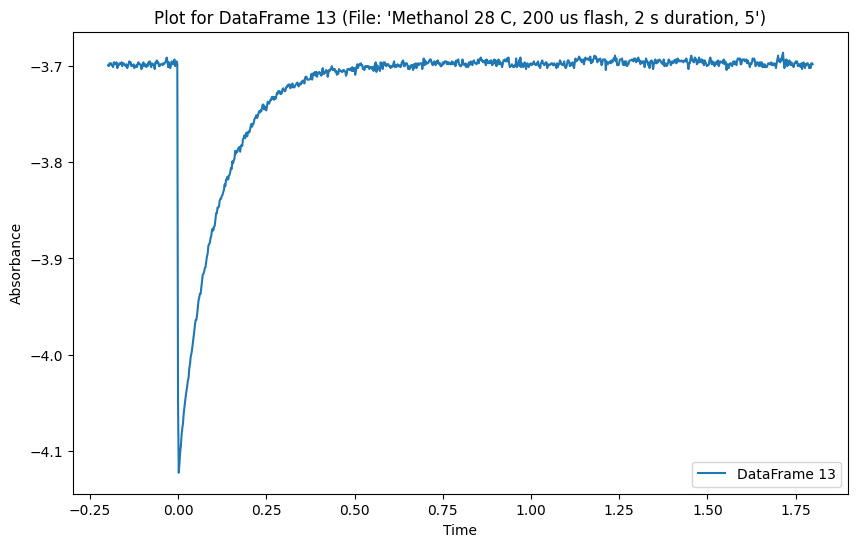

Plotting DataFrame 14 for file 'Methanol 33 C, 200 us flash, 1 s duration, 3':


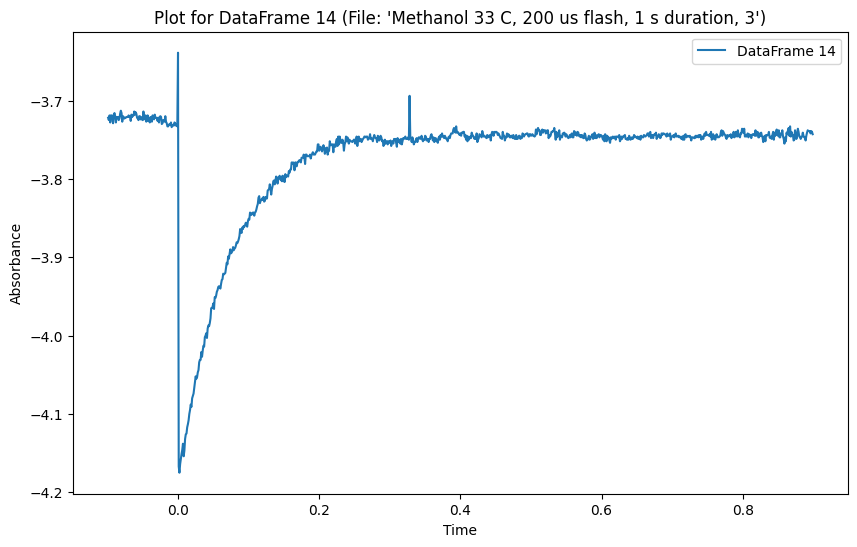

Plotting DataFrame 15 for file 'Methanol 33 C, 200 us flash, 2 s duration, 3':


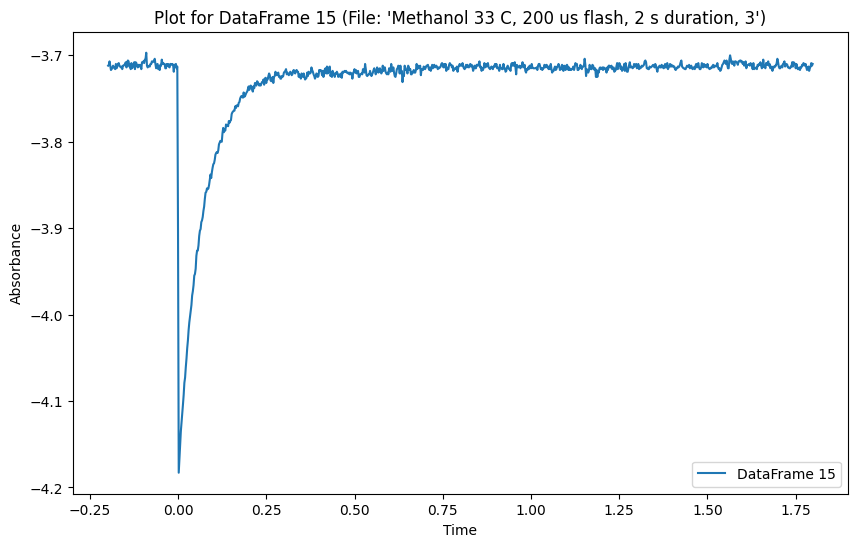

Plotting DataFrame 16 for file 'Methanol 43 C, 200 us flash, 1 s duration, 2':


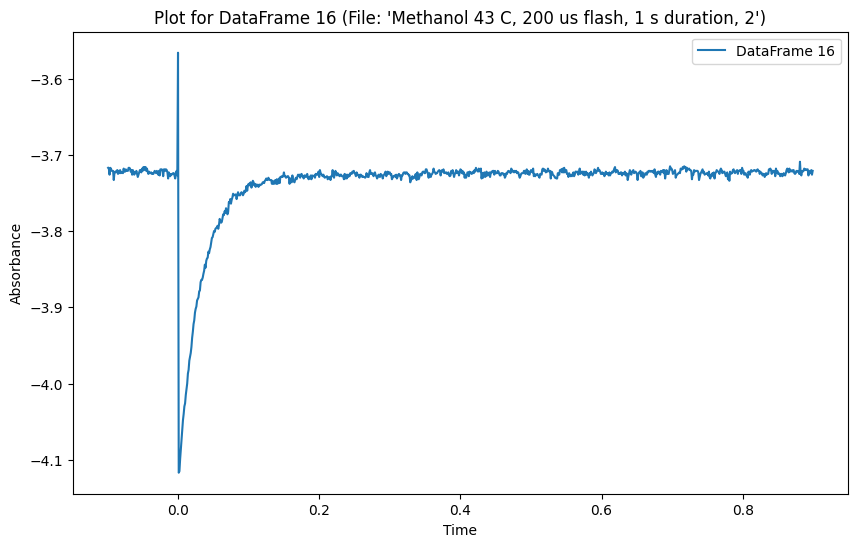

Plotting DataFrame 17 for file 'Methanol 33 C, 200 us flash, 2 s duration, 4':


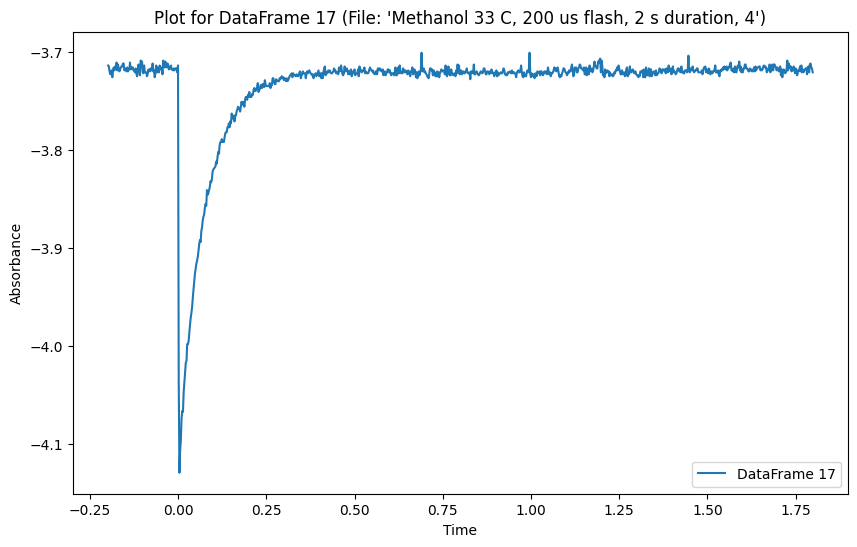

Plotting DataFrame 18 for file 'Methanol 28 C, 200 us flash, 2 s duration, 3':


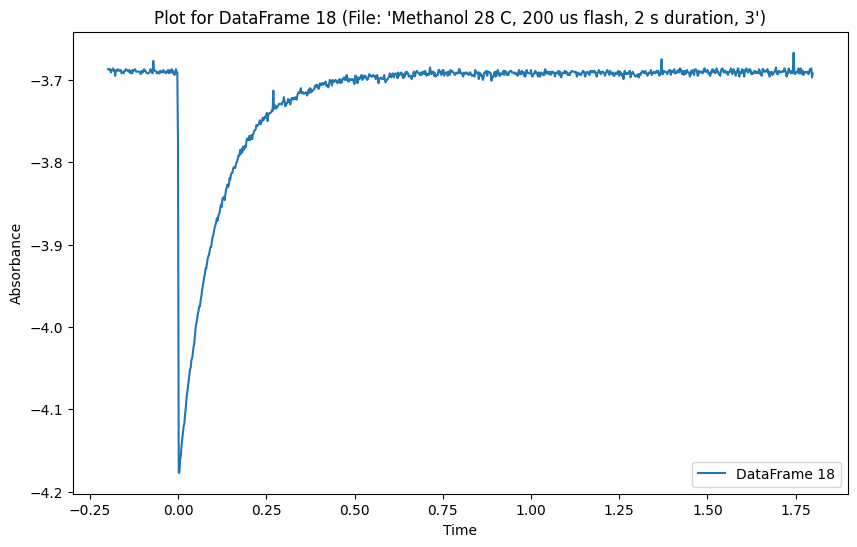

Plotting DataFrame 19 for file 'Methanol 38 C, 200 us flash, 2 s duration, 2':


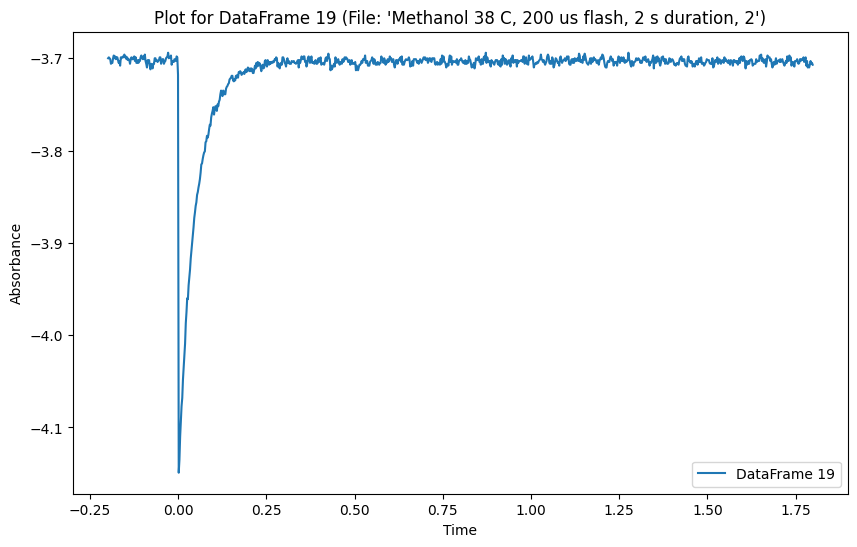

Plotting DataFrame 20 for file 'Methanol 33 C, 200 us flash, 1 s duration, 1':


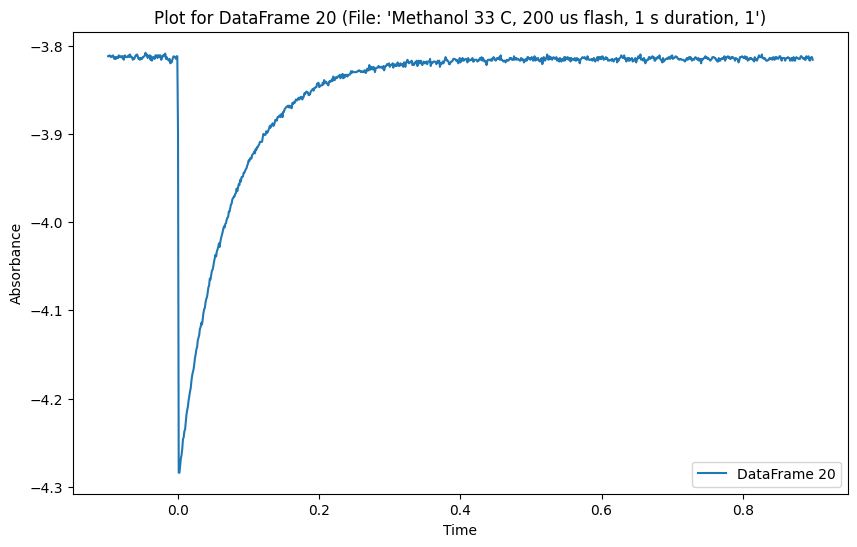

Plotting DataFrame 21 for file 'Methanol 38 C, 200 us flash, 2 s duration, 4':


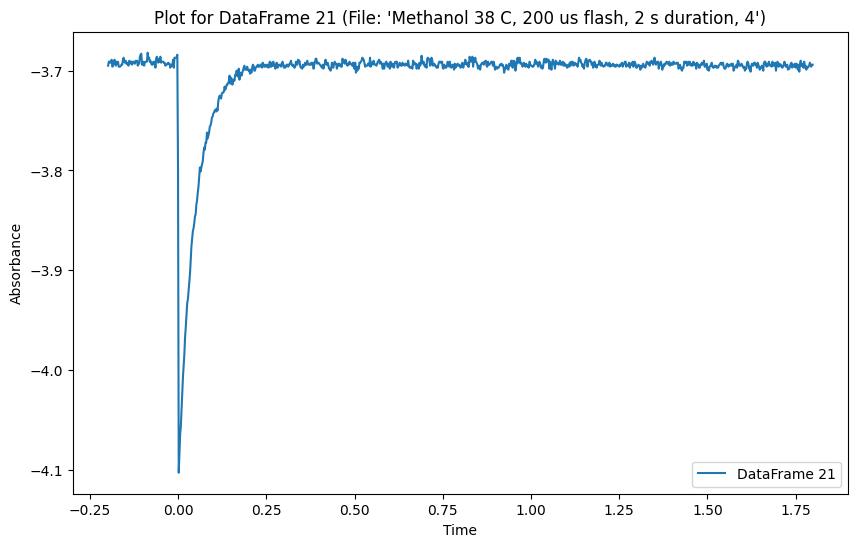

Plotting DataFrame 22 for file 'Methanol 38 C, 200 us flash, 2 s duration, 1':


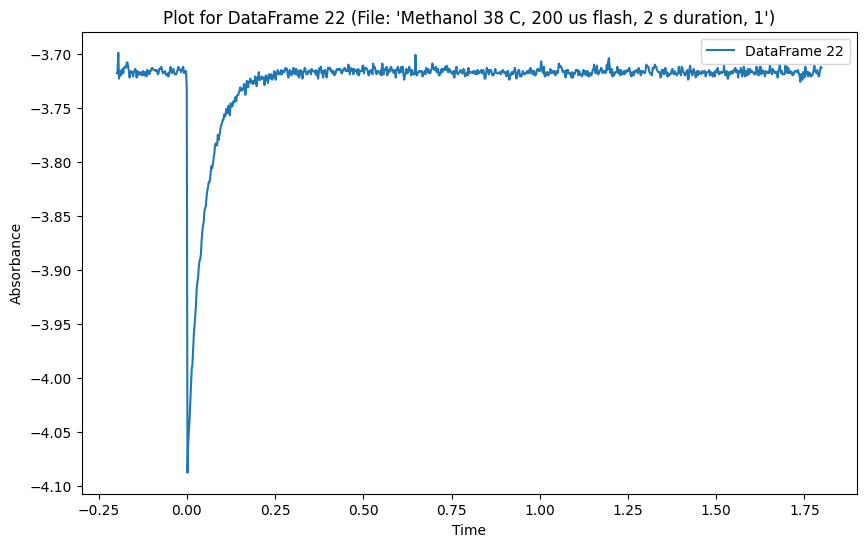

Plotting DataFrame 23 for file 'Methanol 43 C, 200 us flash, 0.5 s duration, 3':


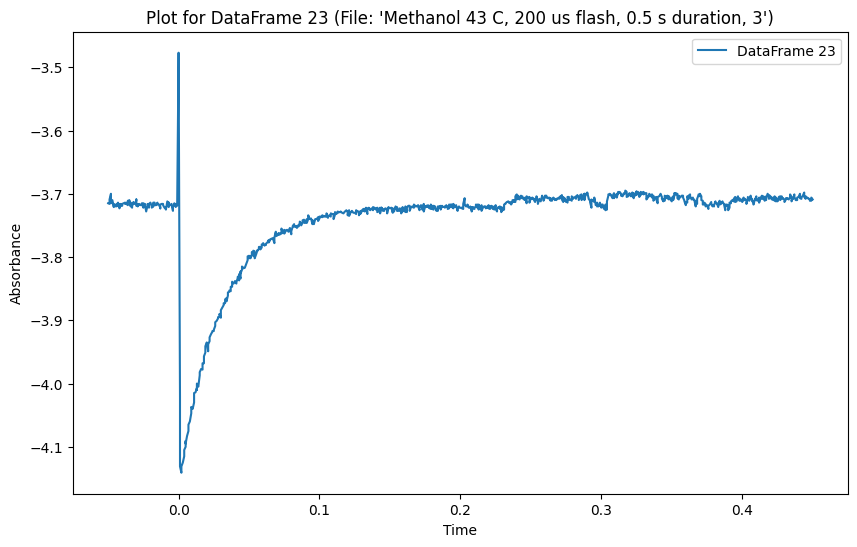

Plotting DataFrame 24 for file 'Methanol 28 C, 200 us flash, 2 s duration, 2':


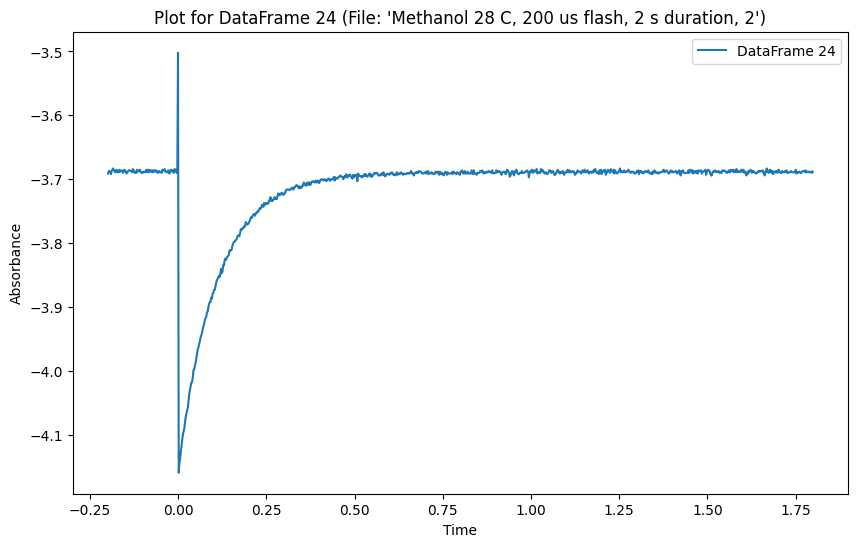

Plotting DataFrame 25 for file 'Methanol 38 C, 200 us flash, 2 s duration, 5':


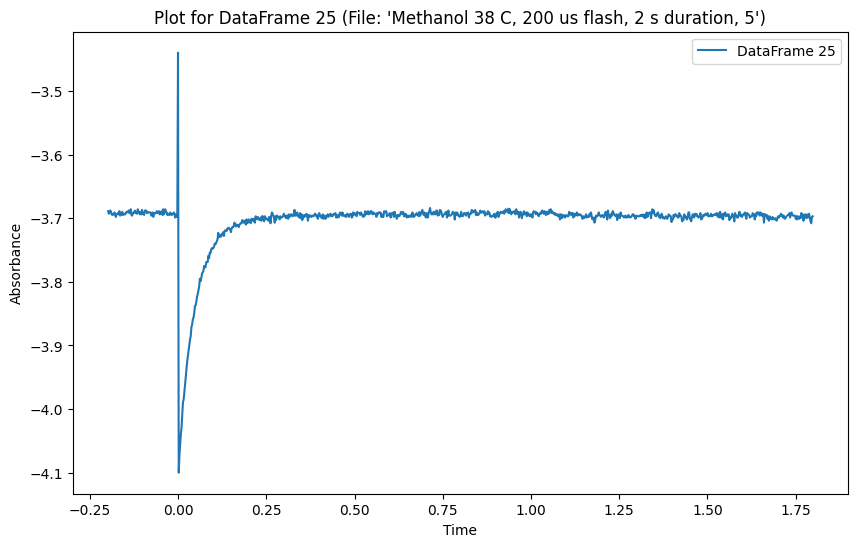

Plotting DataFrame 26 for file 'DCM 20 C, 200 us flash, 0.5 s duration, 3':


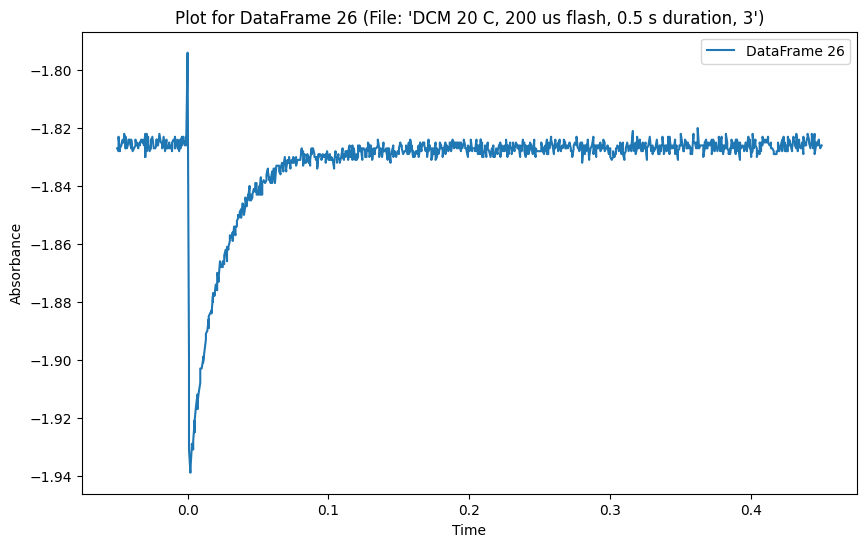

Plotting DataFrame 27 for file 'DCM 22 C, 200 us flash, 0.5 s duration, 1':


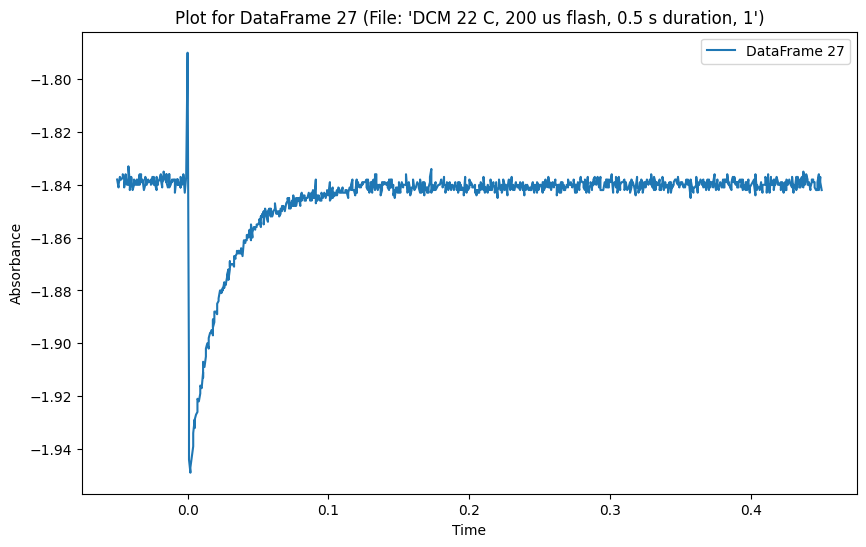

Plotting DataFrame 28 for file 'DCM 18 C, 200 us flash, 5 s duration, 1':


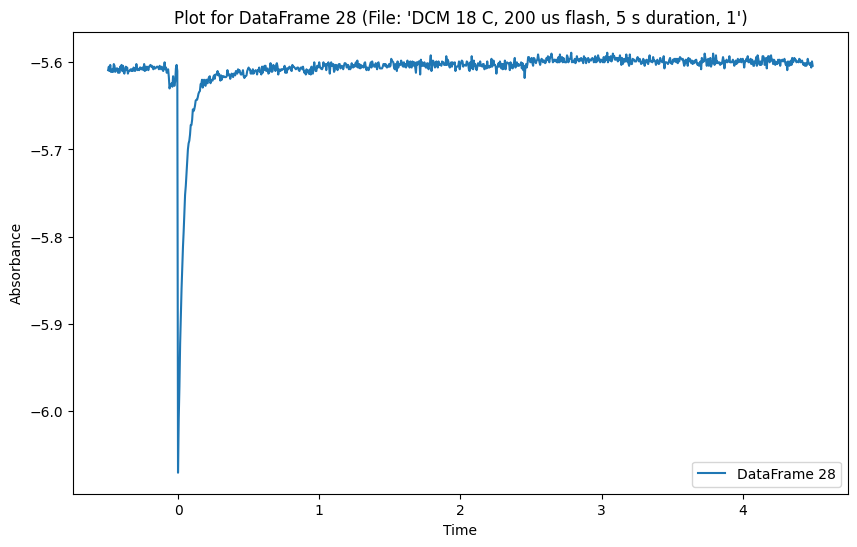

Plotting DataFrame 29 for file 'DCM 22 C, 200 us flash, 0.5 s duration, 5':


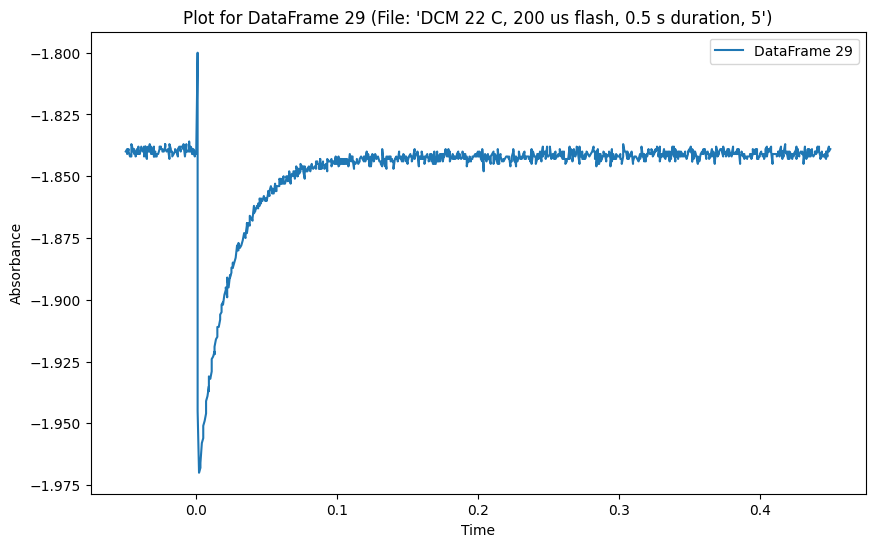

Plotting DataFrame 30 for file 'DCM 22 C, 200 us flash, 0.5 s duration, 3':


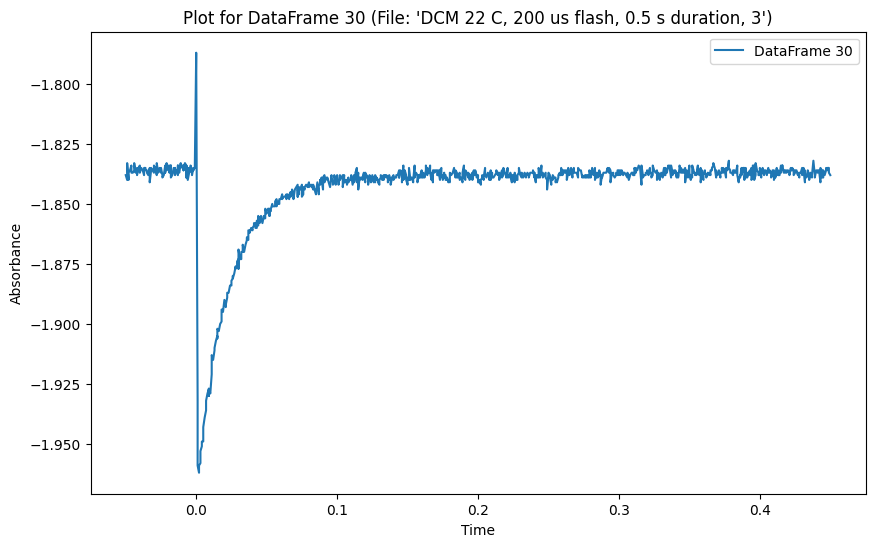

Plotting DataFrame 31 for file 'DCM 20 C, 200 us flash, 0.5 s duration, 1':


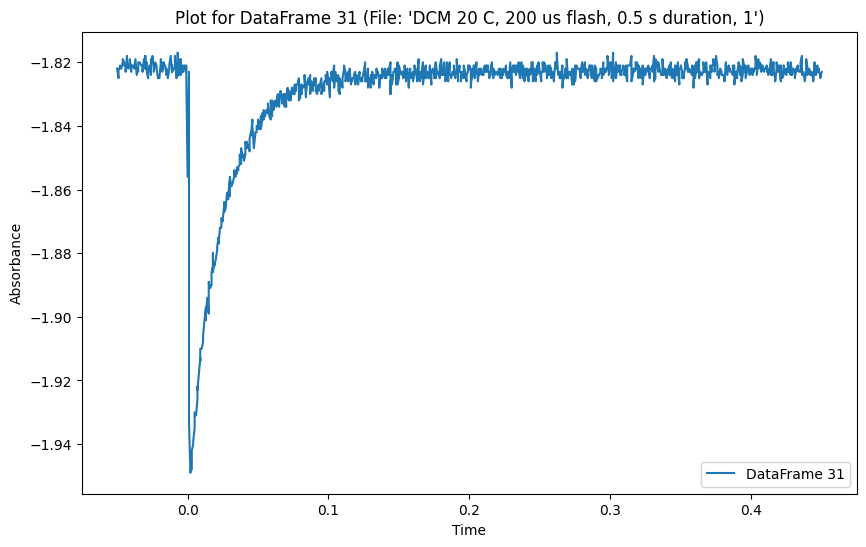

Plotting DataFrame 32 for file 'DCM 20 C, 200 us flash, 0.5 s duration, 5':


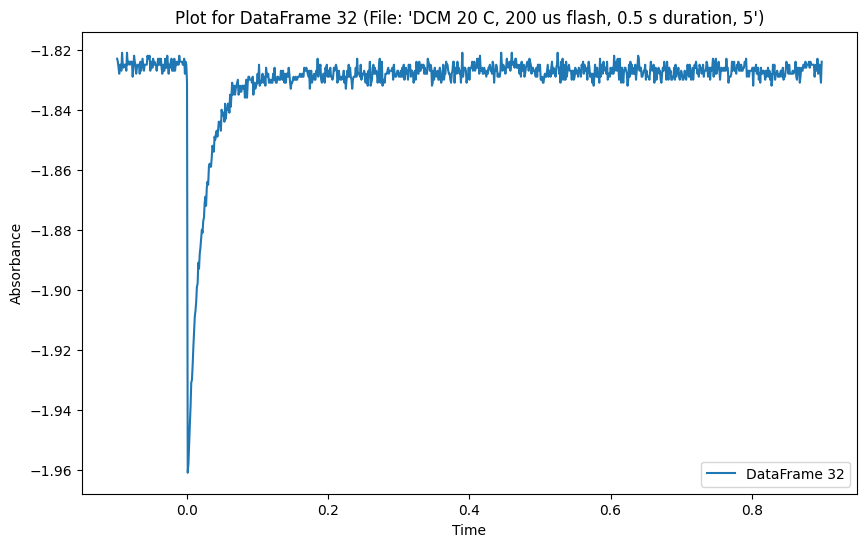

Plotting DataFrame 33 for file 'DCM 18 C, 300 us flash, 2 s duration, 1':


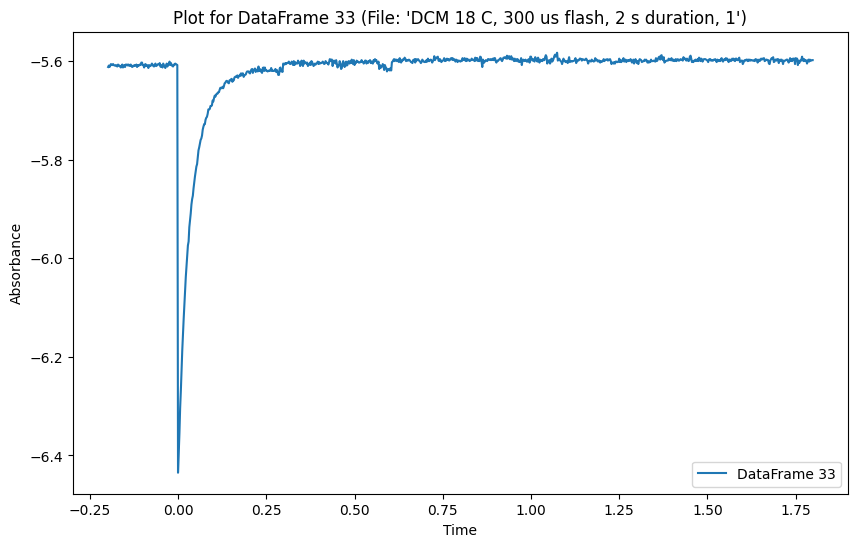

Plotting DataFrame 34 for file 'DCM 18 C, 200 us flash, 1 s duration, 1':


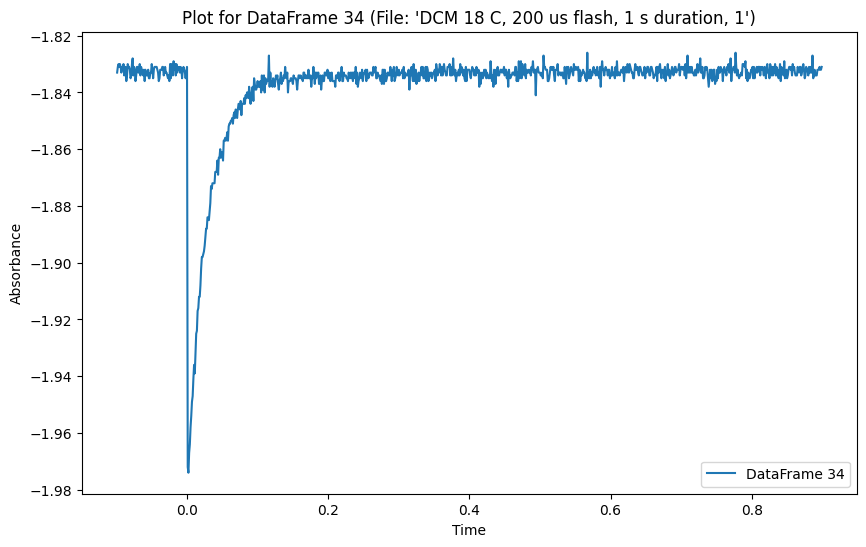

Plotting DataFrame 35 for file 'DCM 18 C, 300 us flash, 2 s duration, 2':


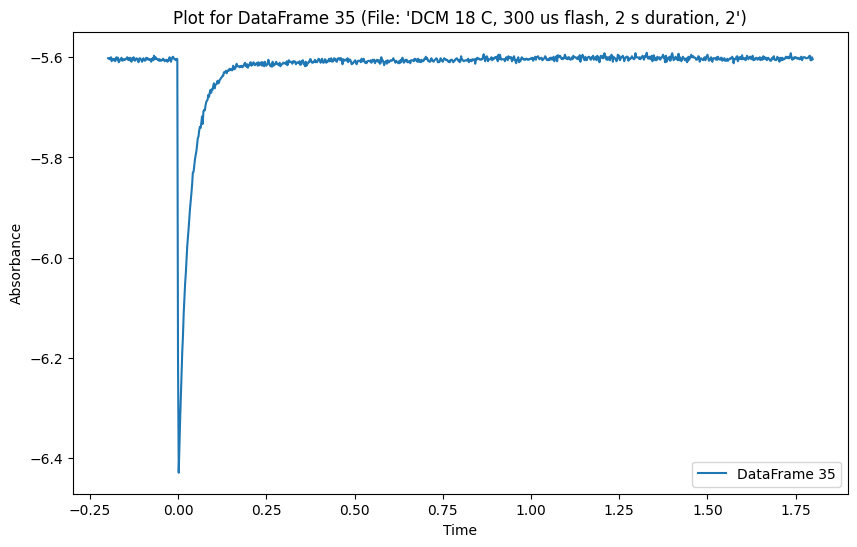

Plotting DataFrame 36 for file 'DCM 22 C, 200 us flash, 0.5 s duration, 2':


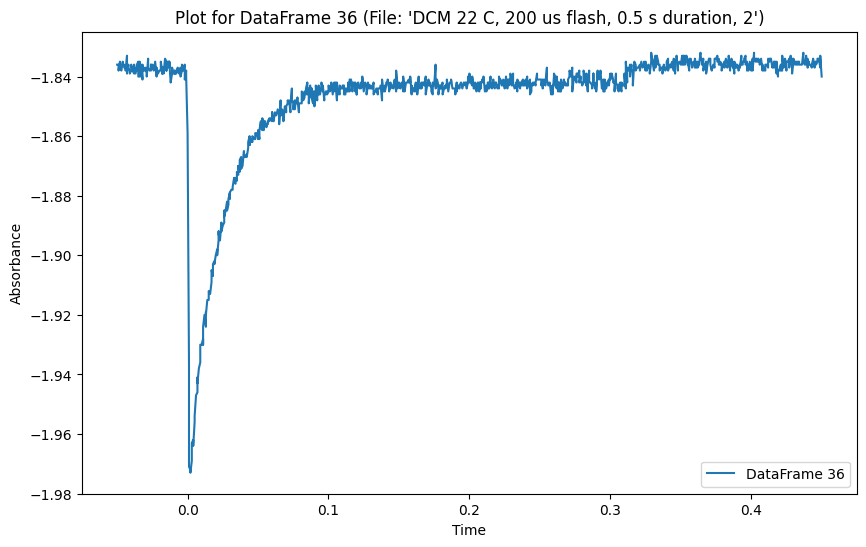

Plotting DataFrame 37 for file 'DCM 20 C, 200 us flash, 0.5 s duration, 4':


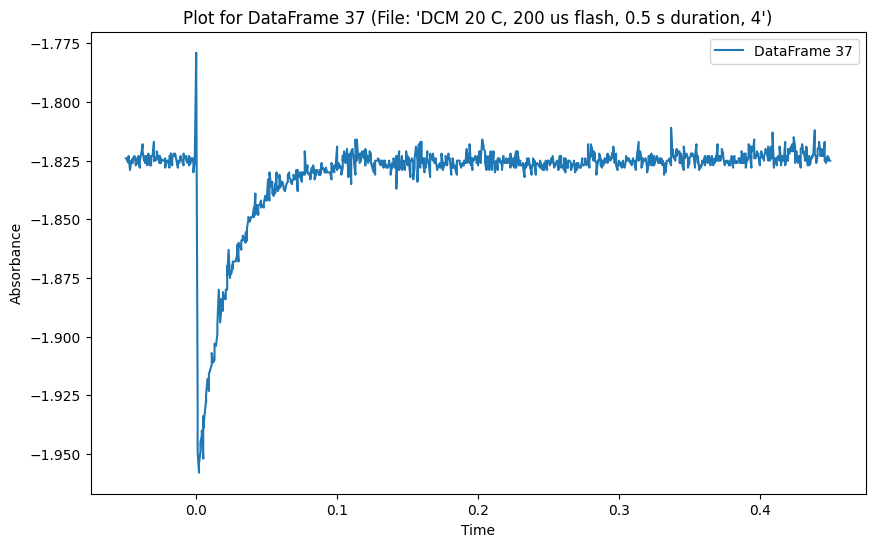

Plotting DataFrame 38 for file 'DCM 22 C, 200 us flash, 0.5 s duration, 4':


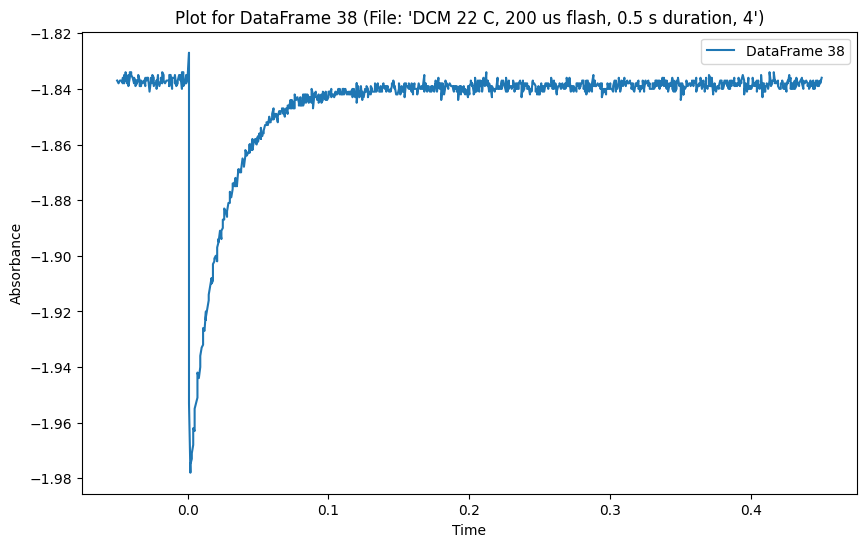

Plotting DataFrame 39 for file 'DCM 18 C, 200 us flash, 1 s duration, 3':


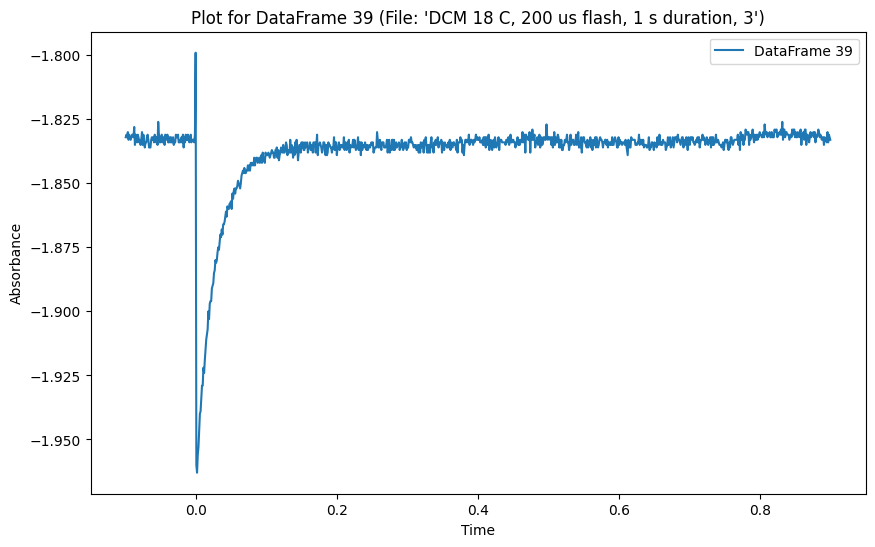

Plotting DataFrame 40 for file 'DCM 18 C, 200 us flash, 1 s duration, 5':


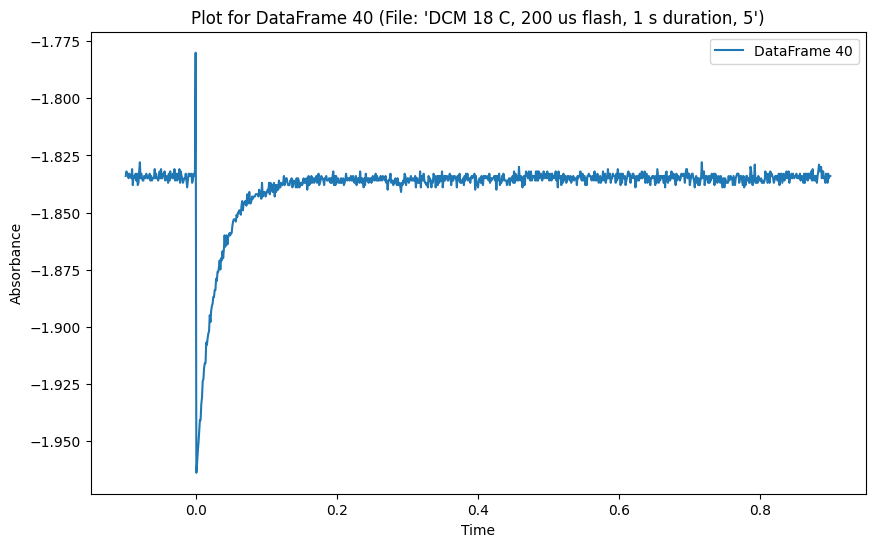

Plotting DataFrame 41 for file 'DCM 18 C, 200 us flash, 1 s duration, 2':


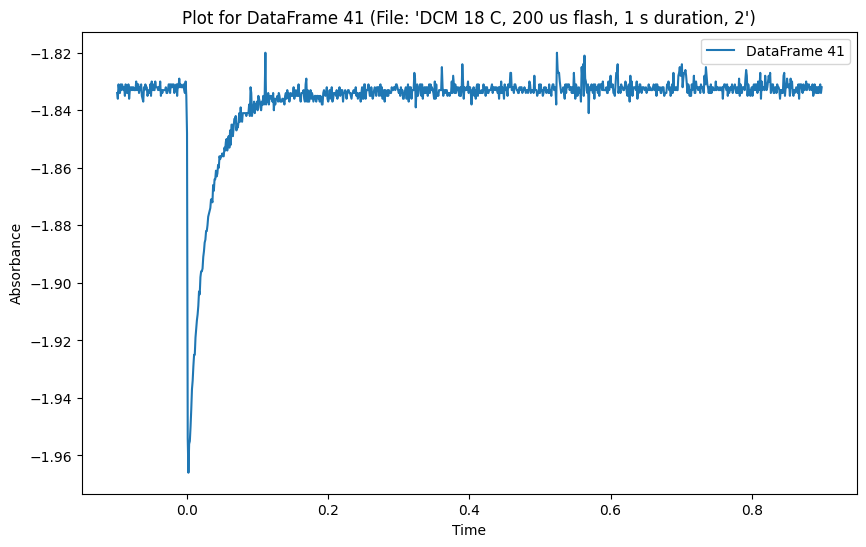

Plotting DataFrame 42 for file 'DCM 20 C, 200 us flash, 0.5 s duration, 2':


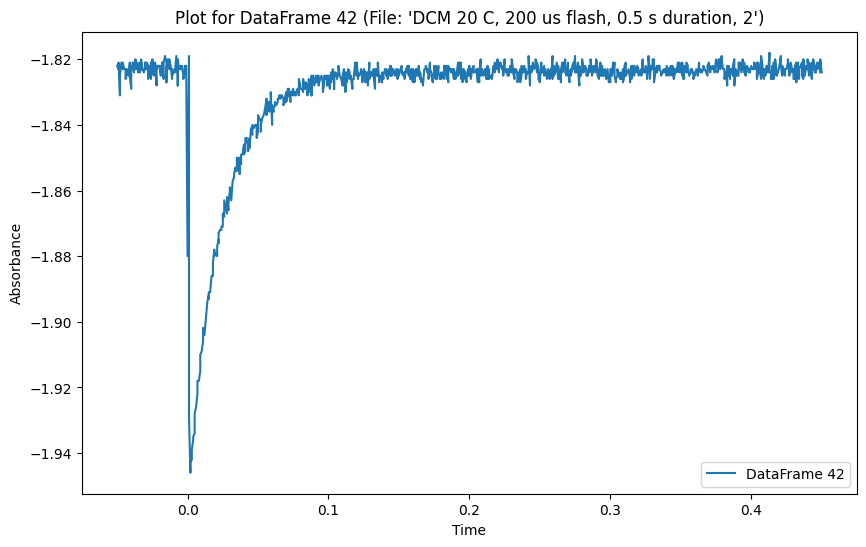

Plotting DataFrame 43 for file 'Ethanol 27 C. 400 us flash, 10 s duration, 2':


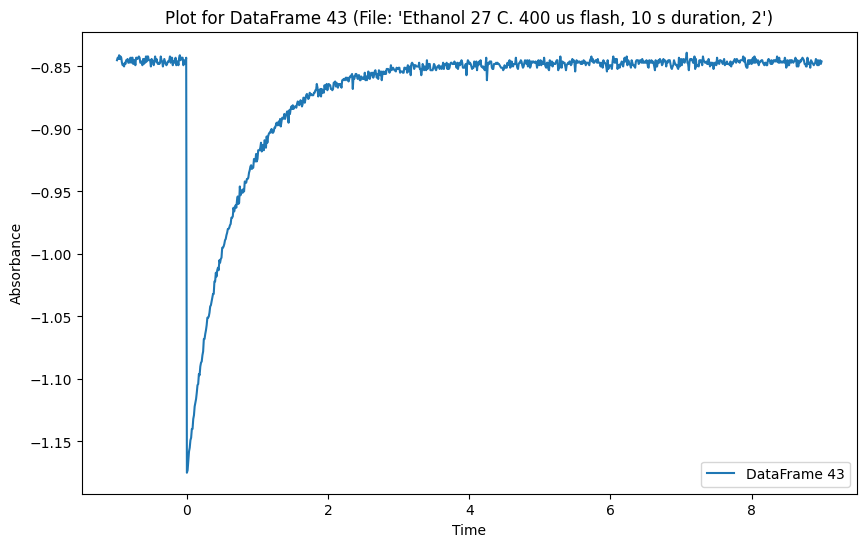

Plotting DataFrame 44 for file 'Ethanol 37 C, 400 us flash, 10 s duration, 1':


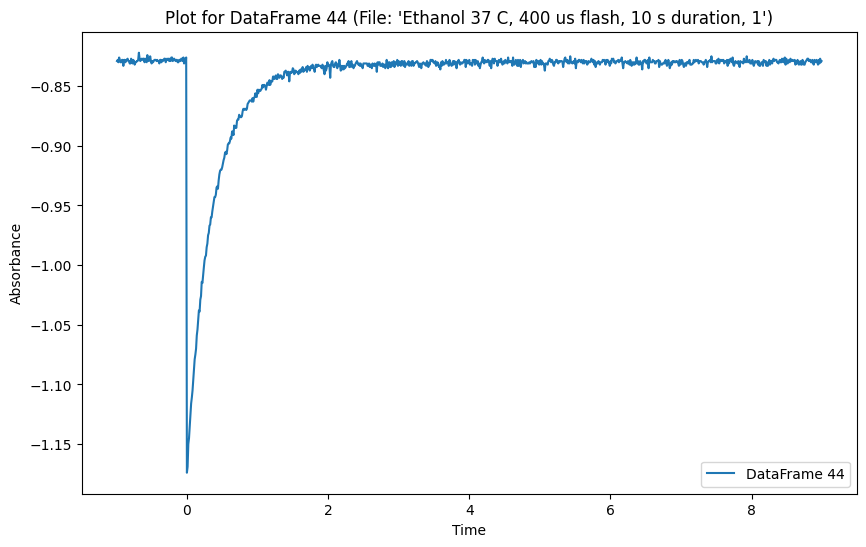

Plotting DataFrame 45 for file 'Ethanol 32 C, 400 us flash, 10 s duration, 1':


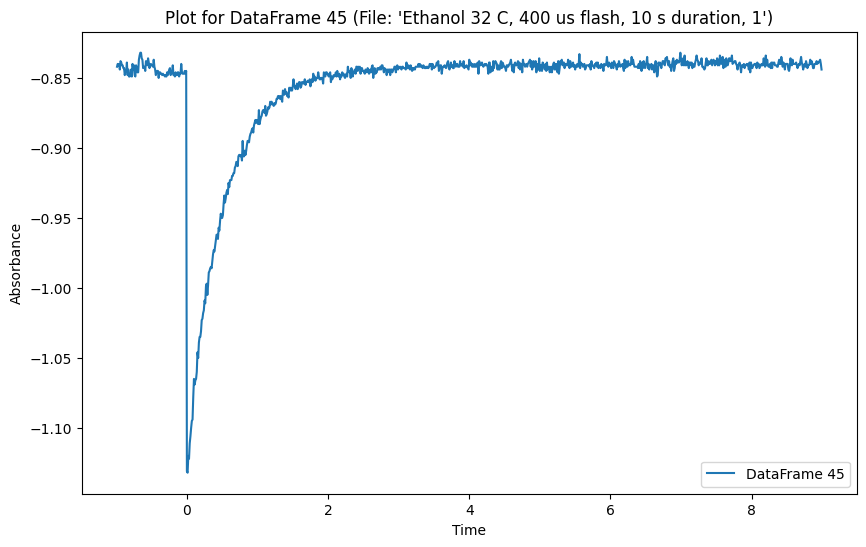

Plotting DataFrame 46 for file 'Ethanol 32 C, 400 us flash, 10 s duration, 4':


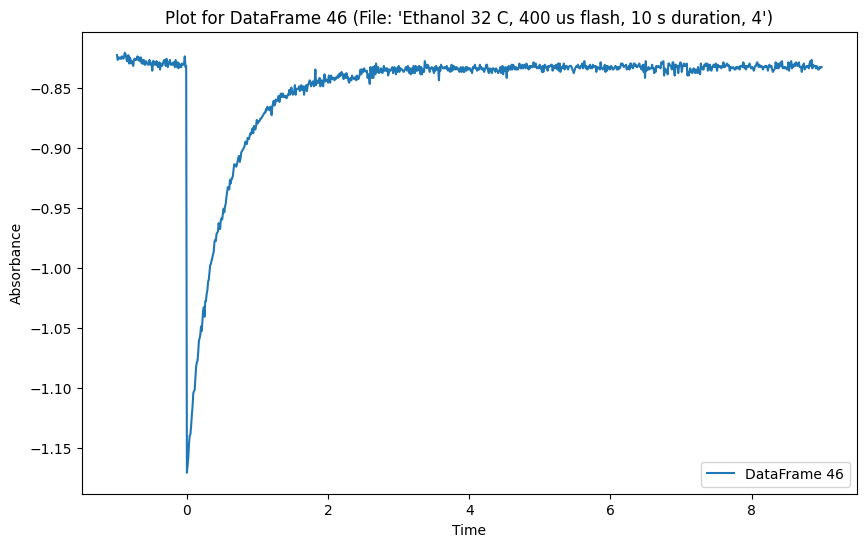

Plotting DataFrame 47 for file 'DCM 24 C, 200 us flash, 0.5 s duration, 3':


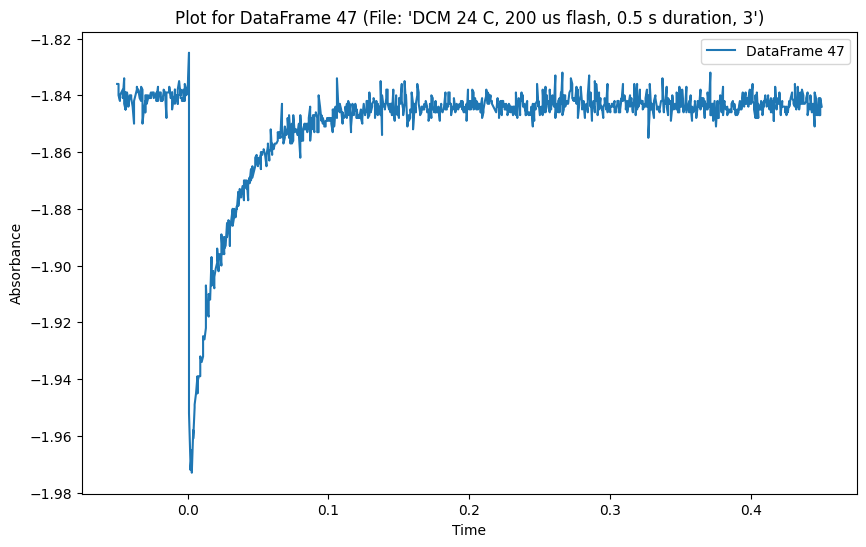

Plotting DataFrame 48 for file 'DCM 26 C, 200 us flash, 0.5 s duration, 2':


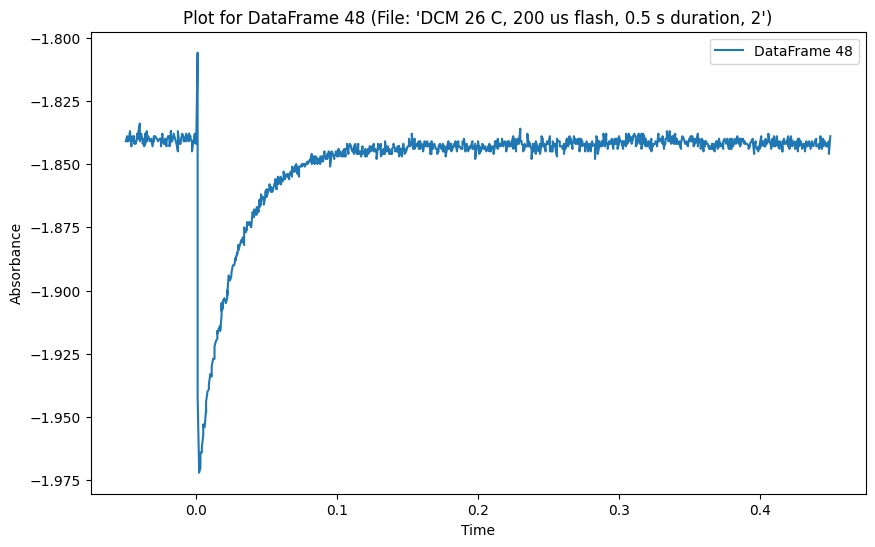

Plotting DataFrame 49 for file 'DCM 26 C, 200 us flash, 0.5 s duration, 3':


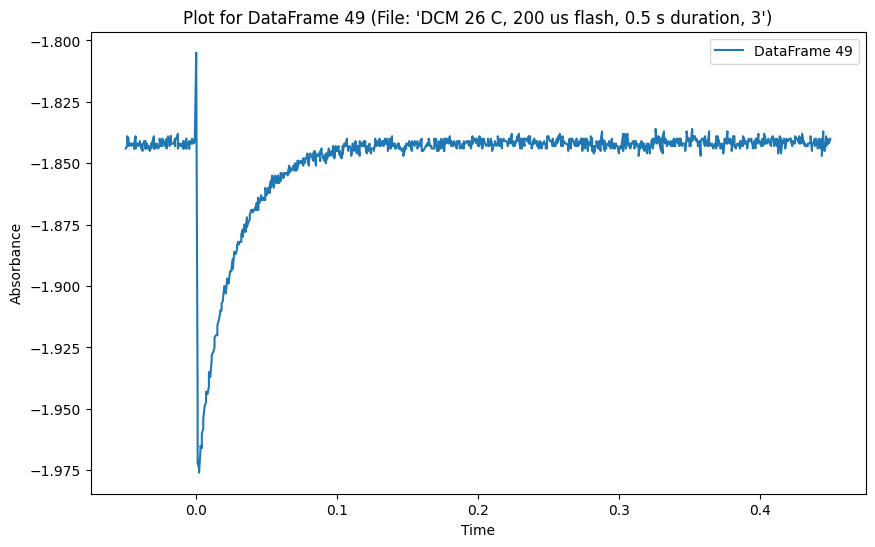

Plotting DataFrame 50 for file 'Ethanol 37 C, 400 us flash, 10 s duration, 5':


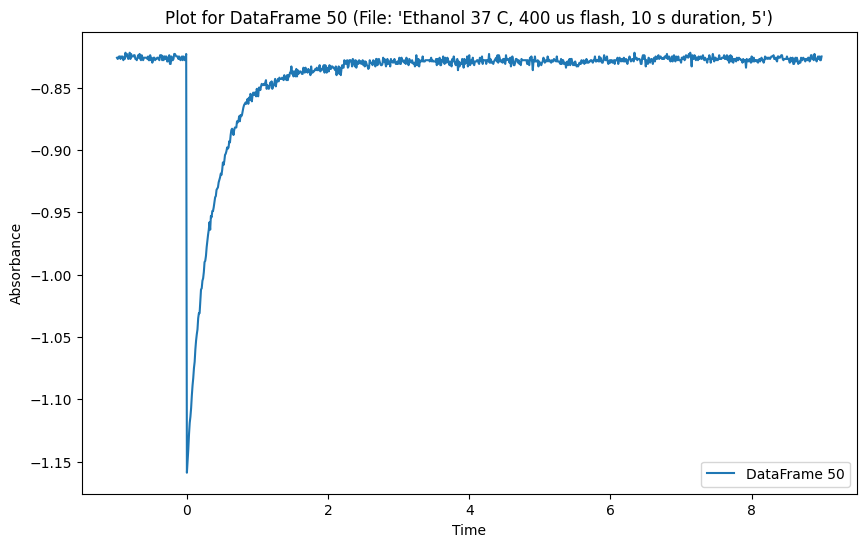

Plotting DataFrame 51 for file 'Ethanol 17 C. 400 us flash, 10 s duration, 4':


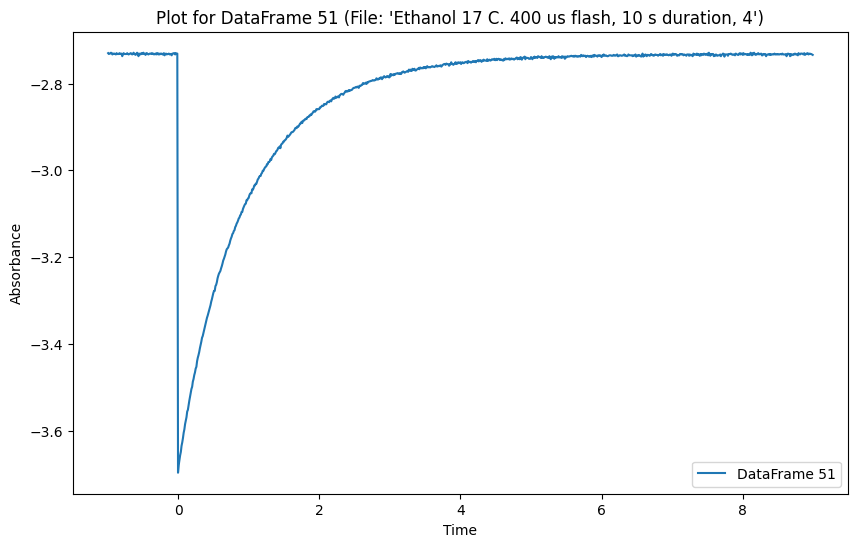

Plotting DataFrame 52 for file 'Ethanol 32 C, 400 us flash, 10 s duration, 5':


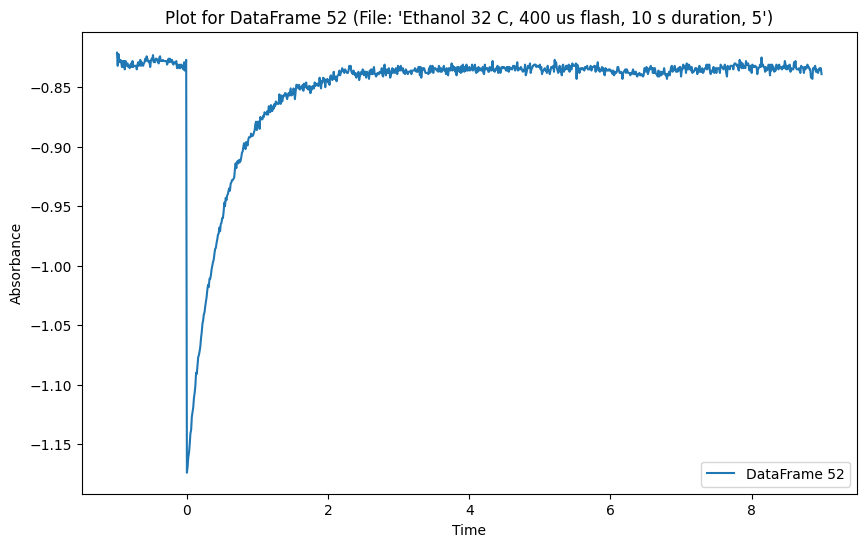

Plotting DataFrame 53 for file 'DCM 24 C, 200 us flash, 0.5 s duration, 5':


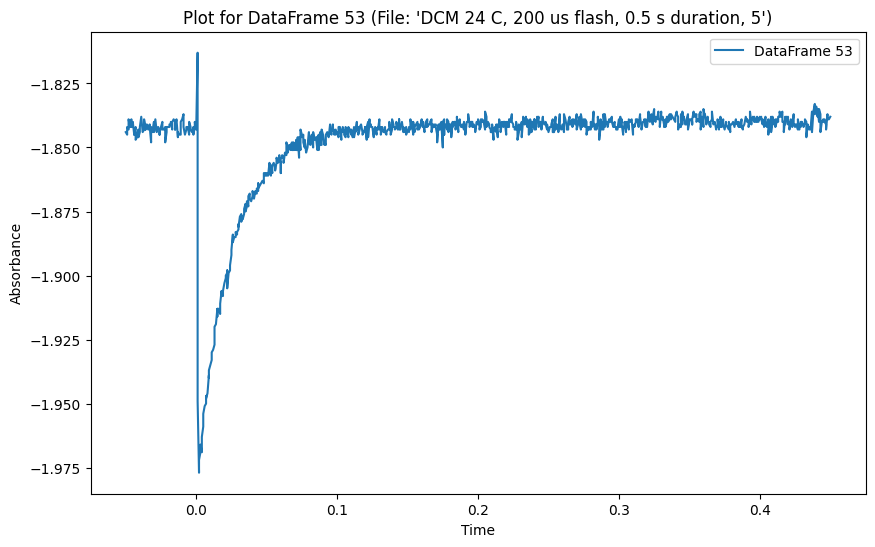

Plotting DataFrame 54 for file 'Ethanol 37 C, 400 us flash, 10 s duration, 4':


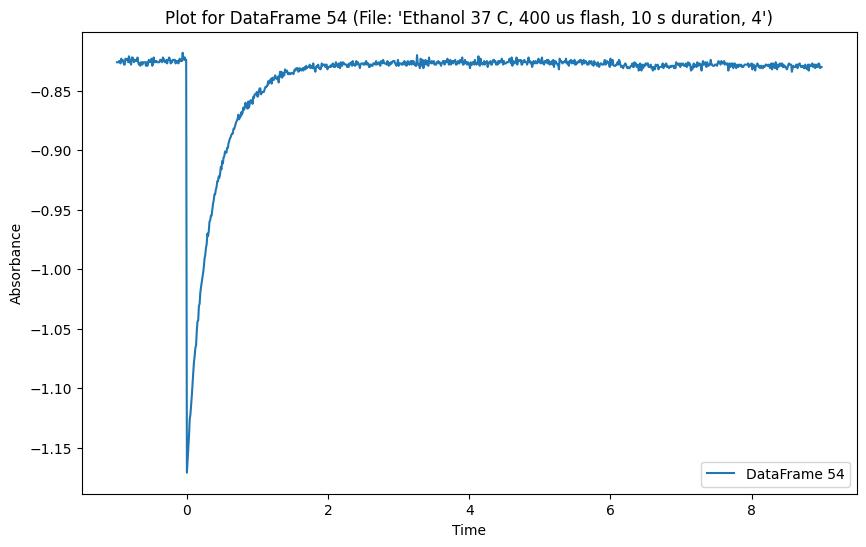

Plotting DataFrame 55 for file 'Ethanol 32 C, 400 us flash, 10 s duration, 3':


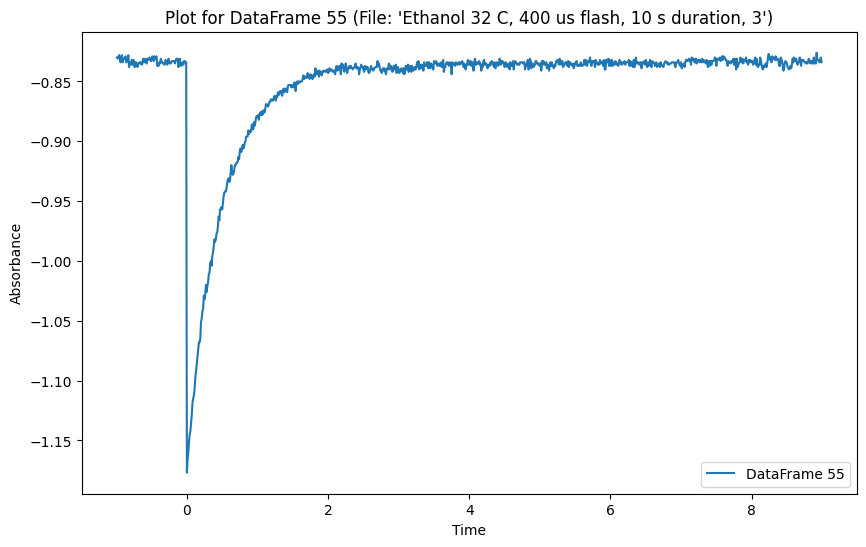

Plotting DataFrame 56 for file 'Ethanol 17 C, 400 us flash, 10 s duration, 2':


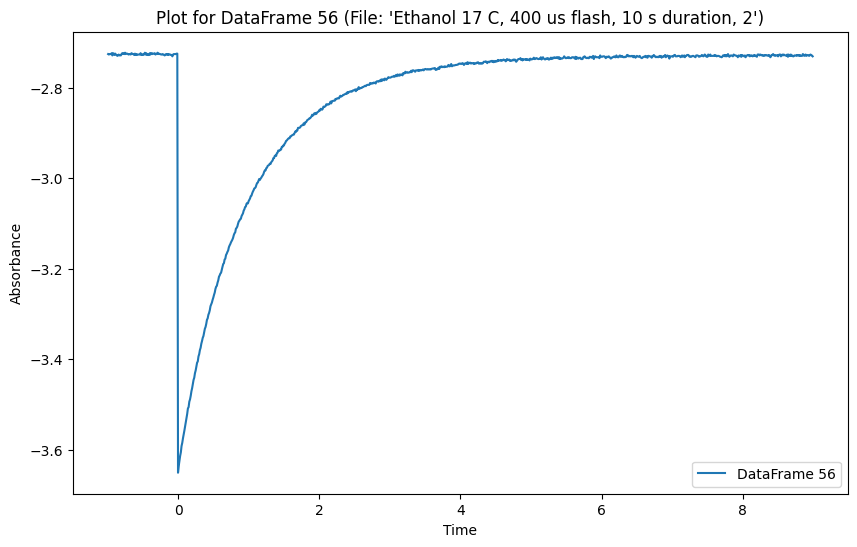

Plotting DataFrame 57 for file 'DCM 26 C, 200 us flash, 0.5 s duration, 5':


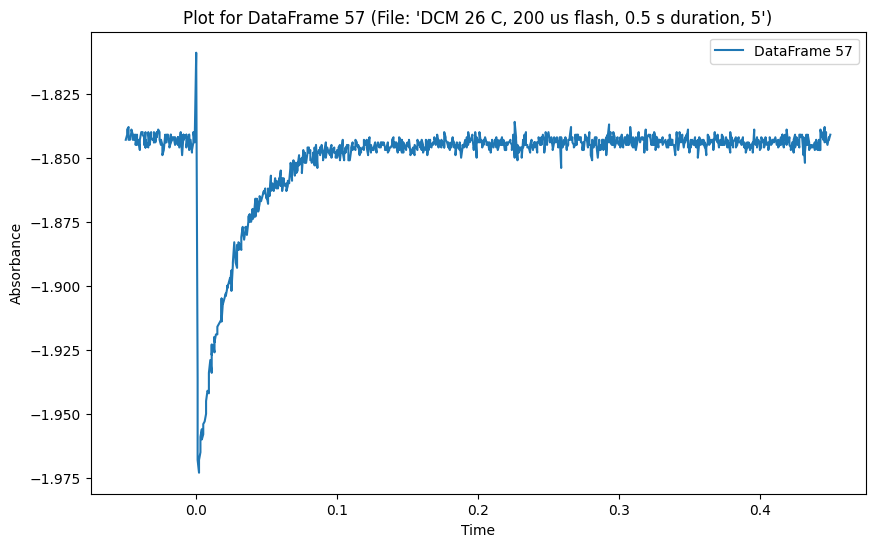

Plotting DataFrame 58 for file 'DCM 24 C, 200 us flash, 0.5 s duration, 2':


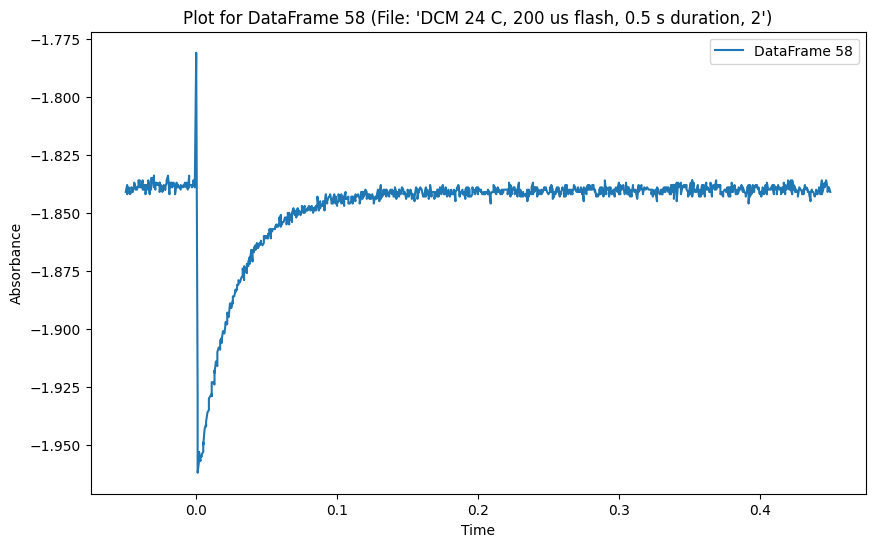

Plotting DataFrame 59 for file 'Ethanol 27 C. 400 us flash, 10 s duration, 4':


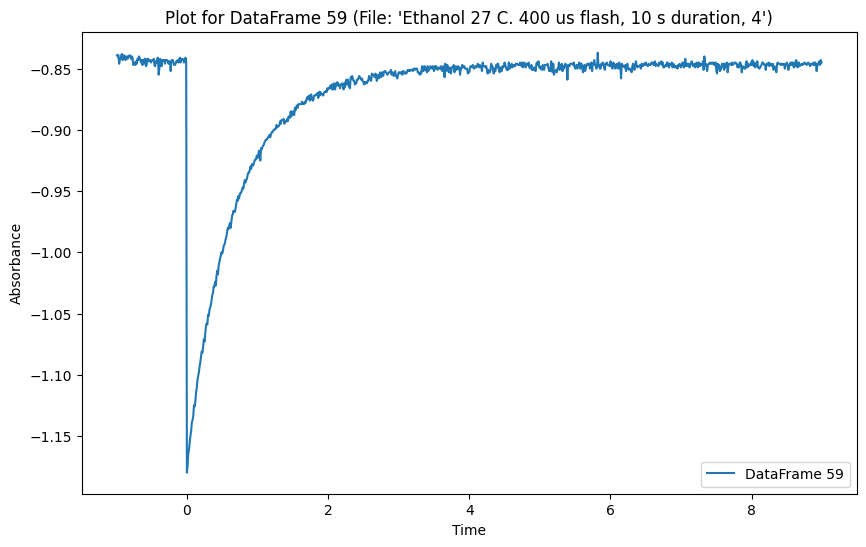

Plotting DataFrame 60 for file 'Ethanol 17 C, 400 us flash, 10 s duration, 5':


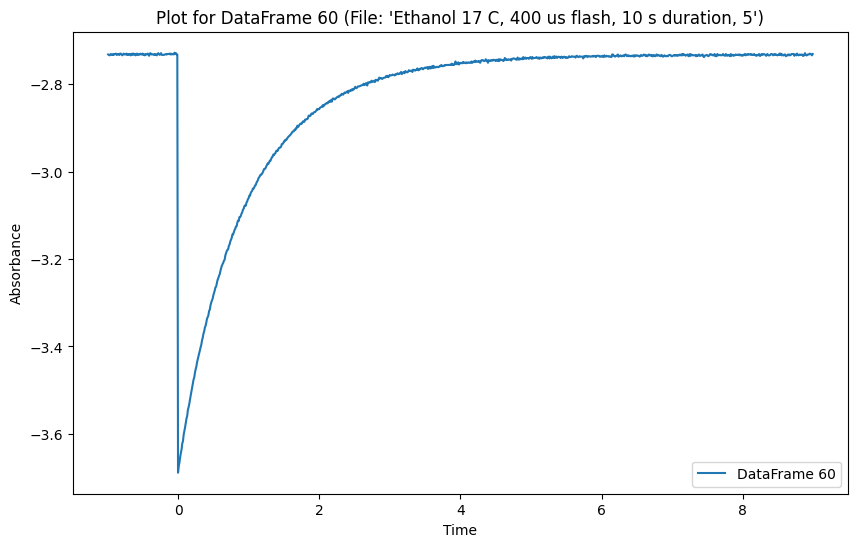

Plotting DataFrame 61 for file 'Ethanol 22 C, 400 us flash, 10 s duration, 5':


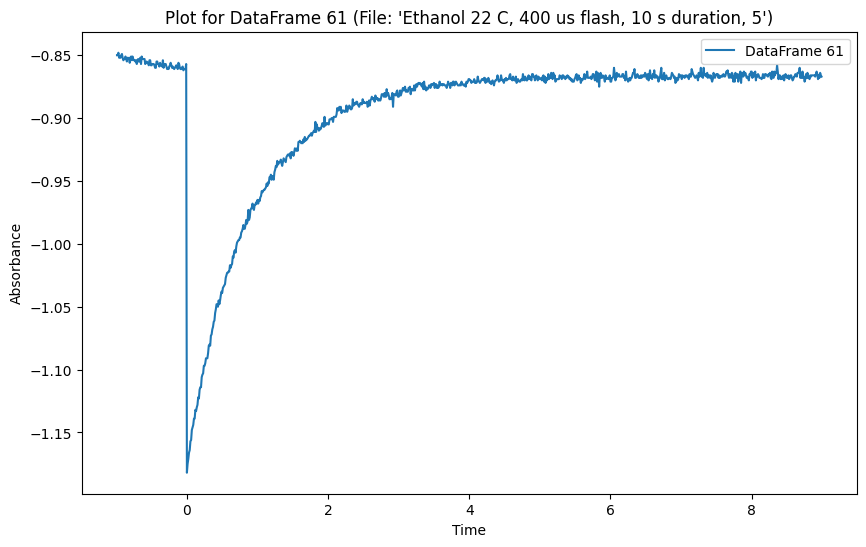

Plotting DataFrame 62 for file 'Ethanol 22 C, 400 us flash, 10 s duration, 4':


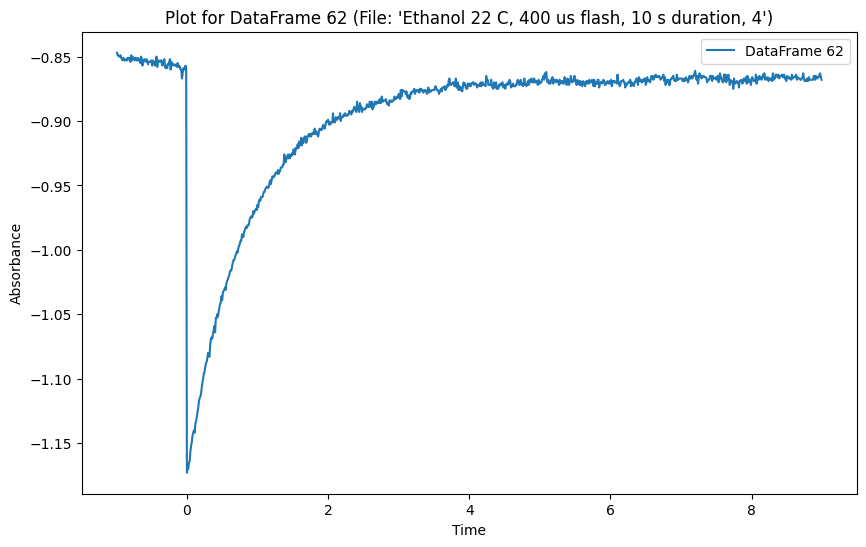

Plotting DataFrame 63 for file 'DCM 24 C, 200 us flash, 0.5 s duration, 4':


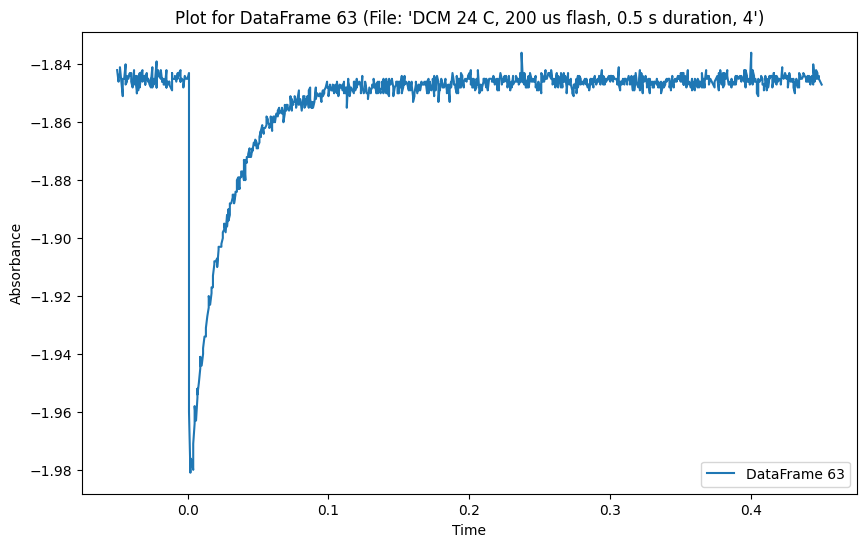

Plotting DataFrame 64 for file 'Ethanol 22 C, 400 us flash, 10 s duration, 2':


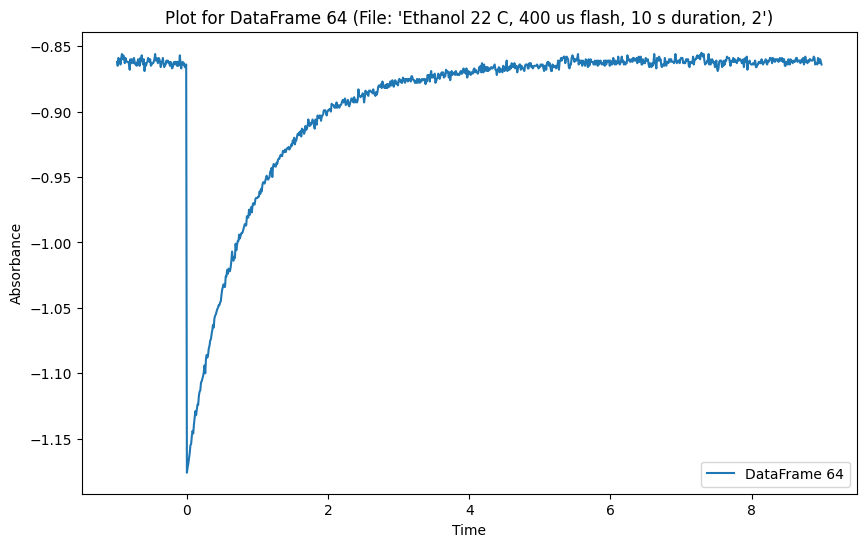

Plotting DataFrame 65 for file 'DCM 26 C, 200 us flash, 0.5 s duration, 1':


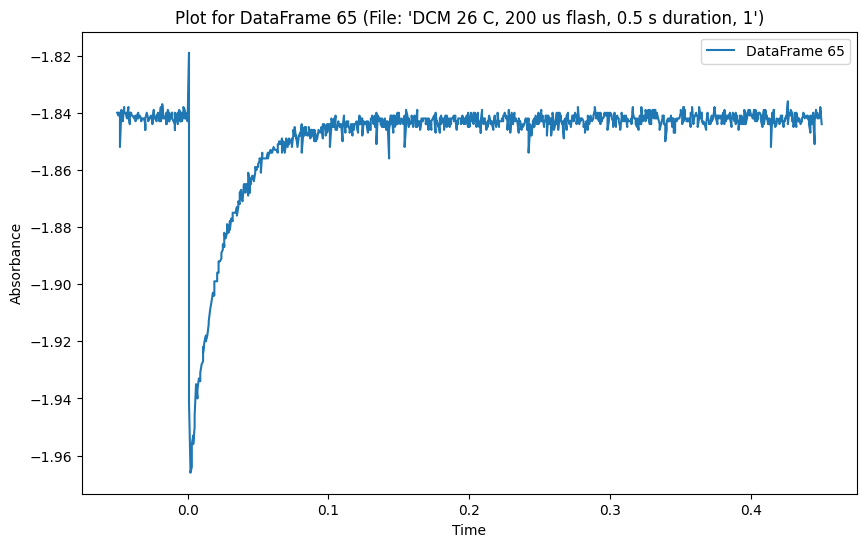

Plotting DataFrame 66 for file 'DCM 24 C, 200 us flash, 0.5 s duration, 1':


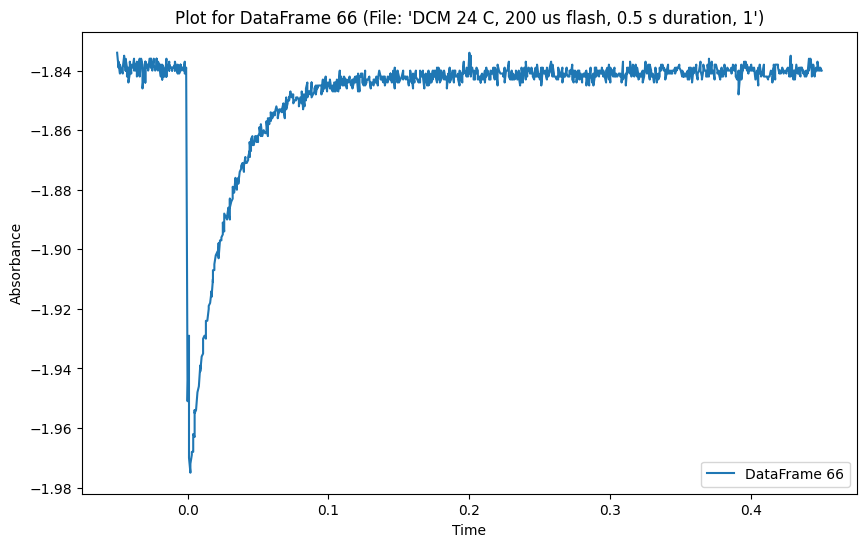

Plotting DataFrame 67 for file 'Ethanol 27 C. 400 us flash, 10 s duration, 5':


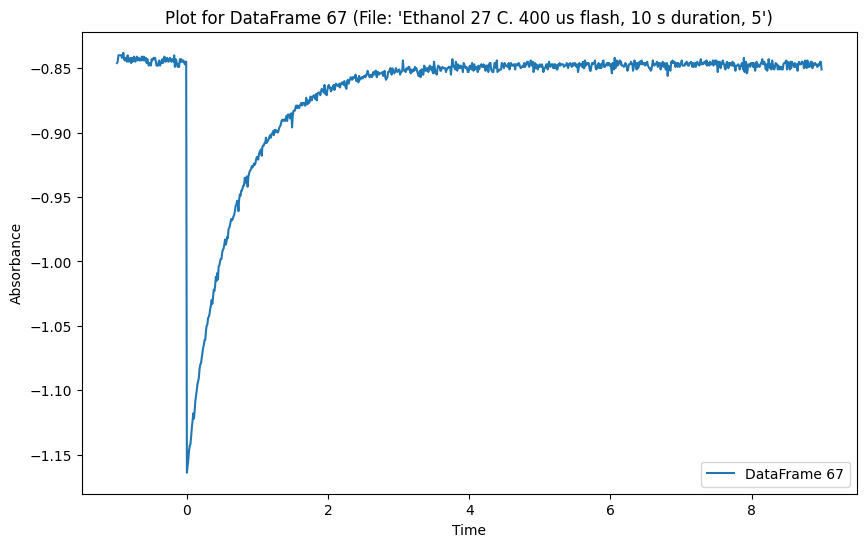

Plotting DataFrame 68 for file 'Ethanol 27 C. 400 us flash, 10 s duration, 3':


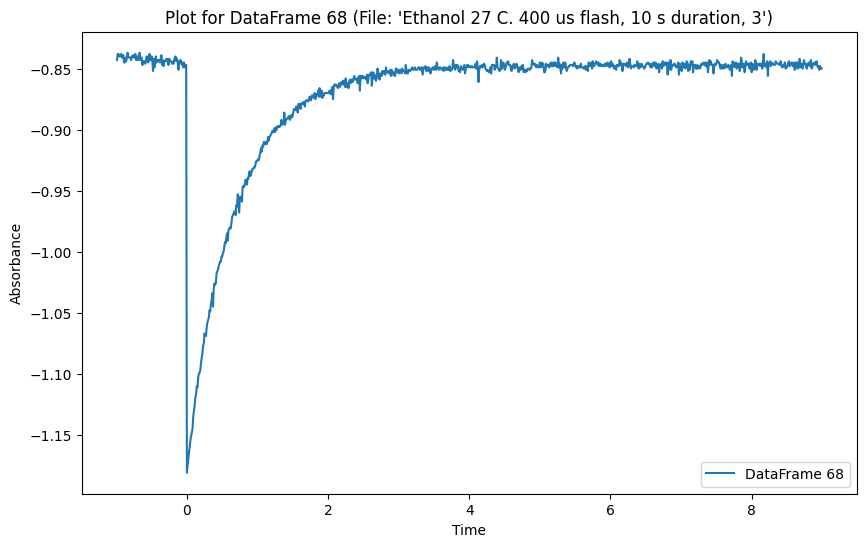

Plotting DataFrame 69 for file 'Ethanol 37 C, 400 us flash, 10 s duration, 2':


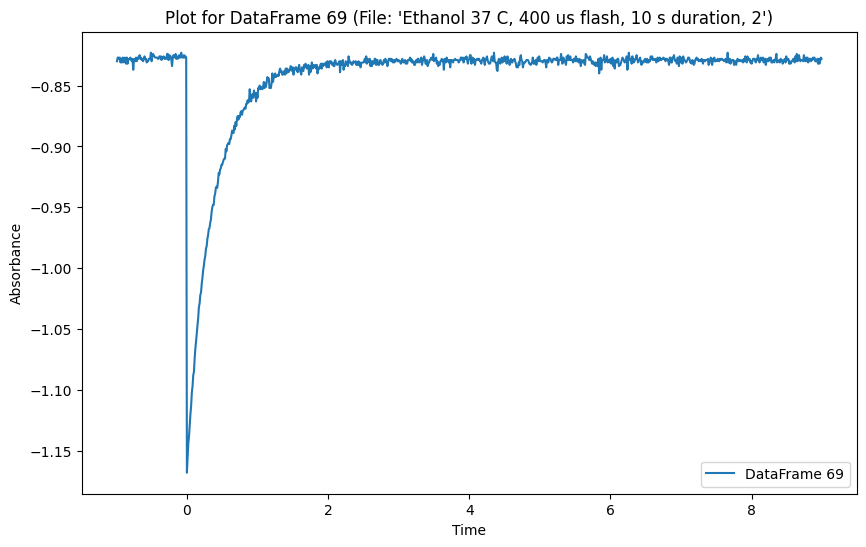

Plotting DataFrame 70 for file 'Ethanol 22 C, 400 us flash, 10 s duration, 3':


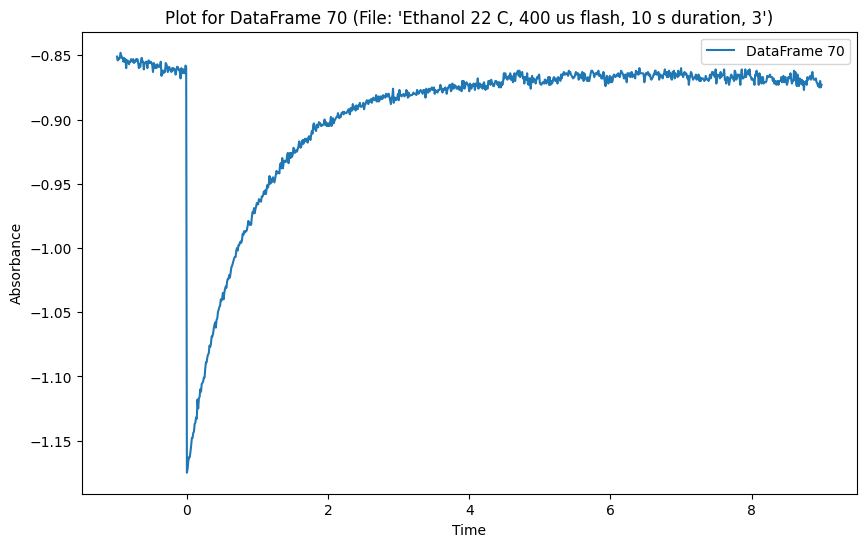

Plotting DataFrame 71 for file 'Ethanol 37 C, 400 us flash, 10 s duration, 3':


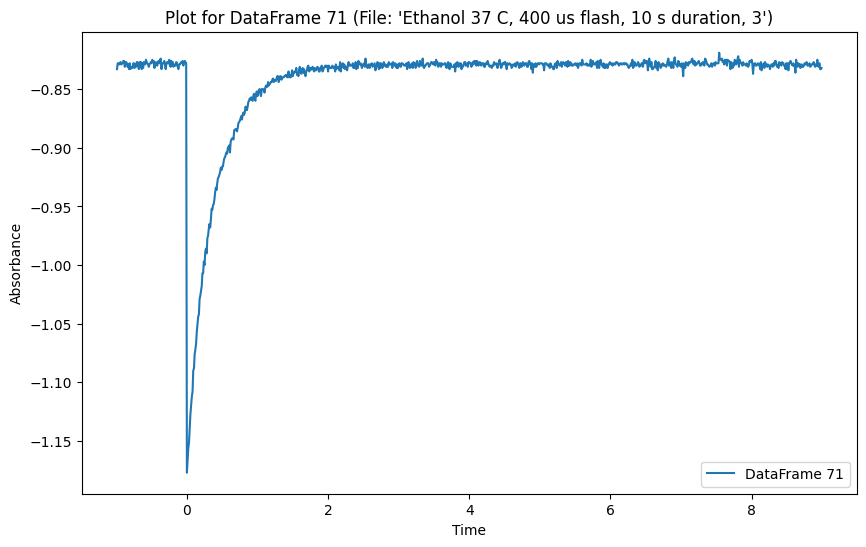

Plotting DataFrame 72 for file 'Ethanol 32 C, 400 us flash, 10 s duration, 2':


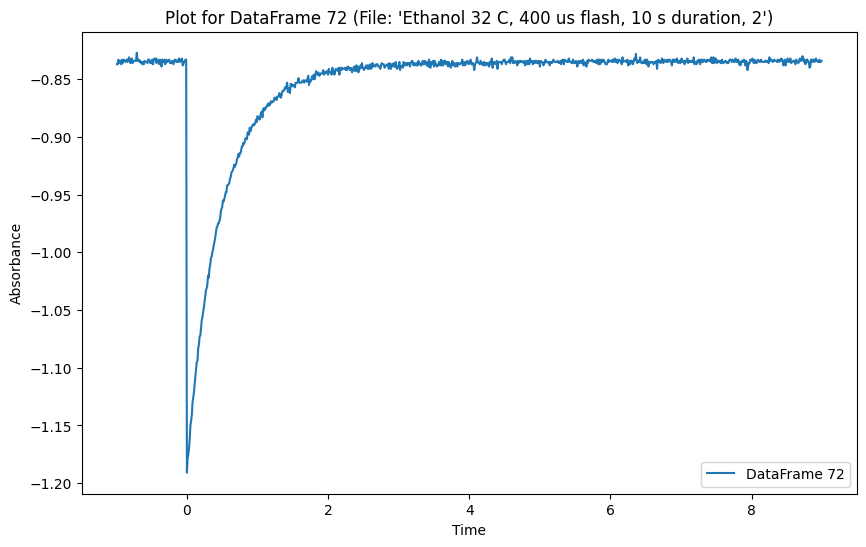

Plotting DataFrame 73 for file 'Ethanol 27 C. 400 us flash, 10 s duration, 1':


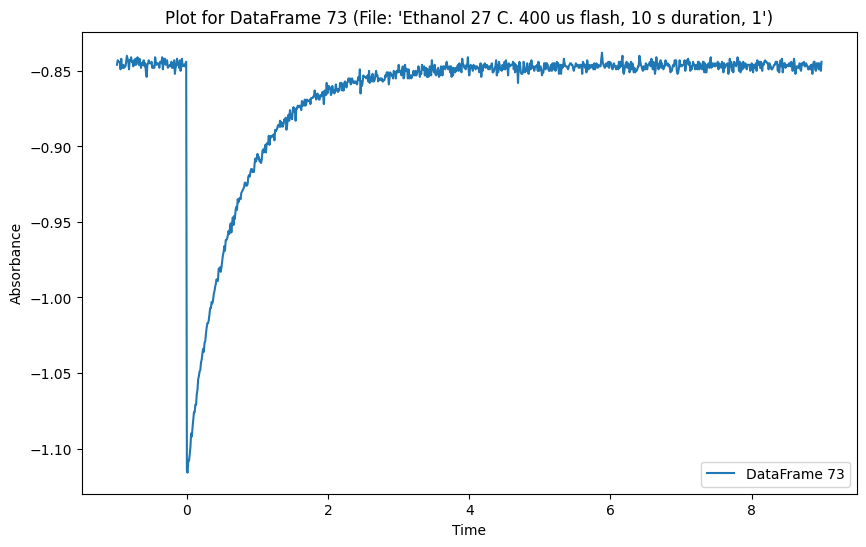

Plotting DataFrame 74 for file 'Ethanol 22 C, 400 us flash, 10 s duration, 1':


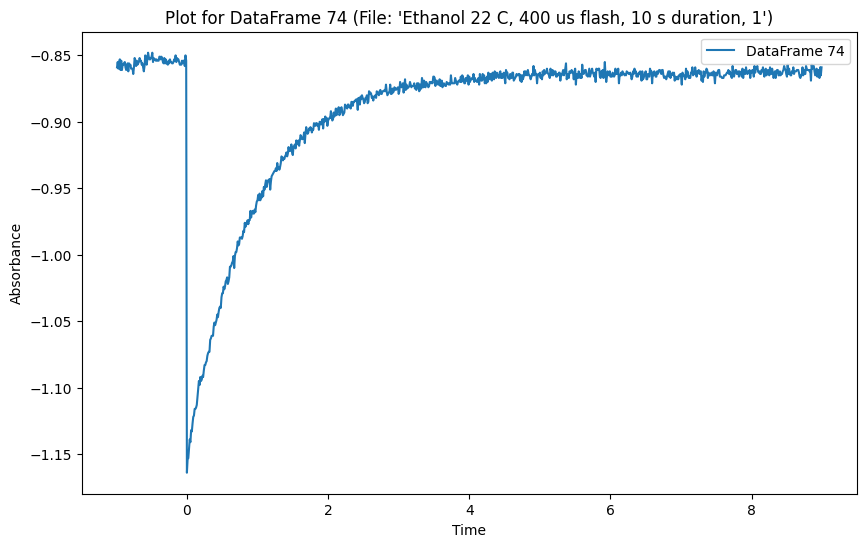

Plotting DataFrame 75 for file 'Ethanol 17 C, 400 us flash, 10 s duration, 1':


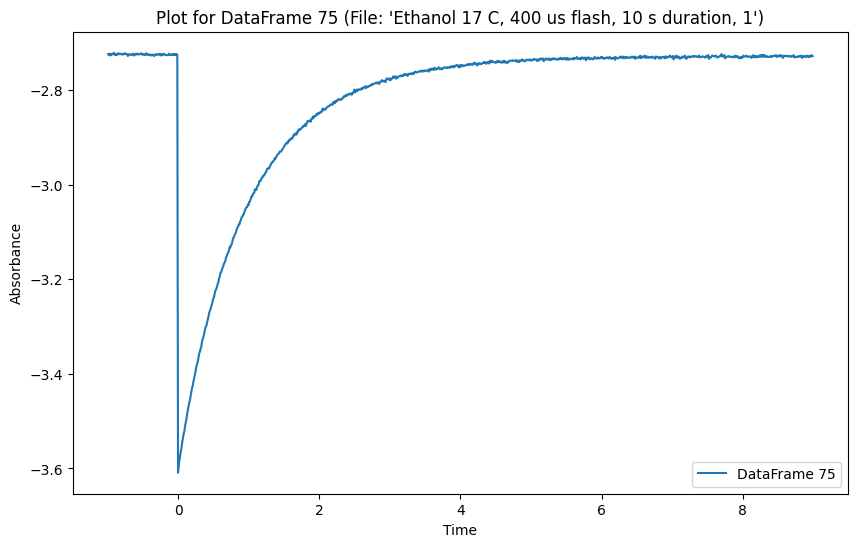

Plotting DataFrame 76 for file 'Acetone 44 C, 300 us flash, 2 s duration, 4':


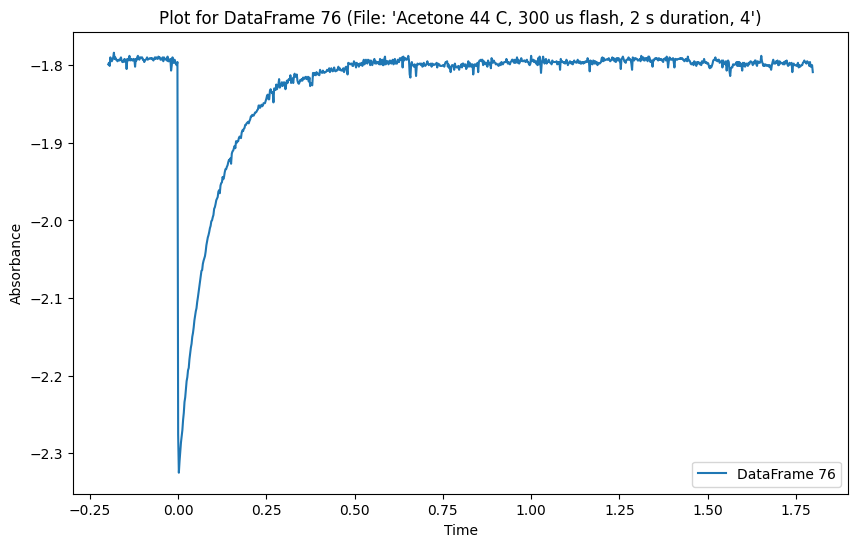

Plotting DataFrame 77 for file 'Acetone 34 C, 300 us flash, 5 s duration, 4':


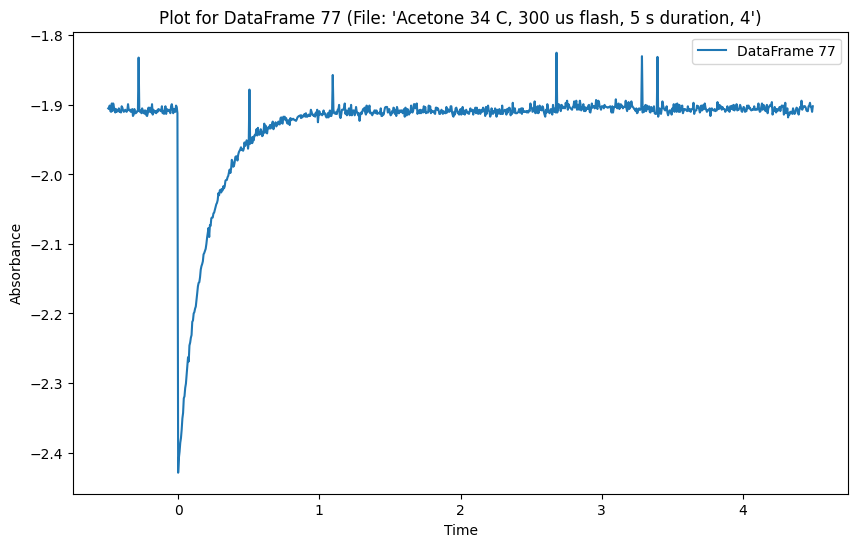

Plotting DataFrame 78 for file 'Acetone 34 C, 300 us flash, 5 s duration, 3':


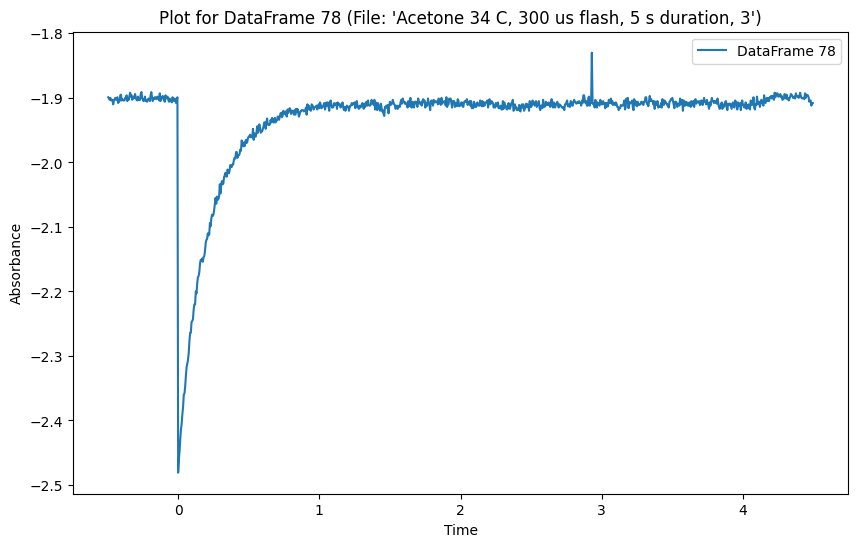

Plotting DataFrame 79 for file 'Acetone 44 C, 300 us flash, 5 s duration, 2':


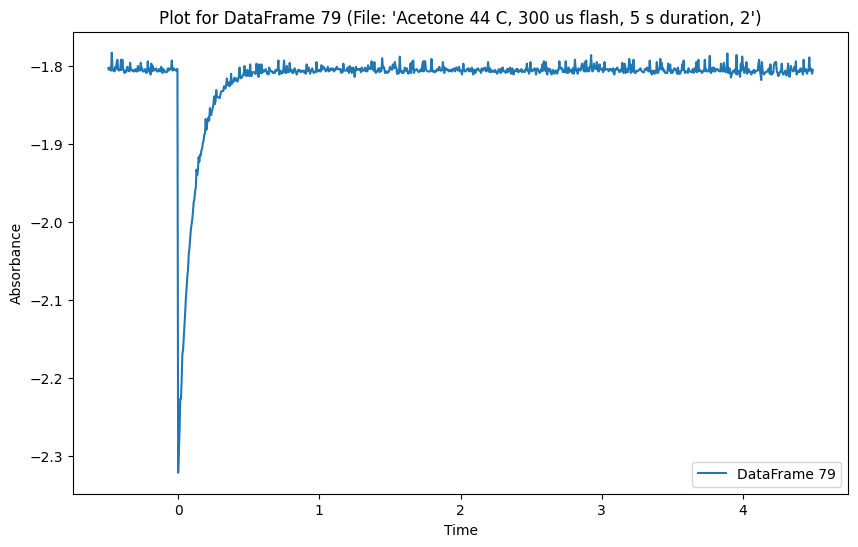

Plotting DataFrame 80 for file 'Acetone 44 C, 300 us flash, 2 s duration, 1':


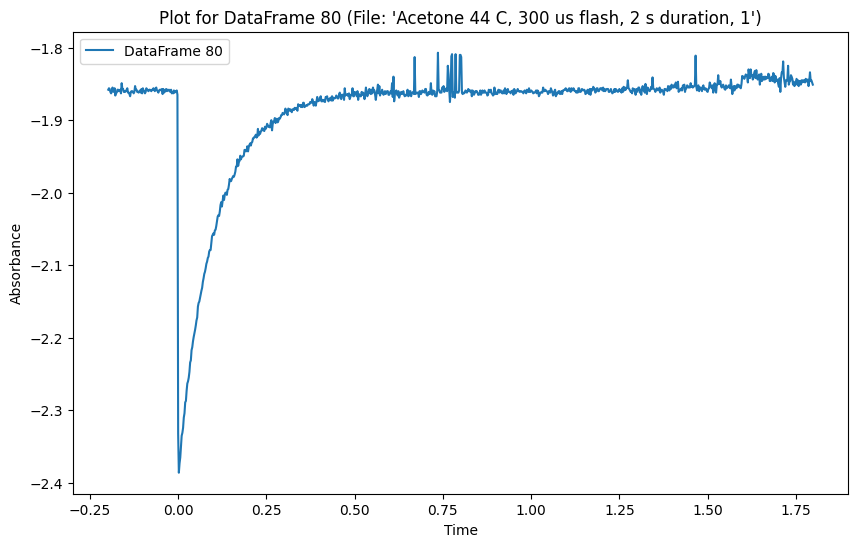

Plotting DataFrame 81 for file 'Acetone 39 C, 300 us flash, 5 s duration, 5':


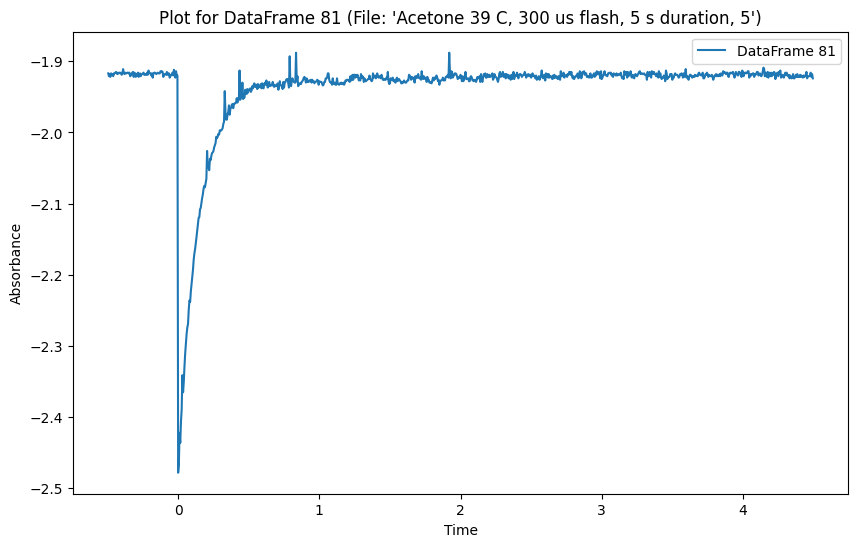

Plotting DataFrame 82 for file 'Acetone 39 C, 300 us flash, 5 s duration, 2':


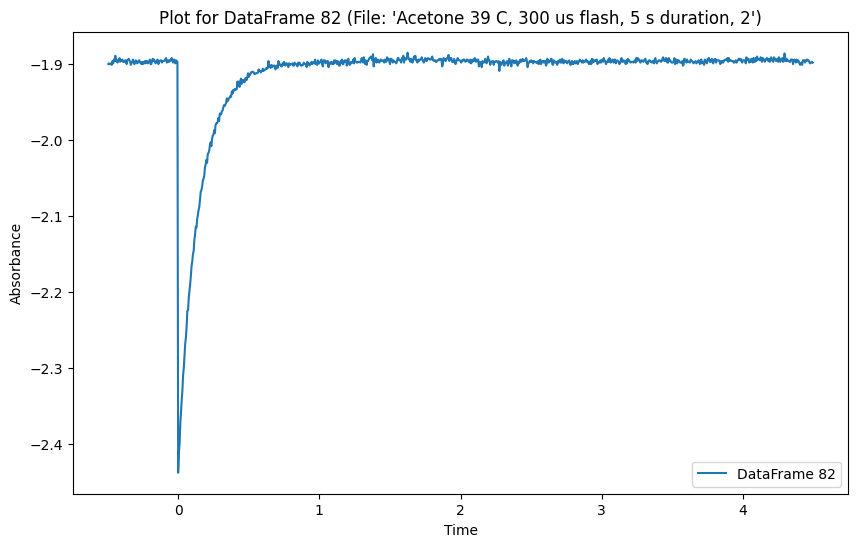

Plotting DataFrame 83 for file 'Acetone 39 C, 300 us flash, 5 s duration, 3':


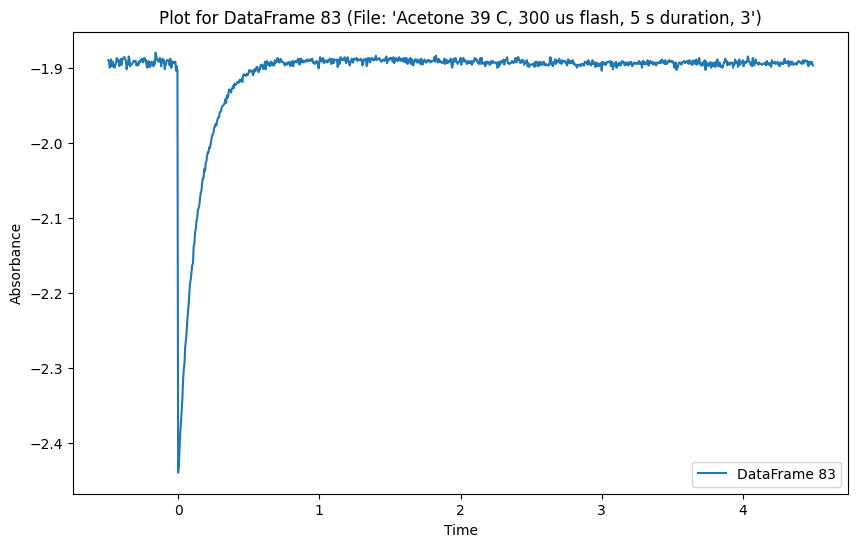

Plotting DataFrame 84 for file 'Acetone 29 C, 300 us flash, 5 s duration, 4':


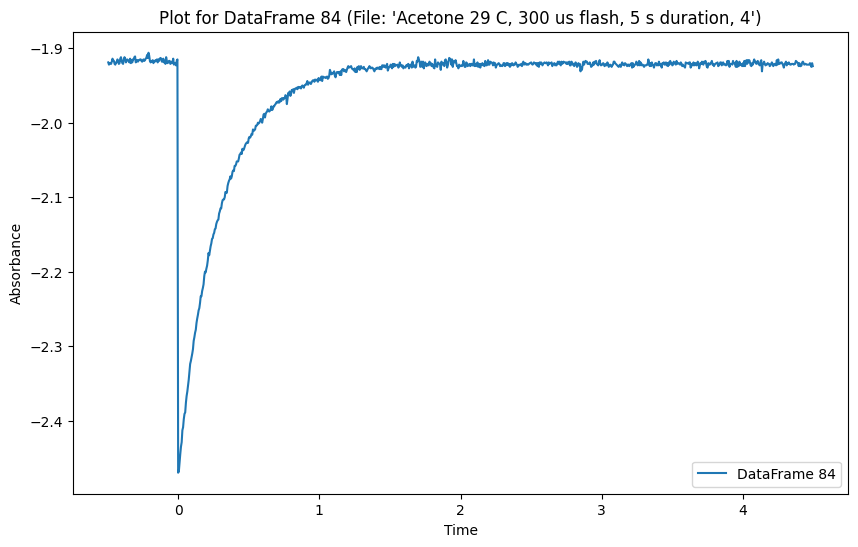

Plotting DataFrame 85 for file 'Acetone 44 C, 300 us flash, 5 s duration, 1':


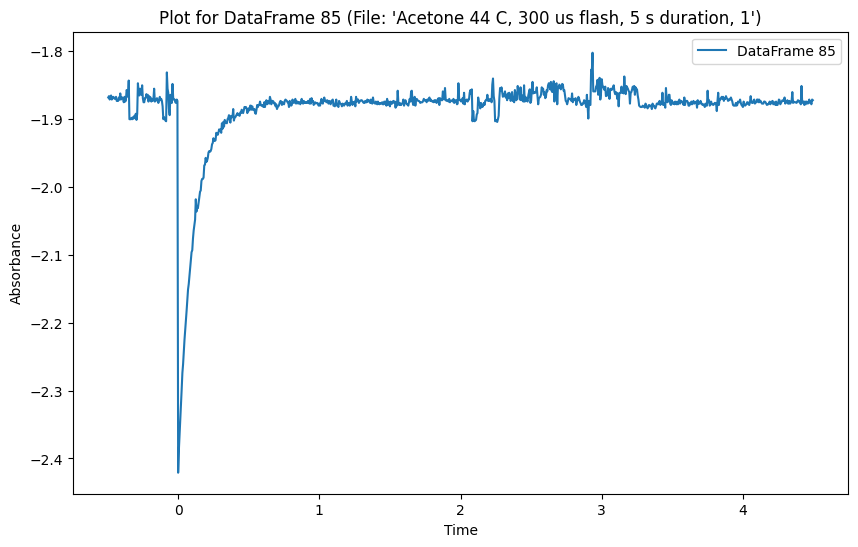

Plotting DataFrame 86 for file 'Acetone 34 C, 300 us flash, 5 s duration, 2':


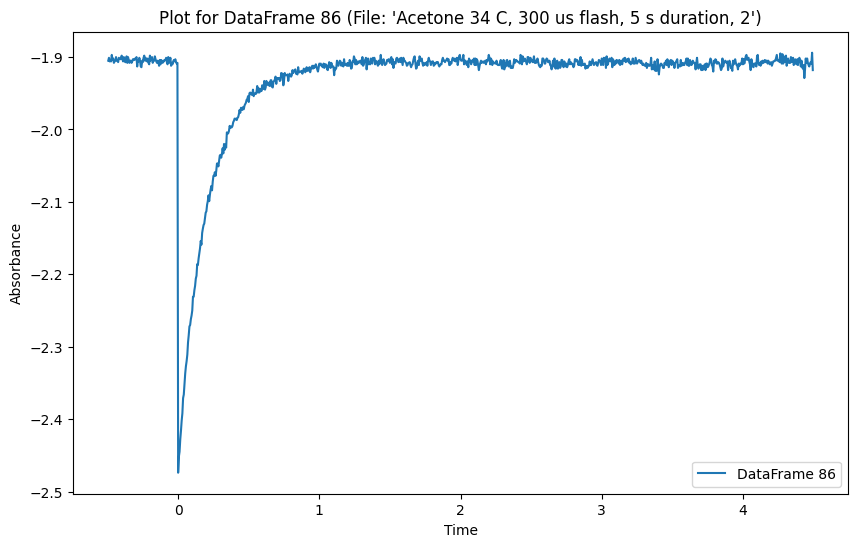

Plotting DataFrame 87 for file 'Acetone 34 C, 300 us flash, 5 s duration, 1':


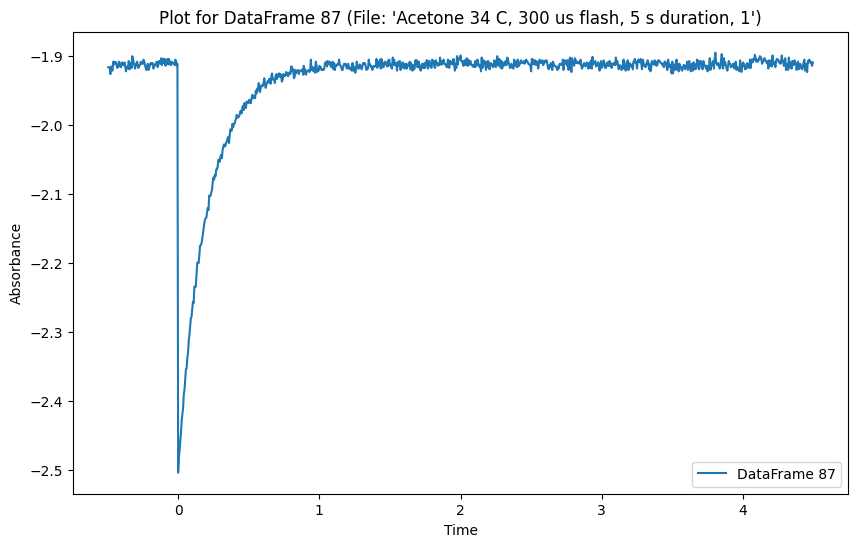

Plotting DataFrame 88 for file 'Acetone 44 C, 300 us flash, 5 s duration, 3':


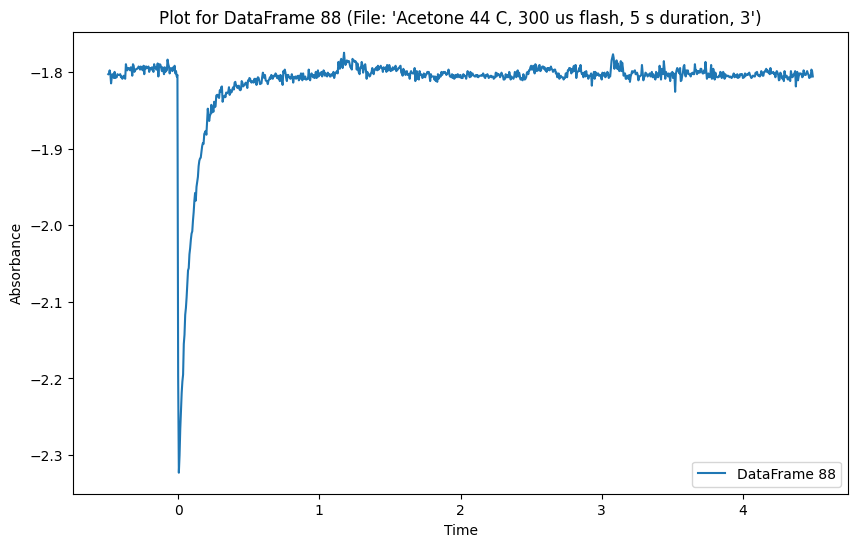

Plotting DataFrame 89 for file 'Acetone 39 C, 300 us flash, 5 s duration, 1':


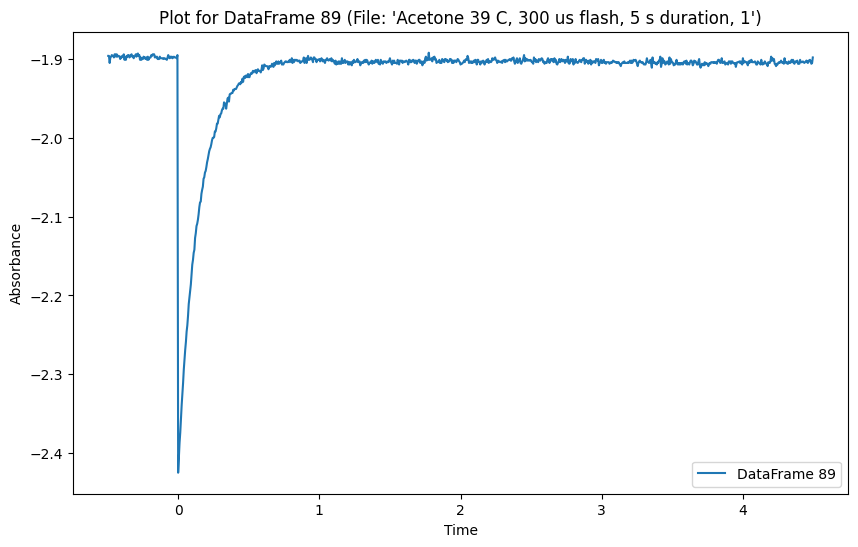

Plotting DataFrame 90 for file 'Acetone 44 C, 300 us flash, 2 s duration, 2':


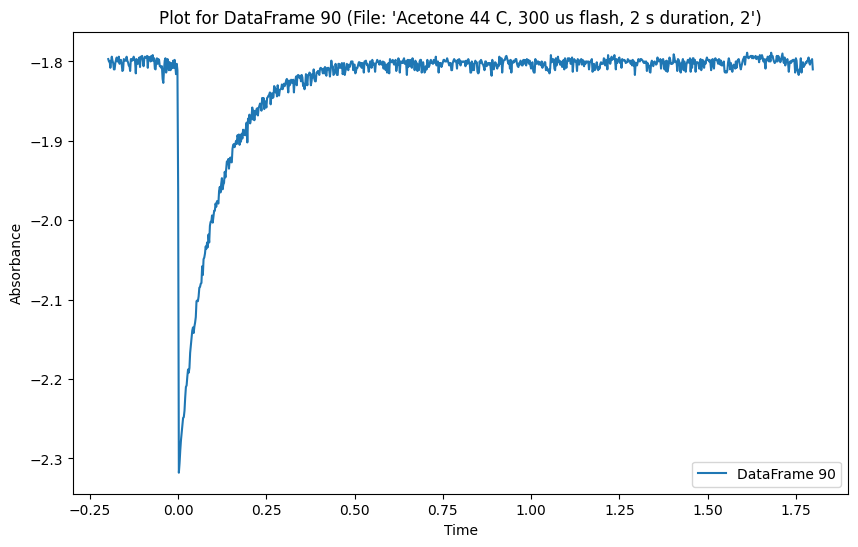

Plotting DataFrame 91 for file 'Acetone 34 C, 300 us flash, 5 s duration, 5':


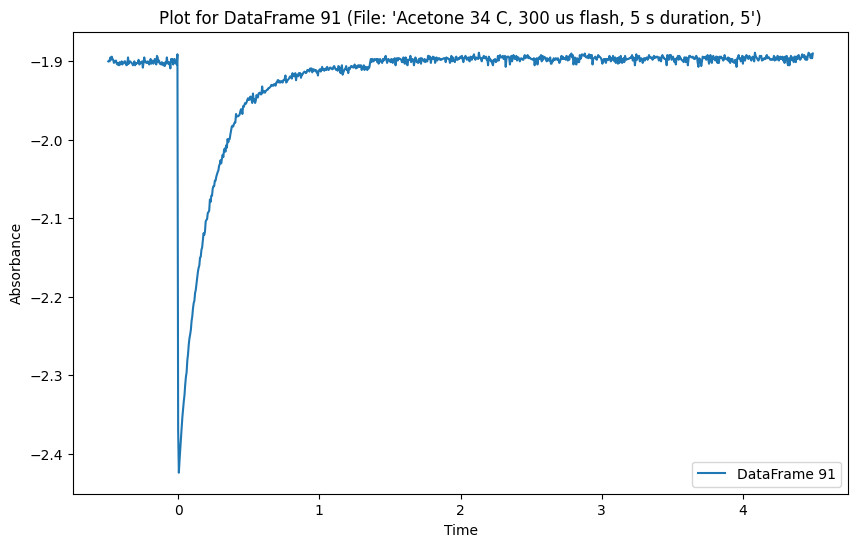

Plotting DataFrame 92 for file 'Acetone 39 C, 300 us flash, 5 s duration, 4':


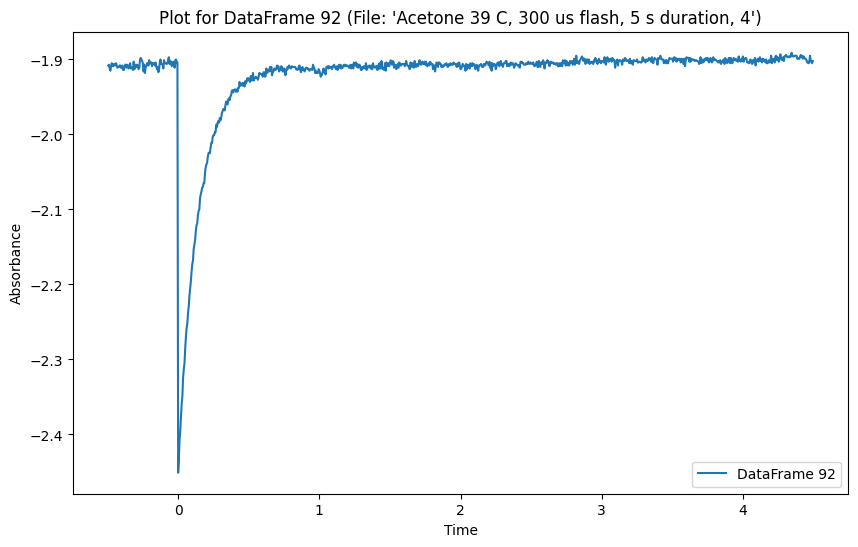

Plotting DataFrame 93 for file 'Acetone 44 C, 300 us flash, 2 s duration, 3':


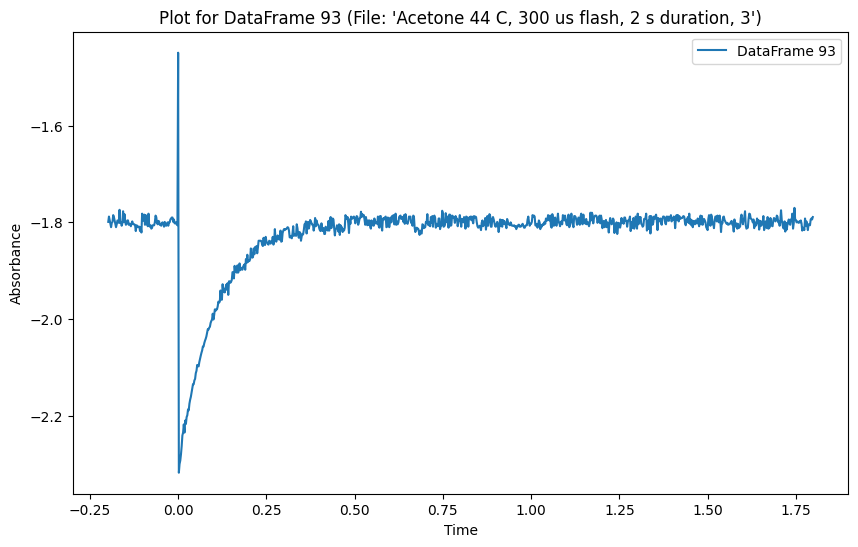

Plotting DataFrame 94 for file 'Acetone 44 C, 300 us flash, 5 s duration, 4':


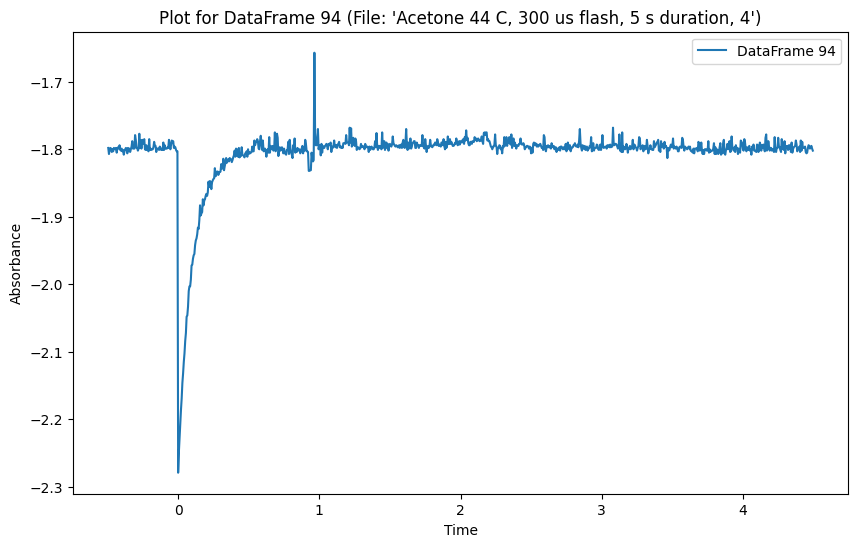

Plotting DataFrame 95 for file 'Acetone 29 C, 300 us flash, 5 s duration 3':


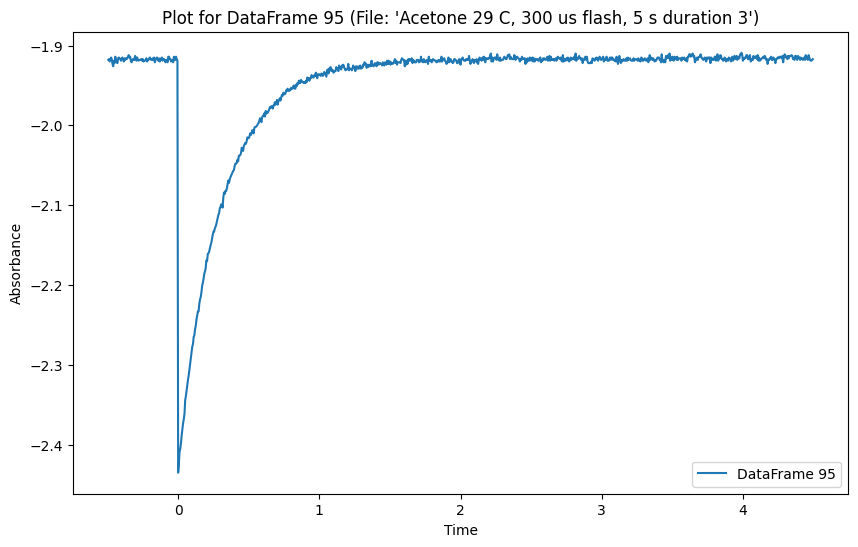

Plotting DataFrame 96 for file 'Methanol 38 C, 200 us flash, 2 s duration, 6':


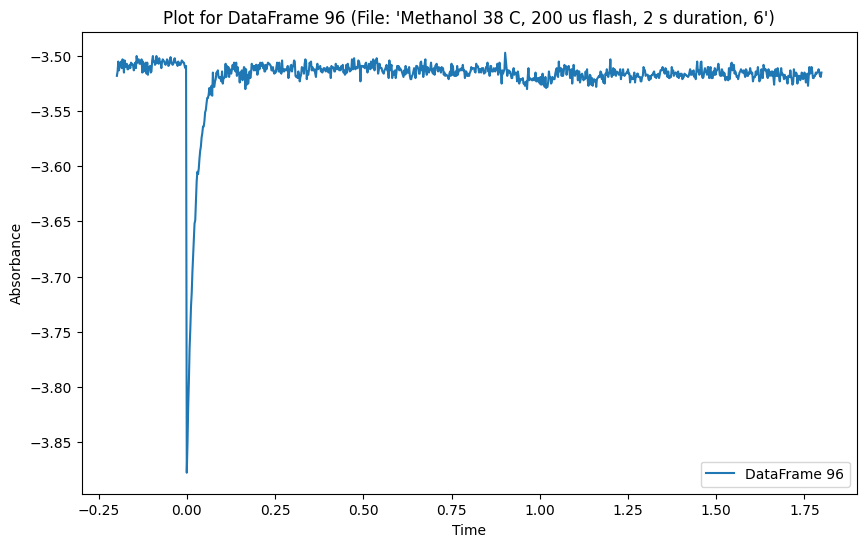

Plotting DataFrame 97 for file 'Methanol 38 C, 300 us flash, 2 s duration, 1':


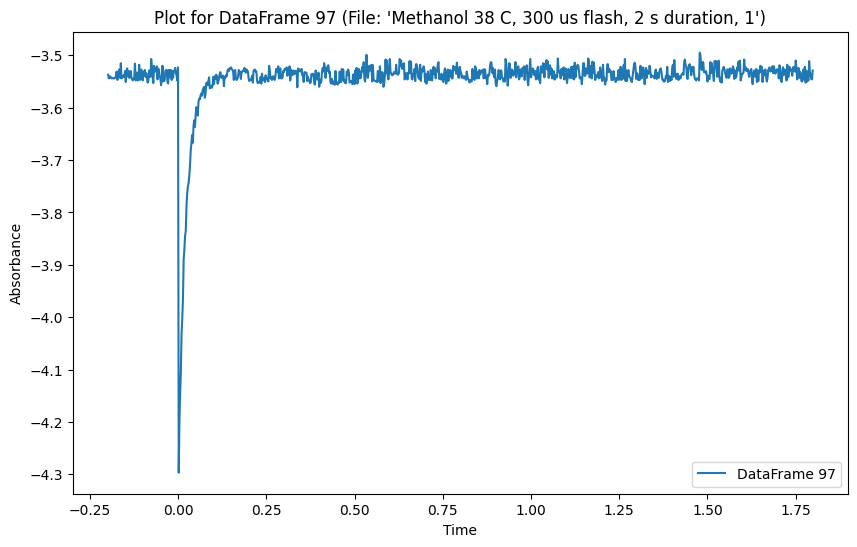

Plotting DataFrame 98 for file 'Methanol 23 C, 300 us flash, 5 s duration, 1':


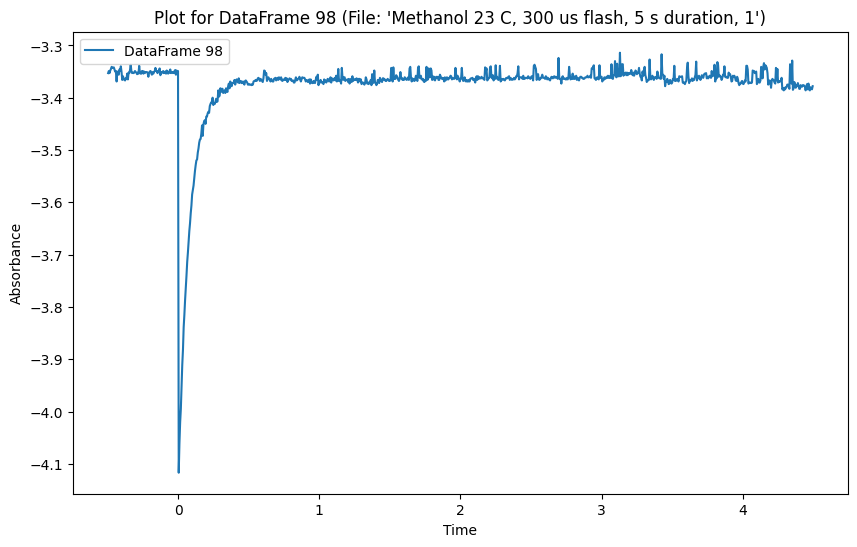

Plotting DataFrame 99 for file 'THF 39 C, 400 us flash, 25 s duration, 1':


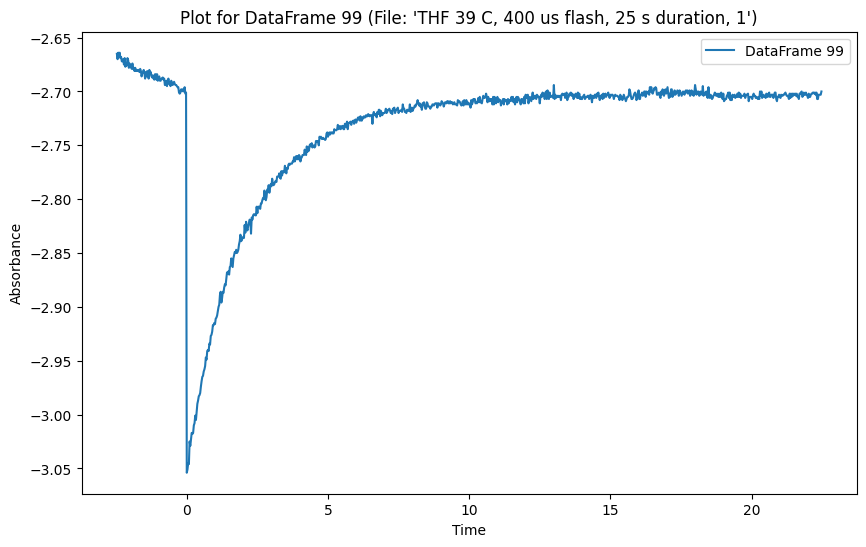

Plotting DataFrame 100 for file 'THF 39 C, 400 us flash, 25 s duration, 4':


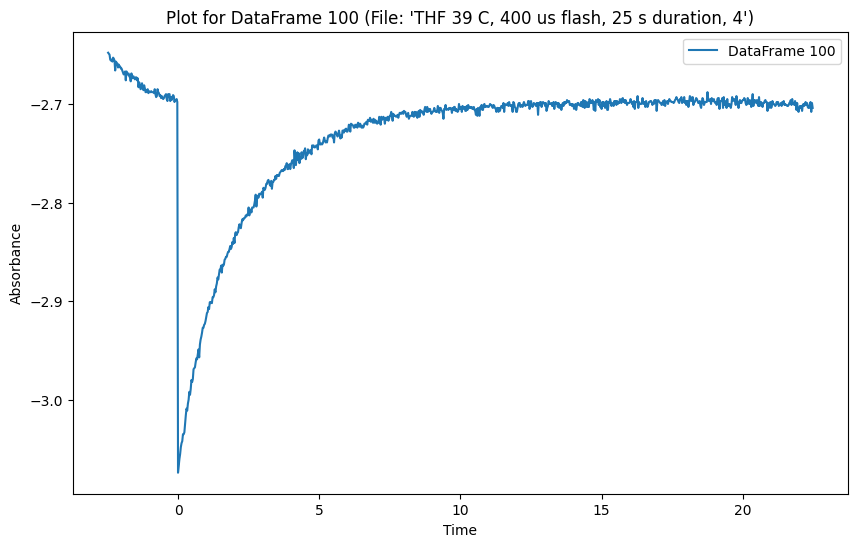

Plotting DataFrame 101 for file 'THF 39 C, 400 us flash, 25 s duration, 3':


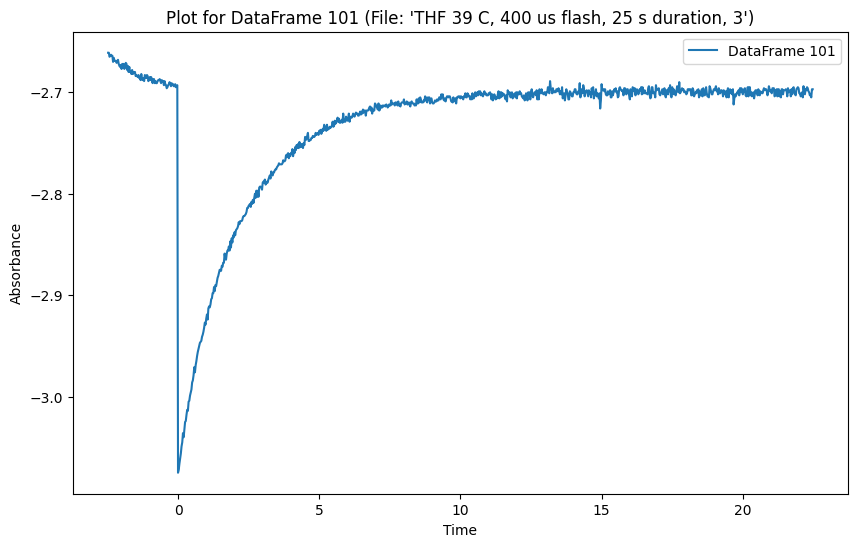

Plotting DataFrame 102 for file 'THF 39 C, 400 us flash, 25 s duration, 2':


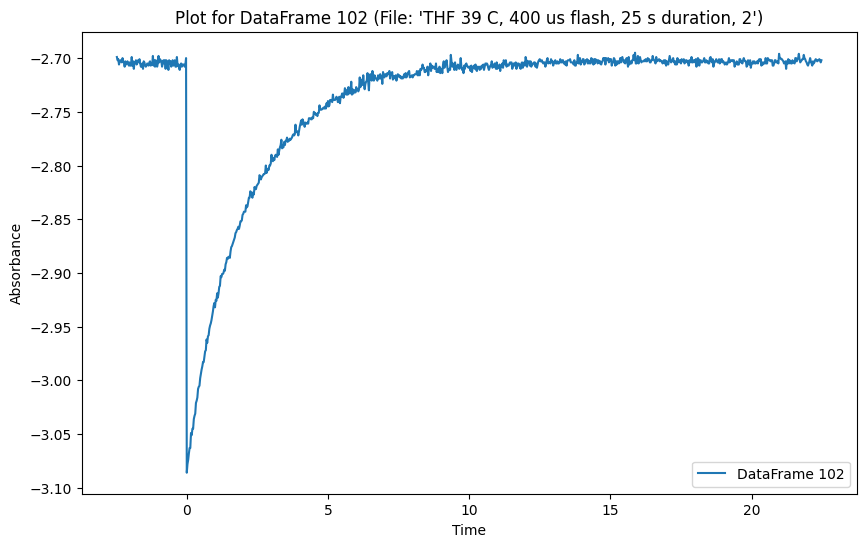

Plotting DataFrame 103 for file 'THF 39 C, 400 us flash, 25 s duration, 5':


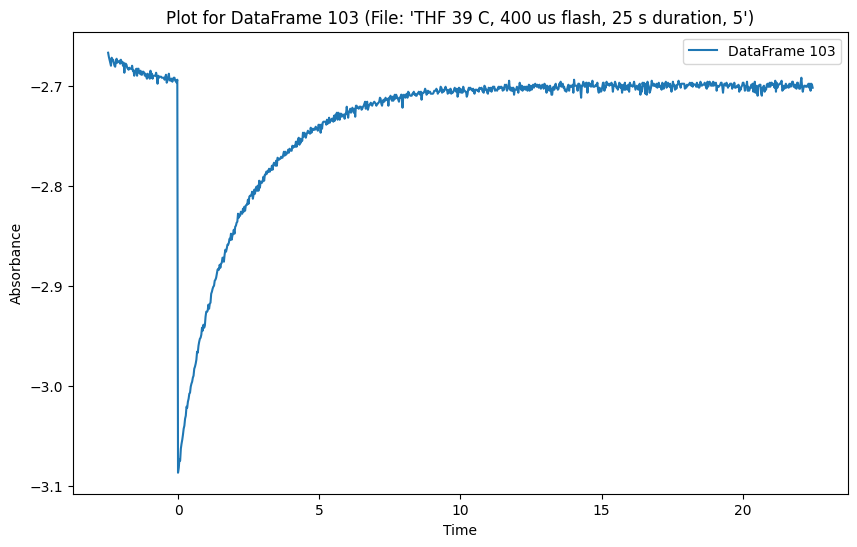

Plotting DataFrame 104 for file 'Cyclohexane 30 C, 300 us flash, 25 s duration, 2':


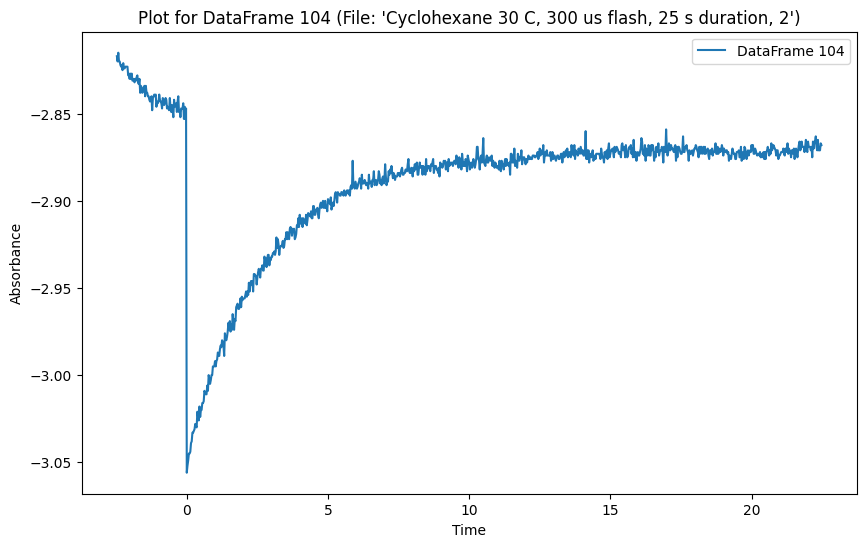

Plotting DataFrame 105 for file 'Cyclohexane 34 C, 300 us flash, 25 s duration, 1':


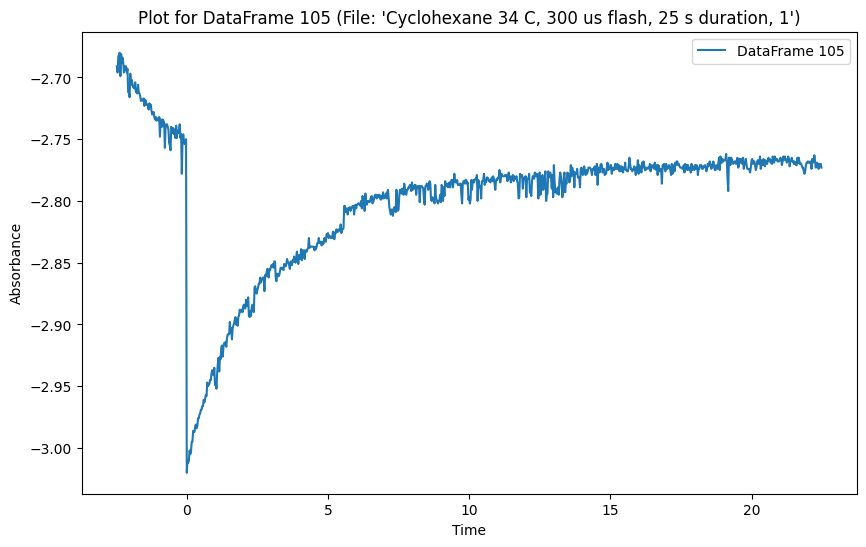

Plotting DataFrame 106 for file 'Cyclohexane 34 C, 400 us flash, 25 s duration, 1':


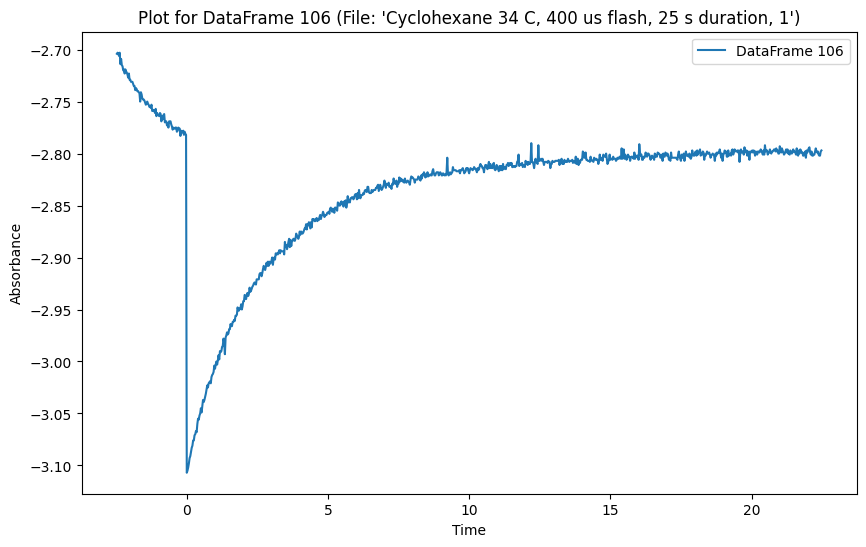

Plotting DataFrame 107 for file 'Cyclohexane 24 C, 200 us flash, 25 s duration, 2':


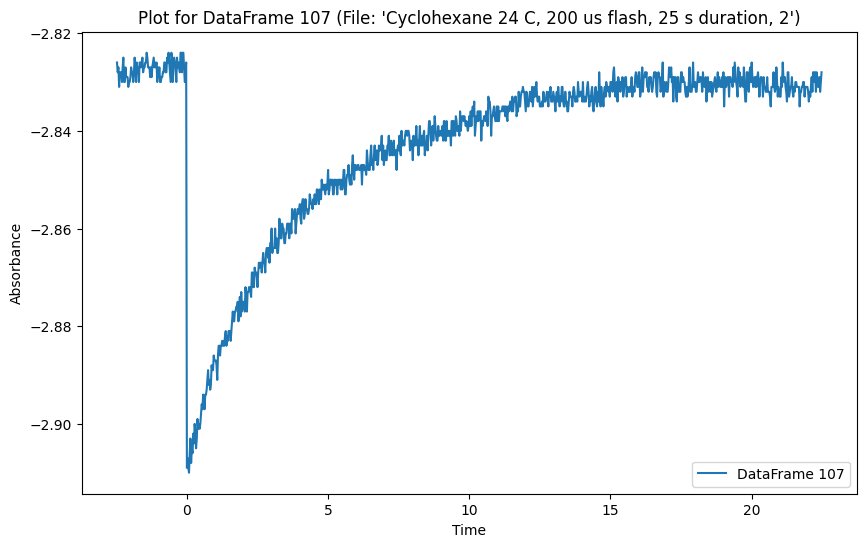

Plotting DataFrame 108 for file 'Cyclohexane 34 C, 400 us flash, 25 s duration, 2':


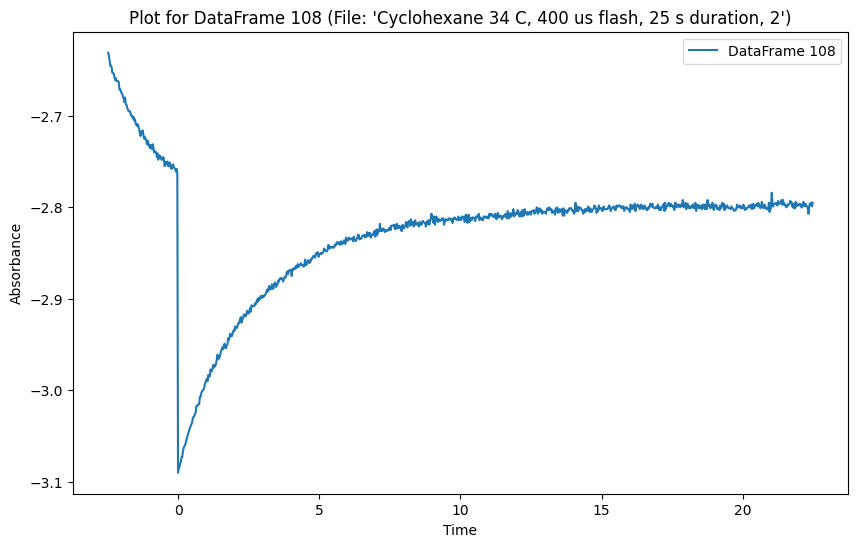

Plotting DataFrame 109 for file 'Cyclohexane 30 C, 400 us flash, 25 s duration, 3':


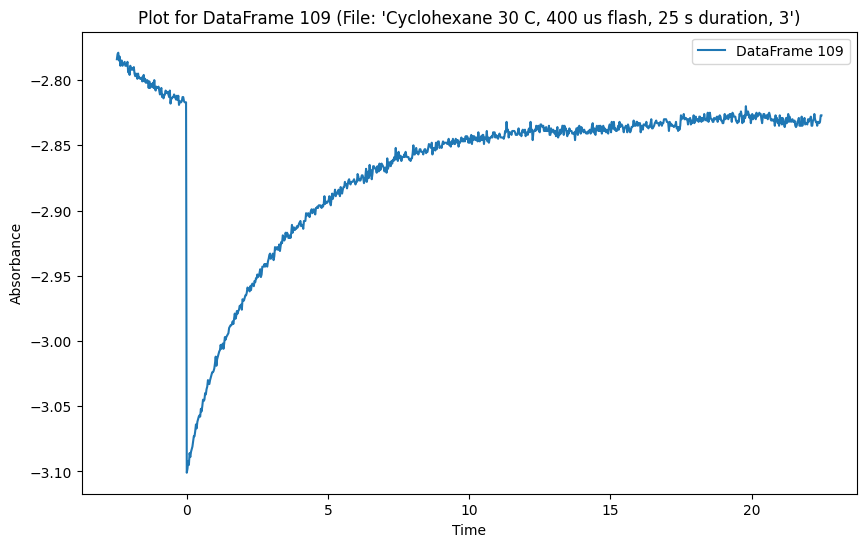

Plotting DataFrame 110 for file 'Cyclohexane 34 C, 400 us flash, 25 s duration, 3':


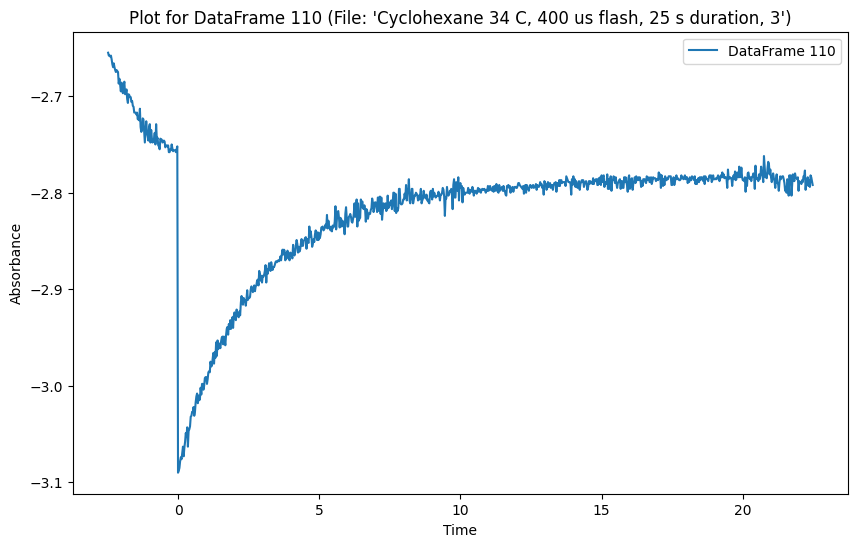

Plotting DataFrame 111 for file 'Cyclohexane 24 C, 300 us flash, 25 s duration, 1':


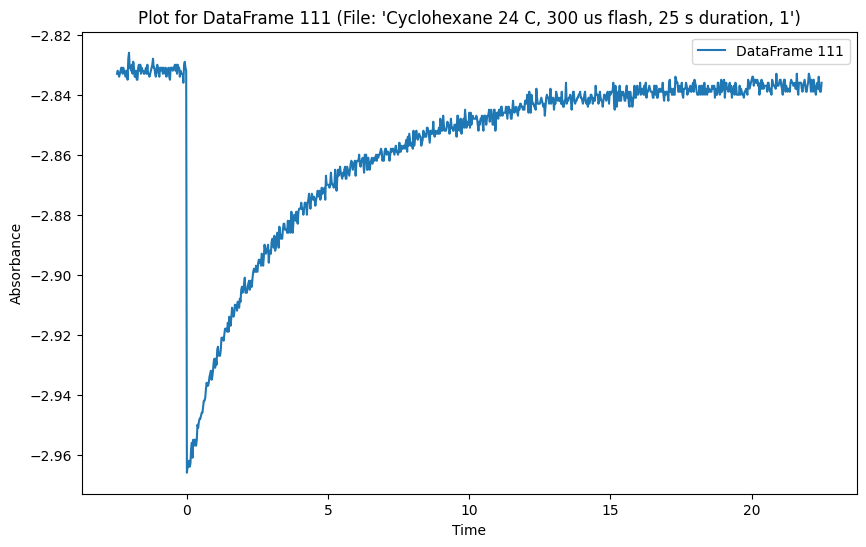

Plotting DataFrame 112 for file 'Cyclohexane 30 C, 400 us flash, 25 s duration, 1':


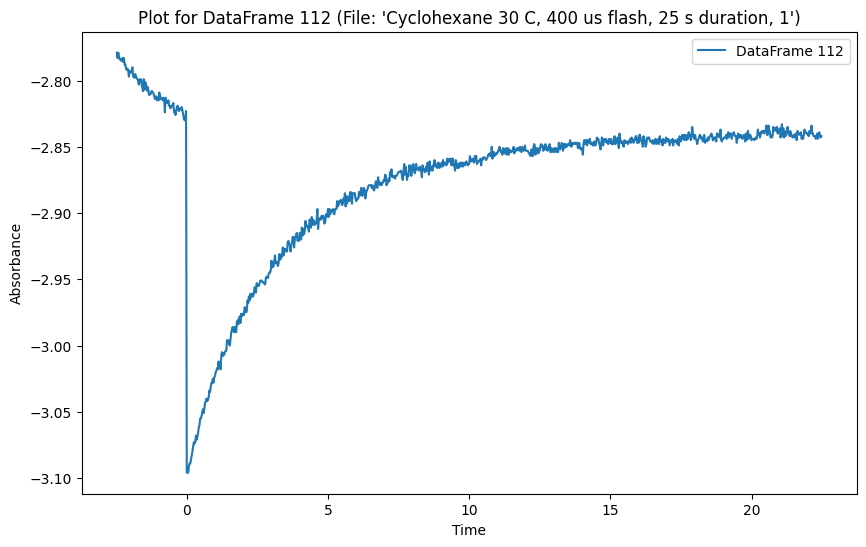

Plotting DataFrame 113 for file 'Cyclohexane 30 C, 400 us flash, 25 s duration, 4':


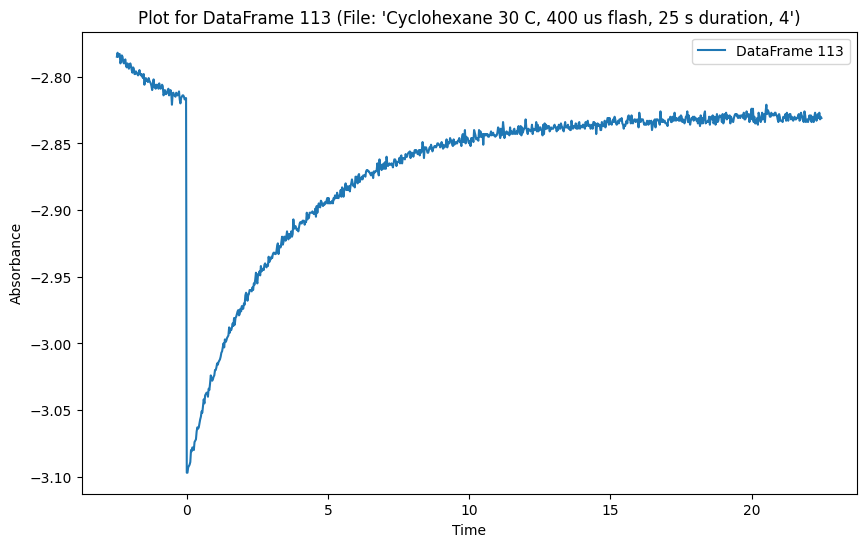

Plotting DataFrame 114 for file 'Cyclohexane 24 C, 300 us flash, 25 s duration, 2':


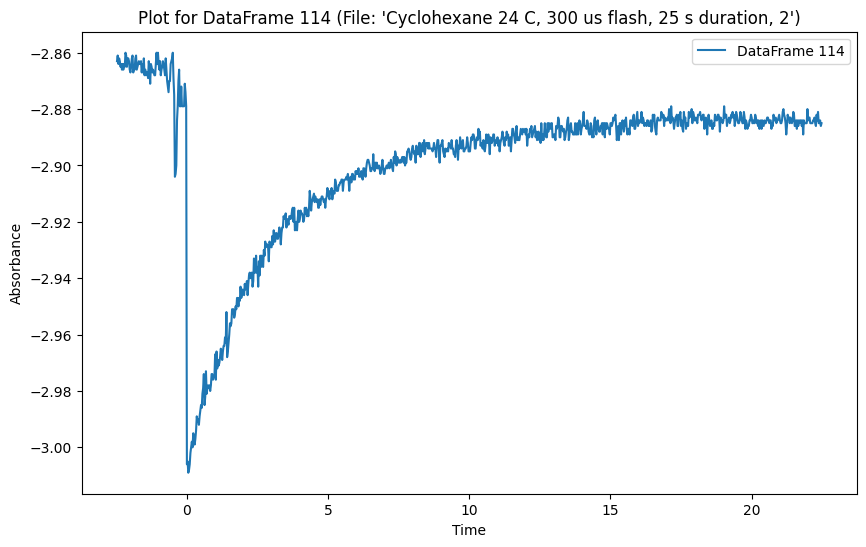

Plotting DataFrame 115 for file 'Cyclohexane 30 C, 200us flash, 25 s duration, 1':


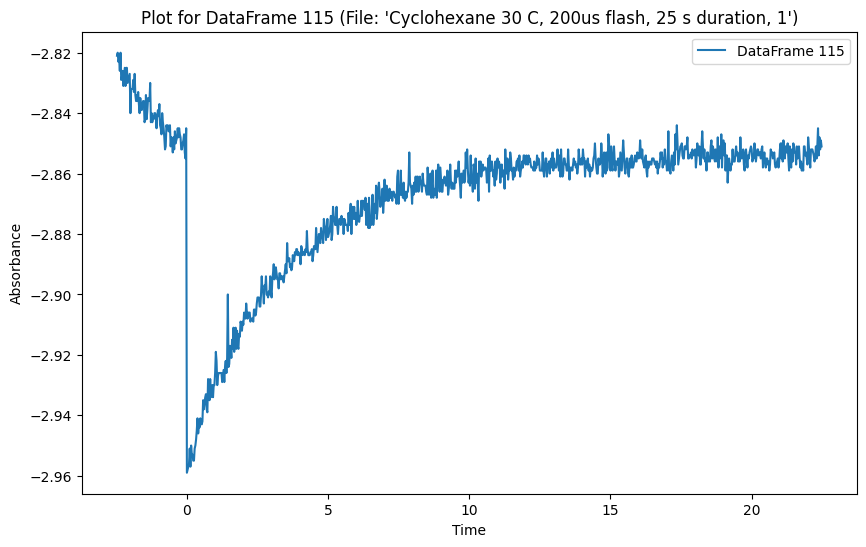

Plotting DataFrame 116 for file 'Cyclohexane 30 C, 400 us flash, 25 s duration, 2':


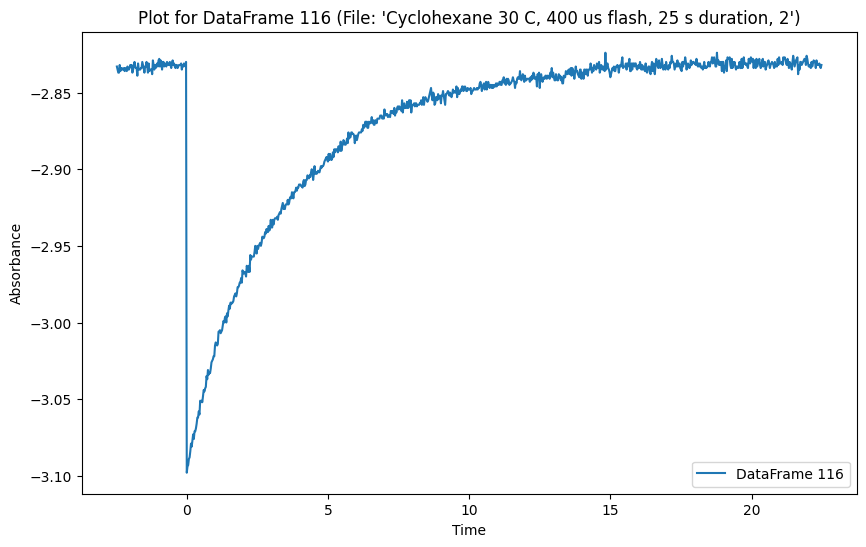

Plotting DataFrame 117 for file 'Cyclohexane 30 C, 300 us flash, 25 s duration, 1':


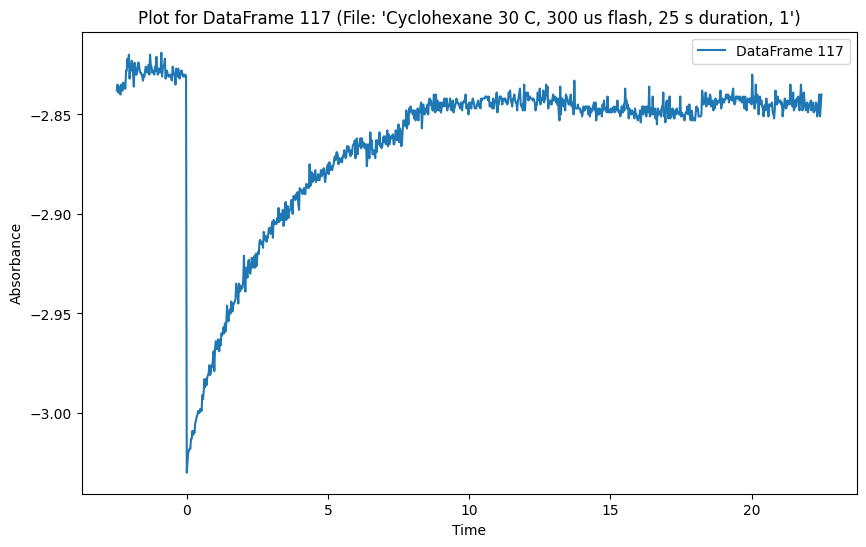

Plotting DataFrame 118 for file 'Cyclohexane 34 C, 400 us flash, 25 s duration, 4':


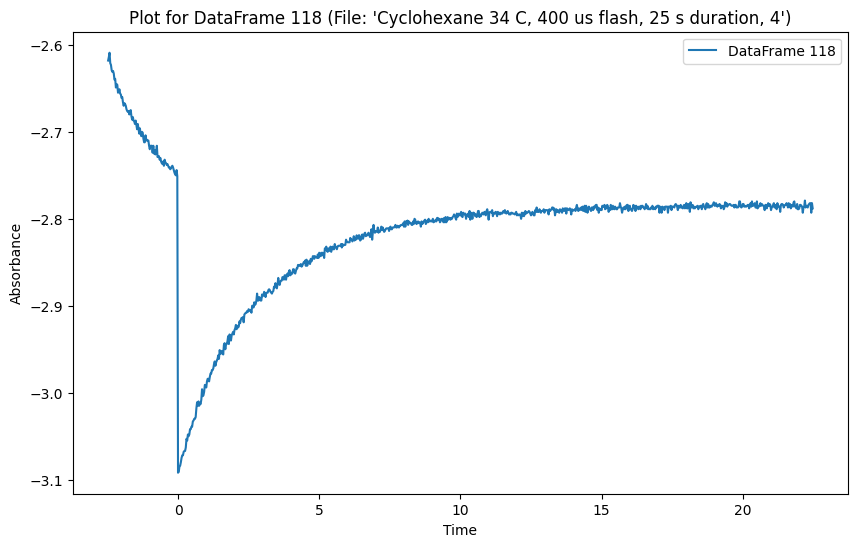

Plotting DataFrame 119 for file 'Acetone 29 C, 400 us flash, 5 s duration, 1':


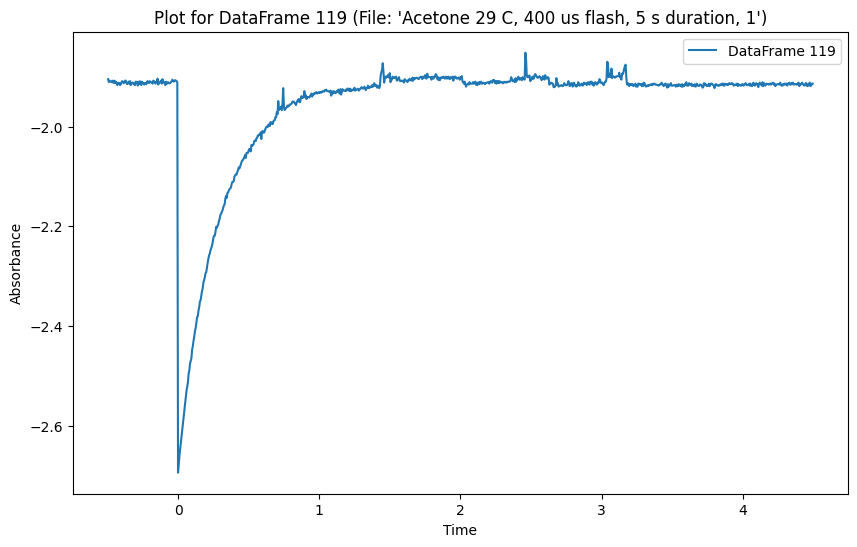

Plotting DataFrame 120 for file 'THF 44 C, 300 us flash, 25 s duration, 5':


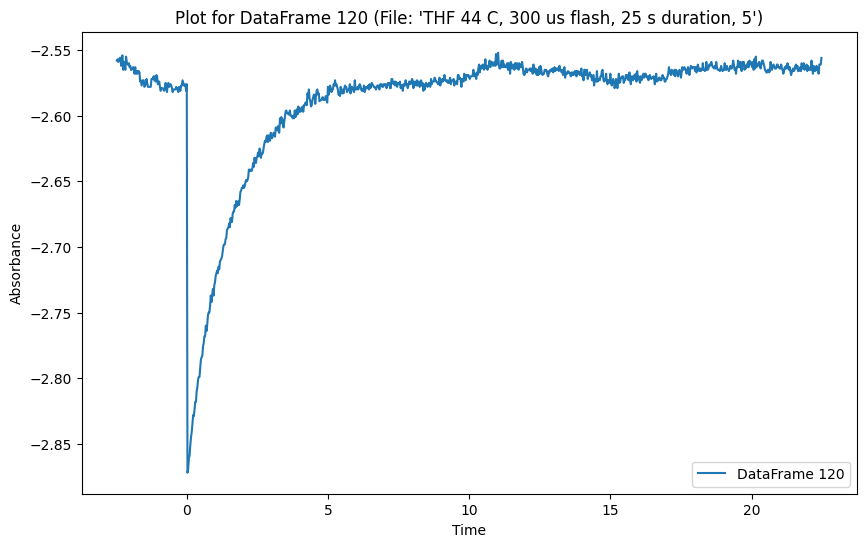

Plotting DataFrame 121 for file 'THF 44 C, 300 us flash, 25 s duration, 4':


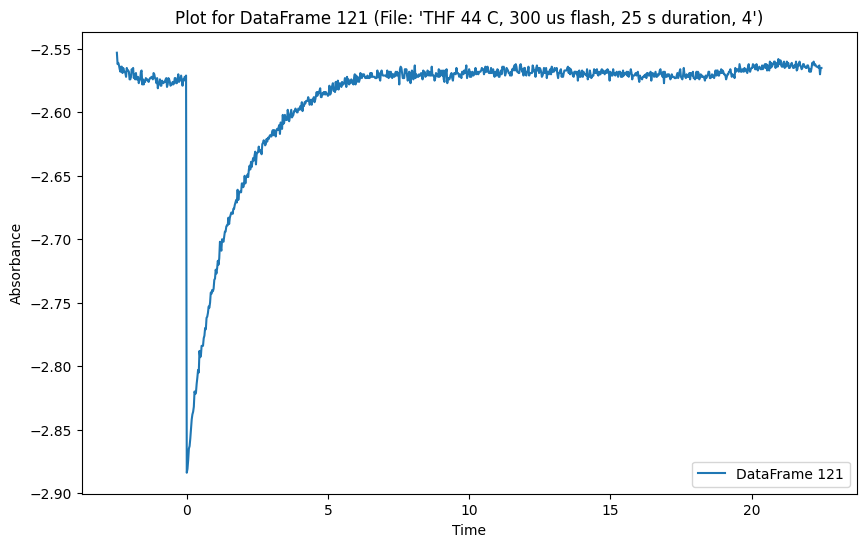

Plotting DataFrame 122 for file 'THF 44 C, 300 us flash, 25 s duration, 3':


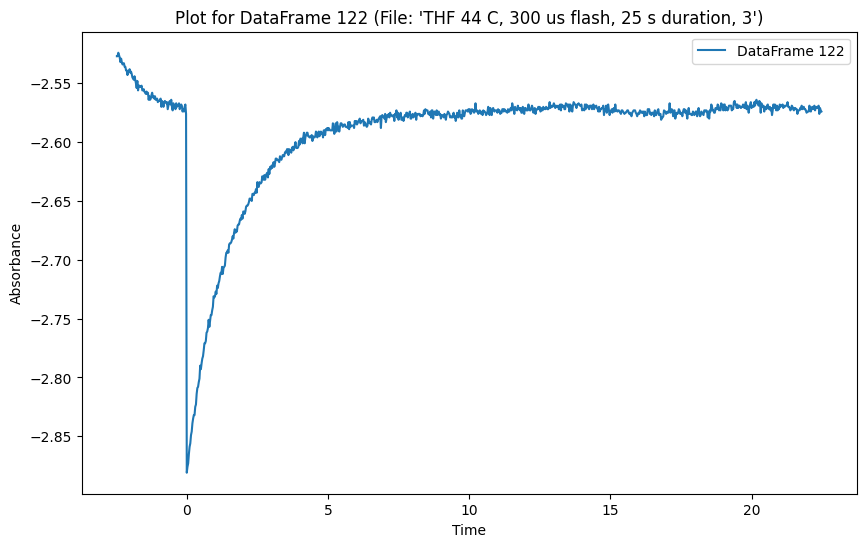

Plotting DataFrame 123 for file 'THF 44 C, 300 us flash, 25 s duration, 2':


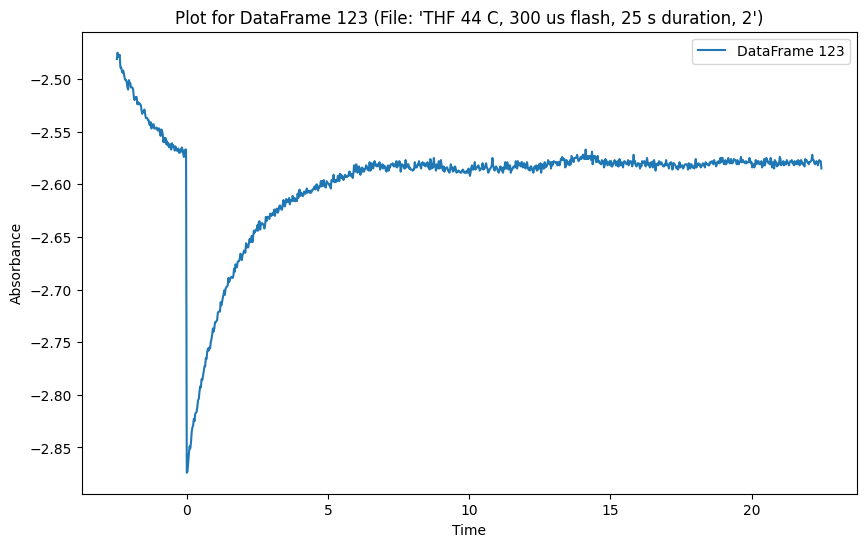

Plotting DataFrame 124 for file 'THF 34  C, 200 us flash, 25 s duration, 1':


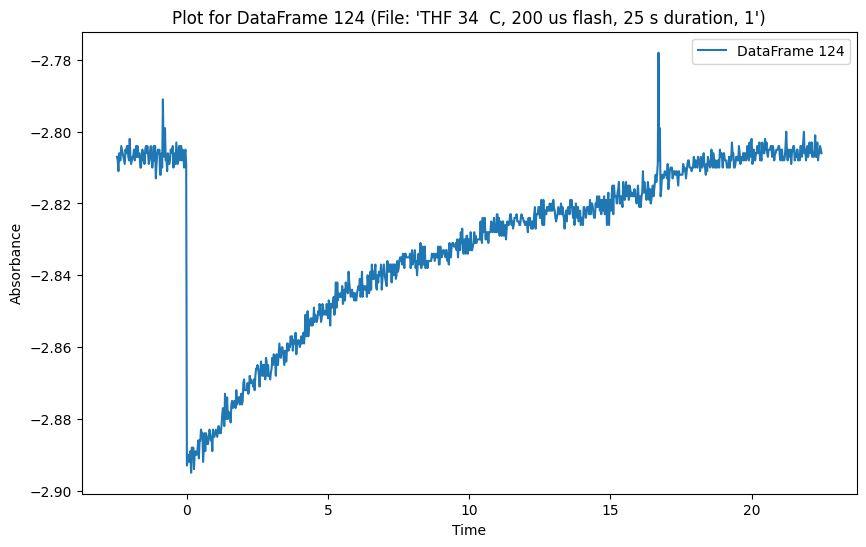

Plotting DataFrame 125 for file 'THF 34 C, 200 us flash, 50 s duration, 2':


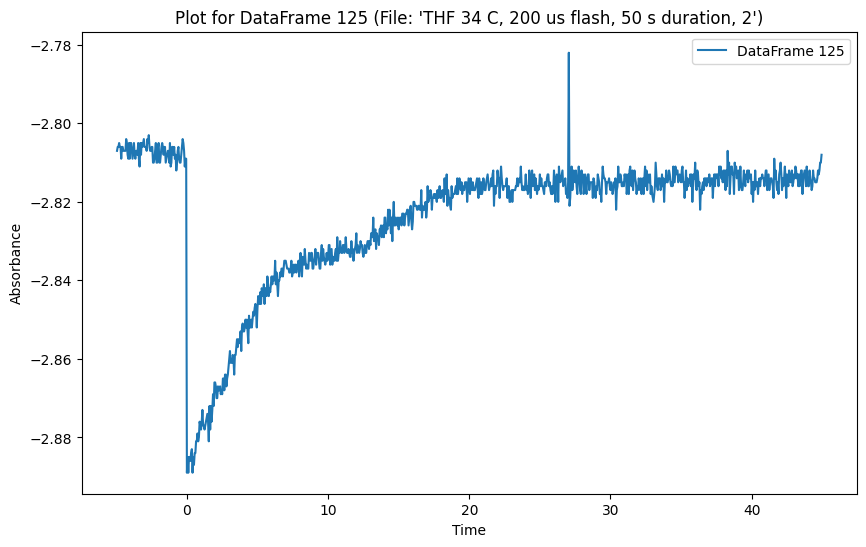

In [ ]:
for idx, (filename, df) in enumerate(dfs.items(), start=1):
    print(f"Plotting DataFrame {idx} for file '{filename}':")

    # Extract columns for plotting (modify this based on your column names)
    time_column = df.columns[0]
    y_column = df.columns[1]

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(df[time_column], df[y_column], label=f"DataFrame {idx}")

    # Customize plot labels, title, and legend
    plt.xlabel("Time")
    plt.ylabel("Absorbance")
    plt.title(f"Plot for DataFrame {idx} (File: '{filename}')")
    plt.legend()

    # Show the plot
    plt.show()
    # Calculate the average y value for x in the range [-0.25, 0]
    x_range_start = -0.25
    x_range_end = 0
    filtered_df = df[(df[time_column] >= x_range_start) & (df[time_column] <= x_range_end)]
    A_ini = filtered_df[y_column].mean()

    # Calculate the average y value for the last 100 x values
    num_x_values = len(df)
    x_range_start = df.iloc[-100, 0]  # Assuming x values are in the first column
    x_range_end = df.iloc[-1, 0]
    filtered_df = df[(df.iloc[:, 0] >= x_range_start) & (df.iloc[:, 0] <= x_range_end)]
    A_inf = filtered_df.iloc[:, 1].mean()  # Assuming y values are in the second column

    # Find the maximum y value on the graph
    A0 = df[y_column].min()
    # Add the results to the 'info' DataFrame
    if idx - 1 < len(info):
        info.at[idx - 1, 'A-initial'] = A_ini
        info.at[idx - 1, 'A-inf'] = A_inf
        info.at[idx - 1, 'A0'] = A0
    else:
        print(f"Warning: DataFrame {idx} does not have a corresponding row in 'info'. Skipping.")



In [ ]:
print(info)

Empty DataFrame
Columns: [Solvent, Temperature (C), Flash Rate (us), Duration (s), Trial num.]
Index: []


In [ ]:
#Shows solvents used
unique_solvents = info['Solvent'].unique()
print(unique_solvents)

['Methanol' 'DCM' 'Ethanol' 'Acetone' 'THF' 'Cyclohexane']


# **Calculations**

In [ ]:


def plot_equation(filename, df, info):
    gradient_list = []
   # Dictionary for time ranges based on solvent and total duration
    time_ranges = {
    'Methanol': {0.5: (0.01, 0.08), 1: (0.01, 0.08), 2: (0.01, 0.08)},
    'Acetone': {1: (0.01, 0.05), 2: (0.01, 0.25), 5: (0.01, 0.25)},
    'DCM': {0.5: (0.01, 0.05), 2: (0.01, 0.06), 5: (0.01, 0.06),1:(0.01,0.06),5: (0.01, 0.06)},
    'Ethanol': {10: (0.01, 1.5)}
}
    #Add THF
    time_ranges['THF'] = {25: (0.0, 5.0), 50: (0.0, 5.0)}

    # Add Cyclohexane
    time_ranges['Cyclohexane'] = {25: (0.0, 4.0), 50: (0.0, 4.0)}

    for i in range(len(info)):
        duration = info.iloc[i]['Duration (s)']
        a_inf = info.iloc[i]['A-inf']
        a0 = info.iloc[i]['A-initial']

       # Filter data based on solvent and duration
        solvent = info.iloc[i]['Solvent']
        if solvent not in time_ranges or duration not in time_ranges[solvent]:
            print(f"Skipping invalid duration for file: {filename[i]}")
            gradient_list.append(np.nan)  # Append NaN for skipped file
            continue

        t_range = time_ranges[solvent][duration]
        t = df[i].iloc[:, 0]
        at = df[i].iloc[:, 1]
        t_filtered = t[(t >= t_range[0]) & (t <= t_range[1])]
        at_filtered = at[(t >= t_range[0]) & (t <= t_range[1])]

        try:
            # Calculate ln(A_inf - At) and ln(A_inf - A0)
            ln_a_inf_minus_at = np.log(np.abs(a_inf - at_filtered))
            ln_a_inf_minus_a0 = np.log(np.abs(a_inf - a0))

            # Check for and handle infinite or NaN values
            if np.any(np.isinf(ln_a_inf_minus_at)) or np.any(np.isnan(ln_a_inf_minus_at)):
                print(f"Skipping invalid data for {filename[i]}")
                gradient_list.append(np.nan)  # Append NaN for invalid data
                continue

            # Create a Linear Regression model
            model = LinearRegression()
            t_filtered_reshaped = t_filtered.values.reshape(-1, 1)
            ln_a_inf_minus_at_reshaped = ln_a_inf_minus_at.values.reshape(-1, 1)

            # Fit the model
            model.fit(t_filtered_reshaped, ln_a_inf_minus_at_reshaped)

            # Get the gradient (coefficient)
            k = model.coef_[0][0]
            gradient_list.append(-k)
            print(f"Gradient for {filename[i]}: {k}")

            # Plot the data and the fitted line
            plt.plot(t_filtered, ln_a_inf_minus_at, 'o', label=f"Data ({filename[i]})")
            plt.plot(t_filtered, model.predict(t_filtered_reshaped), label=f"Fitted line (k={-k:.4f})")
            plt.xlabel('Time (s)')
            plt.ylabel('ln(A_inf - At)')
            plt.title(f"ln(A_inf - At) vs. Time for {filename[i]}")
            plt.grid(True)
            plt.legend()
            plt.show()

            print()

        except Exception as e:
            print(f"Error processing file {filename[i]}: {str(e)}")
            gradient_list.append(np.nan)

    info['gradient (k)'] = gradient_list

# Process each file in the dictionary
#for filename, df in dfs.items():

list_of_filenames = []
list_of_df = []

for filename, df in dfs.items():
  list_of_filenames.append(filename)
  list_of_df.append(df)

#print(np.shape(list_of_filenames), np.shape(list_of_df))

plot_equation(list_of_filenames, list_of_df, info)

#list_of_df[0].iloc[:,0]


In [ ]:
print(info)

      Solvent Temperature (C) Flash Rate (us)  Duration (s) Trial num.  \
0    Methanol              23             200           2.0          1   
1    Methanol              23             200           2.0          2   
2    Methanol              23             200           2.0          3   
3    Methanol              23             200           2.0          5   
4    Methanol              23             200           2.0          4   
..        ...             ...             ...           ...        ...   
120       THF              44             300          25.0          4   
121       THF              44             300          25.0          3   
122       THF              44             300          25.0          2   
123       THF              34             200          25.0          1   
124       THF              34             200          50.0          2   

     A-initial    A-inf     A0  gradient (k)  
0    -3.696690 -3.69249 -4.178      6.464473  
1    -3.580530 -3

*Threshold for SD from mean for values of k for each solvent and temperature *

In [ ]:
# Calculate Z-scores for each combination of solvents and temperatures
info['z_score'] = info.groupby(['Solvent', 'Temperature (C)'])['gradient (k)'].transform(lambda x: zscore(x))

# Set a threshold for significance (e.g., 2 standard deviations)
threshold = 2

# Identify rows where the absolute Z-score is greater than the threshold
significant_rows = info[abs(info['z_score']) > threshold]

# Drop the significant rows from the original DataFrame
info = info.drop(significant_rows.index)

# Print or further analyze the significant rows
print(significant_rows)

Empty DataFrame
Columns: [Solvent, Temperature (C), Flash Rate (us), Duration (s), Trial num., gradient (k), z_score]
Index: []


In [ ]:
# Group by Solvent and Temperature, calculate mean and count, reset index
grouped_info = info.groupby(['Solvent', 'Temperature (C)']) \
                 .agg({'gradient (k)': ['mean', 'size']}) \
                 .reset_index()
# Rename columns
grouped_info.columns = ['Solvent', 'Temperature (C)', 'mean (gradient (k))', 'count']
grouped_info['log10(k)'] = np.log10(grouped_info['mean (gradient (k))'])
#add kelvin
grouped_info['Temperature (K)'] = grouped_info['Temperature (C)'] + 273.15
#test k value magnitude
grouped_info['mean (gradient (k))']=grouped_info['mean (gradient (k))']/100
# Print grouped info
print(grouped_info)

        Solvent  Temperature (C)  mean (gradient (k))  count  log10(k)  \
0       Acetone               29             0.035265      3  0.547341   
1       Acetone               34             0.048311      5  0.684050   
2       Acetone               39             0.068544      5  0.835969   
3       Acetone               44             0.095095      8  0.978158   
4   Cyclohexane               24             0.002969      3 -0.527409   
5   Cyclohexane               30             0.003115      7 -0.506603   
6   Cyclohexane               34             0.003346      5 -0.475503   
7           DCM               18             0.296132      7  1.471485   
8           DCM               20             0.416604      5  1.619723   
9           DCM               22             0.396389      5  1.598122   
10          DCM               24             0.370978      5  1.569349   
11          DCM               26             0.387106      4  1.587830   
12      Ethanol               17      

Gradient for Acetone: -6372.1960817673535
Activation Energy for Acetone: 52978.43822381378
ln(A) for Acetone: 17.73338613020562
A for Acetone: 50293486.32710858
Gradient for Cyclohexane: -1058.827675401408
Activation Energy for Cyclohexane: 8803.093293287306
ln(A) for Cyclohexane: -2.26266814971536
A for Cyclohexane: 0.10407243314518504
Gradient for DCM: -1846.338456300521
Activation Energy for DCM: 15350.457925682533
ln(A) for DCM: 5.264449063074677
A for DCM: 193.33976142597618
Gradient for Ethanol: -4190.691446475794
Activation Energy for Ethanol: 34841.40868599975
ln(A) for Ethanol: 9.771548757842254
A for Ethanol: 17527.892668794146
Gradient for Methanol: -7888.604465698467
Activation Energy for Methanol: 65585.85752781705
ln(A) for Methanol: 23.87465650743498
A for Methanol: 23368539933.298008
Gradient for THF: -12665.491711434532
Activation Energy for THF: 105300.8980888667
ln(A) for THF: 34.8665883131347
A for THF: 1387927903793982.0


<ipython-input-77-bad5fadf4337>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  solvent_df = solvent_df.append({'Solvent': solvent, 'E_act': E_act, 'A': A}, ignore_index=True)
<ipython-input-77-bad5fadf4337>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  solvent_df = solvent_df.append({'Solvent': solvent, 'E_act': E_act, 'A': A}, ignore_index=True)
<ipython-input-77-bad5fadf4337>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  solvent_df = solvent_df.append({'Solvent': solvent, 'E_act': E_act, 'A': A}, ignore_index=True)
<ipython-input-77-bad5fadf4337>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  solvent_df = solvent_df.appe

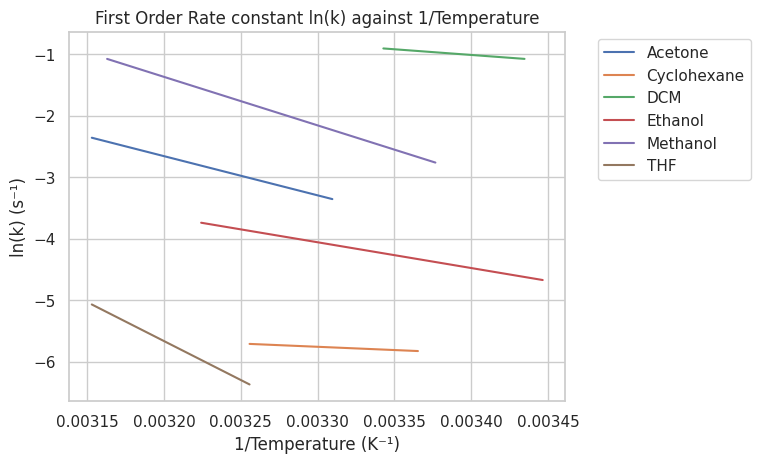

In [ ]:

# Gas constant
R = 8.314

# Create a new DataFrame for solvents
solvent_df = pd.DataFrame(columns=['Solvent', 'E_act', 'A'])

# Assuming you have 'grouped_info' DataFrame with 'gradient' column
grouped_info['inv_temp'] = 1 / grouped_info['Temperature (K)']
grouped_info['ln_gradient'] = np.log(grouped_info['mean (gradient (k))'])

# Plotting
for solvent, data in grouped_info.groupby('Solvent'):
    # Remove rows with NaN values in 'inv_temp' and 'ln_gradient'
    data = data.dropna(subset=['inv_temp', 'ln_gradient'])

    # Check if there are still data points after removing NaN values
    if data.empty:
        continue

    # Linear regression
    model = LinearRegression()
    model.fit(data[['inv_temp']], data['ln_gradient'])


    # Calculate the gradient of the line
    line_gradient = model.coef_[0]
    print(f"Gradient for {solvent}: {line_gradient}")
    plt.plot(data['inv_temp'], model.predict(data[['inv_temp']]), label=f'{solvent}')
    # Calculate activation energy
    E_act =- R * line_gradient
    print(f"Activation Energy for {solvent}: {E_act}")

    # Calculate the y-intercept (ln(A))
    ln_A = model.intercept_
    print(f"ln(A) for {solvent}: {ln_A}")

    # Calculate A from ln(A)
    A = np.exp(ln_A)
    print(f"A for {solvent}: {A}")

    # Append data to the new DataFrame
    solvent_df = solvent_df.append({'Solvent': solvent, 'E_act': E_act, 'A': A}, ignore_index=True)

plt.xlabel('1/Temperature (K\u207B\u00B9)')
plt.ylabel('ln(k) (s\u207B\u00B9)')
plt.title('First Order Rate constant ln(k) against 1/Temperature')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
# Assuming your DataFrame is named solvent_df
polarity_data = {
    'Acetone': 0.355,
    'Cyclohexane': 0.006,
    'DCM': 0.309,
    'Ethanol': 0.654,
    'Methanol': 0.775,
    'THF': 0.207
}
# Add the 'Solvent Polarity' column based on the dictionary
solvent_df['Solvent Polarity'] = solvent_df['Solvent'].map(polarity_data)

<ipython-input-79-616f67b7bf14>:15: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  uvvis_df = pd.read_csv(file_path, delim_whitespace=True, error_bad_lines=False)  # Adjust the delimiter if needed
<ipython-input-79-616f67b7bf14>:15: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  uvvis_df = pd.read_csv(file_path, delim_whitespace=True, error_bad_lines=False)  # Adjust the delimiter if needed
Skipping line 3649: expected 2 fields, saw 4

<ipython-input-79-616f67b7bf14>:15: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  uvvis_df = pd.read_csv(file_path, delim_whitespace=True, error_bad_lines=False)  # Adjust the delimiter if needed
Skipping line 3649: expected 2 fields, saw 4

<ipython-input-79-616f67b7bf14>:15:

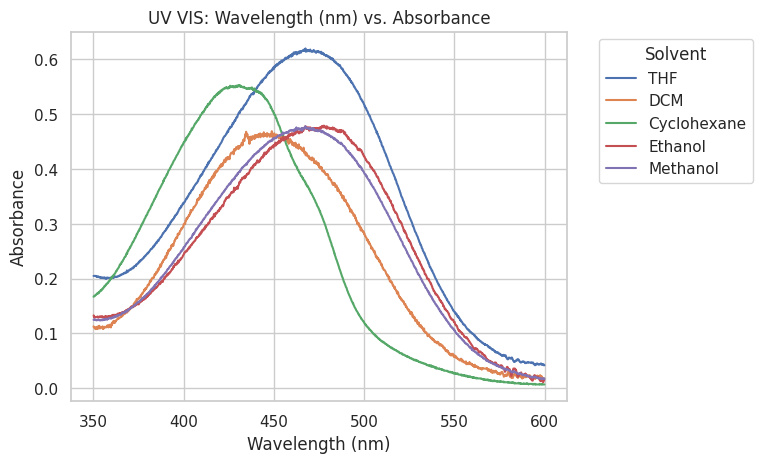

In [ ]:
# Function to filter filenames
def filter_uvvis_filename(filename):
    return filename.endswith('.txt')  # Update the file extension based on your files

# Get list of UVVIS files
uvvis_files = [filename for filename in os.listdir(UVVIS_PATH) if filter_uvvis_filename(filename)]
# Add 'Max Wavelength' column to the existing solvent_df
solvent_df['Max Wavelength'] = None
# Iterate through UVVIS files
for filename in uvvis_files:
    file_path = os.path.join(UVVIS_PATH, filename)

    try:
        # Read the text file into a DataFrame, skipping problematic lines
        uvvis_df = pd.read_csv(file_path, delim_whitespace=True, error_bad_lines=False)  # Adjust the delimiter if needed

        # Check if the DataFrame is not empty
        if not uvvis_df.empty:

            # Filter data within x-range (250 to 600)
            filtered_df = uvvis_df[(uvvis_df.iloc[:, 0] >= 350) & (uvvis_df.iloc[:, 0] <= 600)]

           # Extract the maximum absorbance value
            max_wavelength = filtered_df.iloc[:, 0][filtered_df.iloc[:, 1] == filtered_df.iloc[:, 1].max()]  # This finds the wavelength(s) corresponding to the maximum absorbance

            # Remove '.txt' extension from filename
            label = os.path.splitext(filename)[0]

            # Check if the solvent name matches the filename (assuming matching convention)
            if label in solvent_df['Solvent'].values:
                # Update the corresponding row in 'solvent_df' with the maximum wavelength(s)
                # You can choose how to handle multiple maximum wavelengths (e.g., average, first occurrence)
                solvent_df.loc[solvent_df['Solvent'] == label, 'Max Wavelength'] = max_wavelength.iloc[0]  # Assuming you want the first occurrence
            else:
                print(f"Warning: Solvent name '{label}' not found in solvent_df.")

            # Plotting first column against the second one
            plt.plot(filtered_df.iloc[:, 0], filtered_df.iloc[:, 1], label=label)
        else:
            print(f"Warning: DataFrame is empty for file {filename}")
    except Exception as e:
        print(f"Error processing file {filename}: {e}")

# Add labels and title
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('UV VIS: Wavelength (nm) vs. Absorbance')

# Display legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Solvent')

# Show the plot
plt.show()

In [ ]:
print(solvent_df)

       Solvent          E_act             A  Solvent Polarity Max Wavelength
0      Acetone   52978.438224  5.029349e+07             0.355           None
1  Cyclohexane    8803.093293  1.040724e-01             0.006         430.28
2          DCM   15350.457926  1.933398e+02             0.309          448.9
3      Ethanol   34841.408686  1.752789e+04             0.654         477.36
4     Methanol   65585.857528  2.336854e+10             0.775         467.55
5          THF  105300.898089  1.387928e+15             0.207         467.55


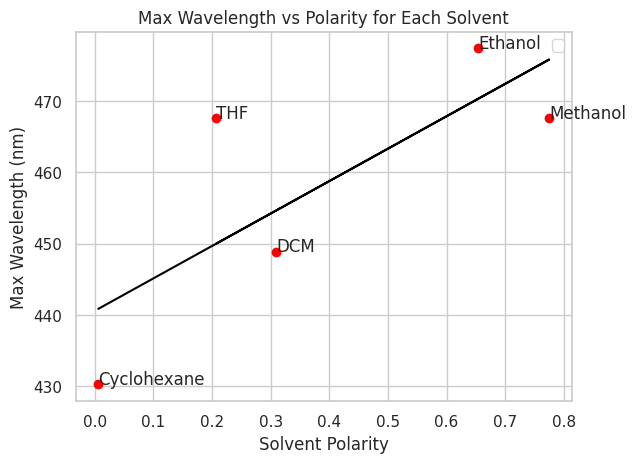

In [ ]:
# Filter out rows where 'Max Wavelength' is not available
filtered_df = solvent_df.dropna(subset=['Max Wavelength'])

# Plotting
plt.scatter(filtered_df['Solvent Polarity'], filtered_df['Max Wavelength'],color='red')
plt.title('Max Wavelength vs Polarity for Each Solvent')
plt.xlabel('Solvent Polarity')
plt.ylabel('Max Wavelength (nm)')

# Add labels for each solvent
for i, txt in enumerate(filtered_df['Solvent']):
    plt.annotate(txt, (filtered_df['Solvent Polarity'].iloc[i], filtered_df['Max Wavelength'].iloc[i]))

# Fit a line of best fit
x = filtered_df['Solvent Polarity'].values.reshape(-1, 1)
y = filtered_df['Max Wavelength'].values
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)

# Plot the line of best fit
plt.plot(filtered_df['Solvent Polarity'], y_pred, color='black')

plt.legend()
plt.show()

In [ ]:
solvent_df[' Arrhenius Constant ln(A)'] = np.log(solvent_df['A'])
solvent_df.rename(columns={'E_act': 'Activation Energy Eₐ (J)'}, inplace=True)
solvent_df.rename(columns={'Max Wavelength': 'Max Wavelength (nm)'}, inplace=True)
# Corrected the new column calculation

solvent_df['Activation Energy Eₐ (J)'] = solvent_df['Activation Energy Eₐ (J)'] * 1e-3

print(solvent_df)

       Solvent  Activation Energy Eₐ (J)             A  Solvent Polarity  \
0      Acetone                 52.978438  5.029349e+07             0.355   
1  Cyclohexane                  8.803093  1.040724e-01             0.006   
2          DCM                 15.350458  1.933398e+02             0.309   
3      Ethanol                 34.841409  1.752789e+04             0.654   
4     Methanol                 65.585858  2.336854e+10             0.775   
5          THF                105.300898  1.387928e+15             0.207   

  Max Wavelength (nm)   Arrhenius Constant ln(A)  
0                None                  17.733386  
1              430.28                  -2.262668  
2               448.9                   5.264449  
3              477.36                   9.771549  
4              467.55                  23.874657  
5              467.55                  34.866588  


In [ ]:
'''Relative polarity data .
Reichardt C (1998) Solvents and Solvent Effects in Organic Chemistry. VCH:
Weinheim, Federal Republic of Germany, p: 418.'''

'Relative polarity data .\nReichardt C (1998) Solvents and Solvent Effects in Organic Chemistry. VCH:\nWeinheim, Federal Republic of Germany, p: 418.'

In [ ]:
print(grouped_info)
print(solvent_df)

        Solvent  Temperature (C)  mean (gradient (k))  count  log10(k)  \
0       Acetone               29             0.035265      3  0.547341   
1       Acetone               34             0.048311      5  0.684050   
2       Acetone               39             0.068544      5  0.835969   
3       Acetone               44             0.095095      8  0.978158   
4   Cyclohexane               24             0.002969      3 -0.527409   
5   Cyclohexane               30             0.003115      7 -0.506603   
6   Cyclohexane               34             0.003346      5 -0.475503   
7           DCM               18             0.296132      7  1.471485   
8           DCM               20             0.416604      5  1.619723   
9           DCM               22             0.396389      5  1.598122   
10          DCM               24             0.370978      5  1.569349   
11          DCM               26             0.387106      4  1.587830   
12      Ethanol               17      

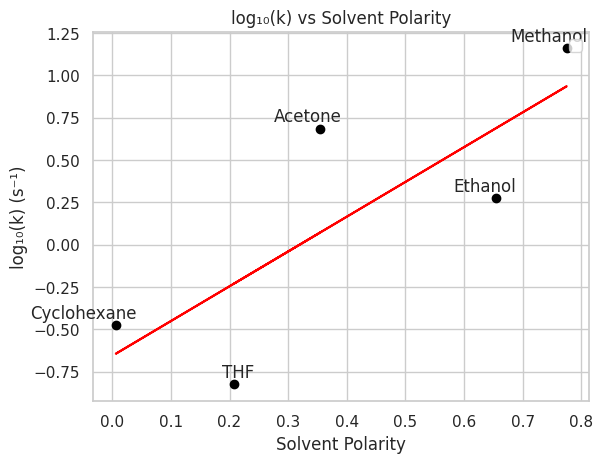

In [ ]:
# Merge the two DataFrames on the 'Solvent' column
merged_df = pd.merge(grouped_info, solvent_df[['Solvent', 'Solvent Polarity']], on='Solvent')

# Filter data for temperatures in the range of 32-34 and exclude DCM
filtered_data = merged_df[
    (merged_df['Temperature (C)'] >= 32) &
    (merged_df['Temperature (C)'] <= 34) &
    (merged_df['Solvent'] != 'DCM')
]

# Fit a linear regression model
X = filtered_data[['Solvent Polarity']]
y = filtered_data['log10(k)']
regressor = LinearRegression()
regressor.fit(X, y)
# Label each point with solvent name
for i, solvent in enumerate(filtered_data['Solvent']):
    plt.annotate(solvent, (filtered_data['Solvent Polarity'].iloc[i], filtered_data['log10(k)'].iloc[i]),
                 textcoords="offset points", xytext=(15,5), ha='right')
# Plot 'log10(k)' against 'Solvent Polarity' for the filtered data
plt.scatter(filtered_data['Solvent Polarity'], filtered_data['log10(k)'],color='black')
plt.plot(X, regressor.predict(X), color='red')
plt.xlabel('Solvent Polarity')
plt.ylabel('log\u2081\u2080(k) (s\u207B\u00B9)')
plt.title('log\u2081\u2080(k) vs Solvent Polarity')
plt.legend()
plt.show()

In [ ]:
print(solvent_df)

       Solvent  Activation Energy Eₐ (J)             A  Solvent Polarity  \
0      Acetone                 52.978438  5.029349e+07             0.355   
1  Cyclohexane                  8.803093  1.040724e-01             0.006   
2          DCM                 15.350458  1.933398e+02             0.309   
3      Ethanol                 34.841409  1.752789e+04             0.654   
4     Methanol                 65.585858  2.336854e+10             0.775   
5          THF                105.300898  1.387928e+15             0.207   

  Max Wavelength (nm)   Arrhenius Constant ln(A)  
0                None                  17.733386  
1              430.28                  -2.262668  
2               448.9                   5.264449  
3              477.36                   9.771549  
4              467.55                  23.874657  
5              467.55                  34.866588  


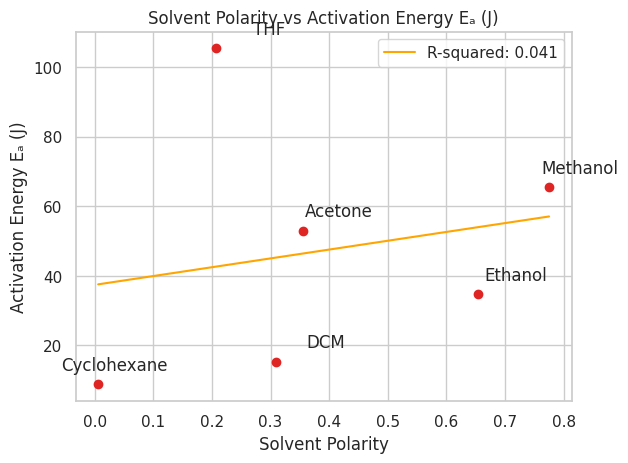

In [ ]:
# Function to plot and fit linear regression with labels
def plot_and_fit_with_labels(x, y, xlabel, ylabel, labels):
    fig, ax = plt.subplots()
    scatter = ax.scatter(x, y,color='#DF2424')

    # Fit linear regression
    model = LinearRegression()
    model.fit(x.values.reshape(-1, 1), y)

    # Plot linear regression line
    x_fit = np.linspace(min(x), max(x), 100).reshape(-1, 1)
    y_fit = model.predict(x_fit)
    ax.plot(x_fit, y_fit, color='orange', label=f'R-squared: {model.score(x.values.reshape(-1, 1), y):.3f}')

    # Label each point with solvent name
    for i, label in enumerate(labels):
        ax.annotate(label, (x.iloc[i], y.iloc[i]), textcoords="offset points", xytext=(50,10), ha='right')

    ax.set_title(f'{xlabel} vs {ylabel}')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.show()

# Plot and fit linear regression for each variable with labels
plot_and_fit_with_labels(solvent_df['Solvent Polarity'], solvent_df['Activation Energy Eₐ (J)'], 'Solvent Polarity', 'Activation Energy Eₐ (J)', solvent_df['Solvent'])
#plot_and_fit_with_labels(solvent_df['Solvent Polarity'], solvent_df['A'], 'Solvent Polarity', 'Absorbance', solvent_df['Solvent'])
#plot_and_fit_with_labels(solvent_df['Solvent Polarity'], solvent_df['ln(A)'], 'Solvent Polarity', 'ln(Absorbance)', solvent_df['Solvent'])

In [ ]:
# Function to filter filenames for ethanol
def filter_ethanol_filenames(filename):
    return filename.lower().startswith('methanol') and "sad" not in filename and "pointy" not in filename

# Count original files
original_file_count = len(os.listdir(folder_path))

# Filter filenames using the ethanol filter function
ethanol_filenames = sorted([filename for filename in os.listdir(folder_path) if filter_ethanol_filenames(filename)])

# Display the number of original files and the filtered ethanol filenames
print(f"Original file count: {original_file_count}")
print(f"Filtered Ethanol file count: {len(ethanol_filenames)}")
print(f"Ethanol Filenames: {ethanol_filenames}")


Original file count: 128
Filtered Ethanol file count: 28
Ethanol Filenames: ['Methanol 23 C, 200 us flash, 2 s duration, 1', 'Methanol 23 C, 200 us flash, 2 s duration, 2', 'Methanol 23 C, 200 us flash, 2 s duration, 3', 'Methanol 23 C, 200 us flash, 2 s duration, 4', 'Methanol 23 C, 200 us flash, 2 s duration, 5', 'Methanol 23 C, 300 us flash, 5 s duration, 1', 'Methanol 28 C, 200 us flash, 2 s duration, 1', 'Methanol 28 C, 200 us flash, 2 s duration, 2', 'Methanol 28 C, 200 us flash, 2 s duration, 3', 'Methanol 28 C, 200 us flash, 2 s duration, 4', 'Methanol 28 C, 200 us flash, 2 s duration, 5', 'Methanol 33 C, 200 us flash, 1 s duration, 1', 'Methanol 33 C, 200 us flash, 1 s duration, 3', 'Methanol 33 C, 200 us flash, 2 s duration, 1', 'Methanol 33 C, 200 us flash, 2 s duration, 2', 'Methanol 33 C, 200 us flash, 2 s duration, 3', 'Methanol 33 C, 200 us flash, 2 s duration, 4', 'Methanol 33 C, 200 us flash, 2 s duration, 5', 'Methanol 38 C, 200 us flash, 2 s duration, 1', 'Methanol 3

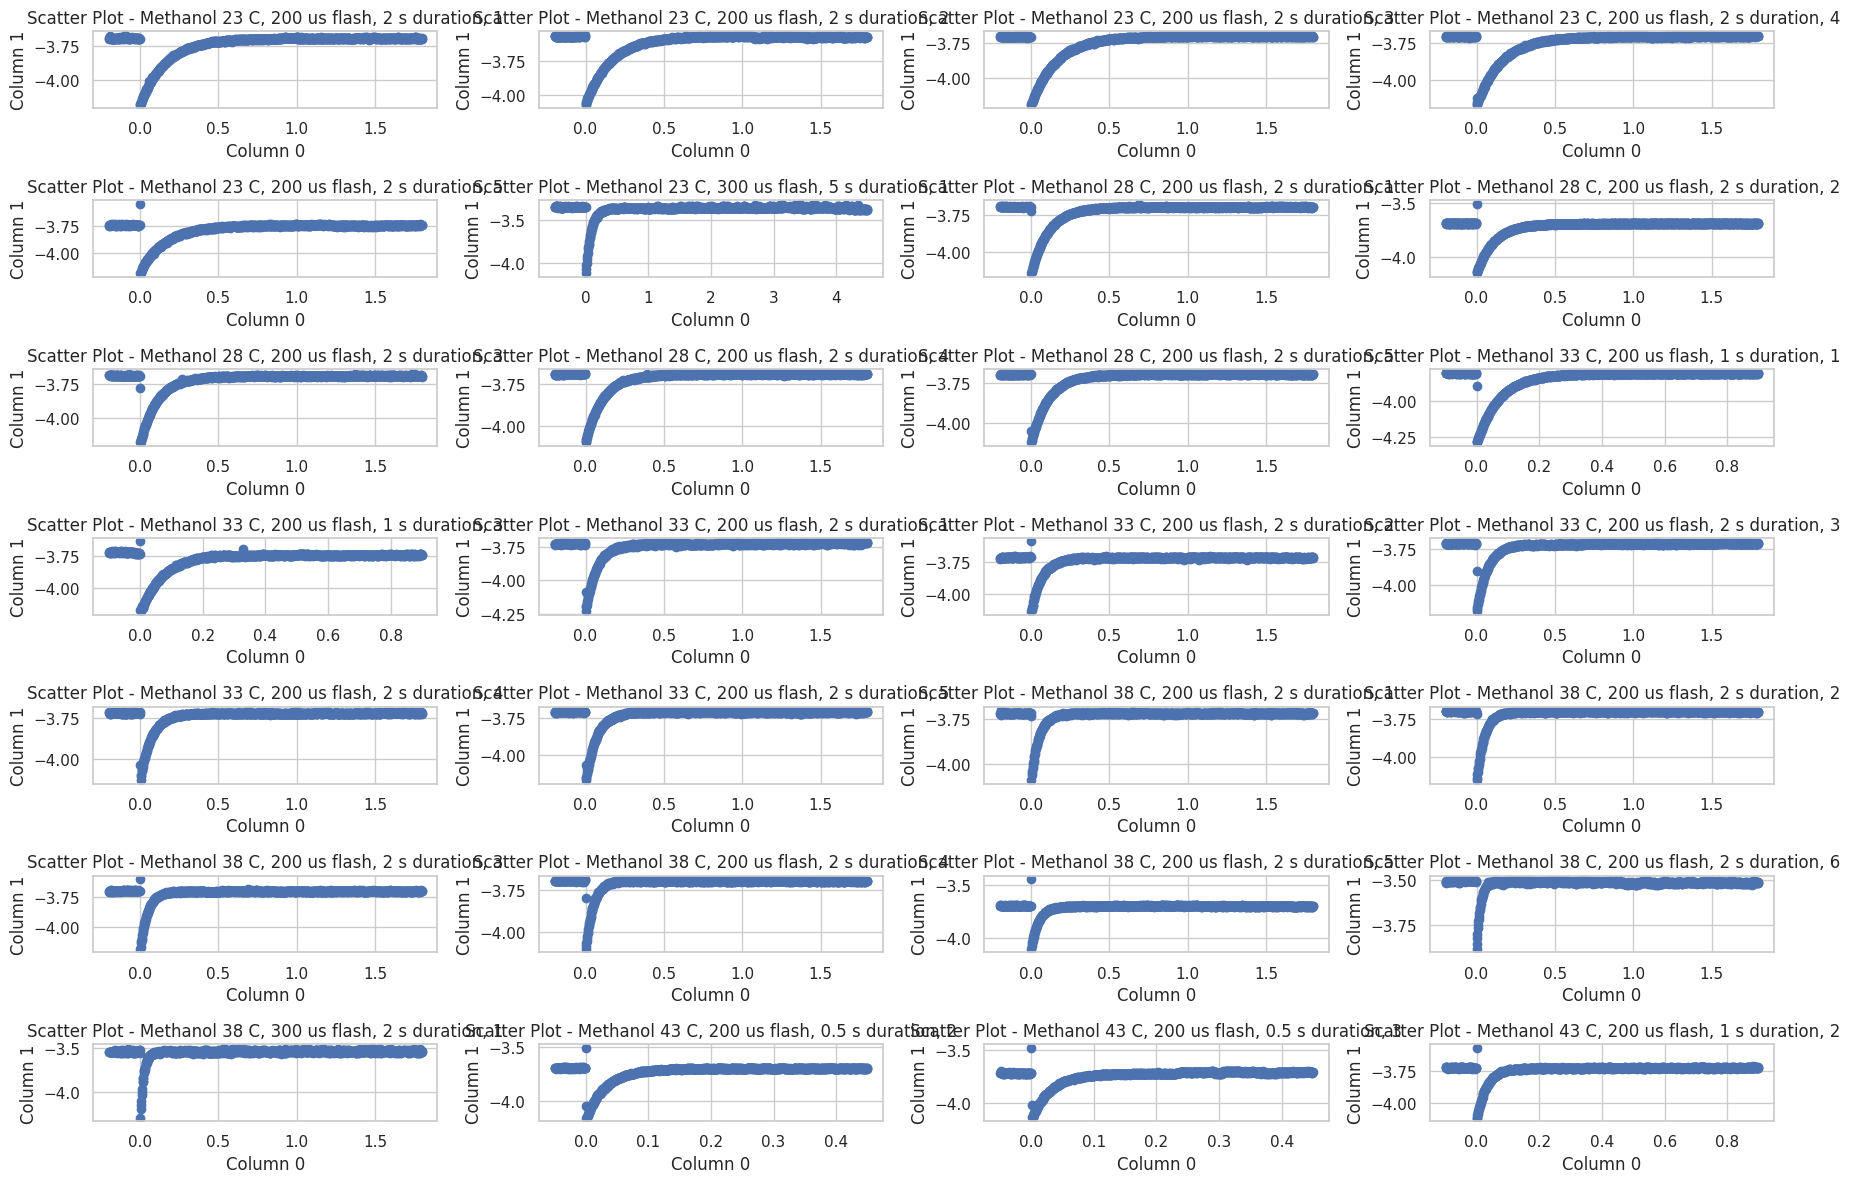

In [ ]:
# Set Seaborn style
sns.set(style='whitegrid')

# Create subplots
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(18, 12))  # Adjust ncols to match the number of files

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through all ethanol filenames
for i, filename in enumerate(ethanol_filenames):
    # Access the DataFrame from the dictionary
    df = dfs.get(filename)

    # Check if the DataFrame exists
    if df is not None:
        # Scatter plot for column 0 against column 1 in the current subplot
        axes[i].scatter(df.iloc[:, 0], df.iloc[:, 1], label=filename)

        # Set subplot labels and title
        axes[i].set_xlabel('Column 0')
        axes[i].set_ylabel('Column 1')
        axes[i].set_title(f'Scatter Plot - {filename}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Dictionary to store selected DataFrames with temperature names
selected_dfs = {}

# Mapping of indices to temperature names
# Mapping of indices to temperature names
temperature_mapping = {7: '28 C', 19: '38 C', 11: '33 C', 0: '23 C',27:'43 C'}


# List of indices for DataFrames 1, 2, 3, and 13
selected_indices = [ 0, 7,11,19,27]

# Iterate through the selected indices
for index in selected_indices:
    # Access the DataFrame from the dictionary
    filename = ethanol_filenames[index]
    df = dfs.get(filename)

    # Check if the DataFrame exists
    if df is not None:
        # Add a 'Temperature' column with the corresponding temperature name
        temperature_name = temperature_mapping.get(index, f'Temperature_{index}')
        df['Temperature'] = temperature_name

        # Store the DataFrame in the dictionary with the temperature name as key
        selected_dfs[temperature_name] = df

# Access and print the selected DataFrames
for temperature_name, df in selected_dfs.items():
    print(f"Methanol DataFrame for {temperature_name}:")
    print(df)

# Access individual DataFrames using their temperature names
ethanol_temp_27C = selected_dfs.get('28 C')
ethanol_temp_37C = selected_dfs.get('38 C')
ethanol_temp_32C = selected_dfs.get('33 C')
ethanol_temp_22C = selected_dfs.get('23 C')
ethanol_temp_43C = selected_dfs.get('43 C')

Methanol DataFrame for 23 C:
     -0.200  3.693 Temperature
0    -0.198 -3.692        23 C
1    -0.196 -3.694        23 C
2    -0.194 -3.693        23 C
3    -0.192 -3.675        23 C
4    -0.190 -3.693        23 C
..      ...    ...         ...
994   1.790 -3.694        23 C
995   1.792 -3.696        23 C
996   1.794 -3.698        23 C
997   1.796 -3.697        23 C
998   1.798 -3.693        23 C

[999 rows x 3 columns]
Methanol DataFrame for 28 C:
     -0.200  3.689 Temperature
0    -0.198 -3.691        28 C
1    -0.196 -3.687        28 C
2    -0.194 -3.688        28 C
3    -0.192 -3.688        28 C
4    -0.190 -3.692        28 C
..      ...    ...         ...
994   1.790 -3.689        28 C
995   1.792 -3.689        28 C
996   1.794 -3.688        28 C
997   1.796 -3.690        28 C
998   1.798 -3.688        28 C

[999 rows x 3 columns]
Methanol DataFrame for 33 C:
     -0.100  3.814 Temperature
0    -0.099 -3.812        33 C
1    -0.098 -3.812        33 C
2    -0.097 -3.811        33

In [ ]:


# Dictionary to store mean 'A_inf' values for each temperature
mean_A_inf_values = {}

# Calculate mean 'A_inf' for each temperature DataFrame
for temperature_name, df in selected_dfs.items():
    # Check if 'A_inf' column exists, if not, calculate it
    if 'A_inf' not in df.columns:
        # Calculate 'A_inf' directly from the last 100 readings
        df['A_inf'] = df.iloc[-100:, 1].mean()


    # Store the mean 'A_inf' value in the dictionary with temperature name as key
    mean_A_inf_values[temperature_name] = df['A_inf'].iloc[-1]

# Access and print the selected DataFrames with the new 'A_inf' column
for temperature_name, df in selected_dfs.items():
    print(f"Methanol DataFrame for {temperature_name}:")
    print(df)


Methanol DataFrame for 23 C:
     -0.200  3.693 Temperature    A_inf
0    -0.198 -3.692        23 C -3.69249
1    -0.196 -3.694        23 C -3.69249
2    -0.194 -3.693        23 C -3.69249
3    -0.192 -3.675        23 C -3.69249
4    -0.190 -3.693        23 C -3.69249
..      ...    ...         ...      ...
994   1.790 -3.694        23 C -3.69249
995   1.792 -3.696        23 C -3.69249
996   1.794 -3.698        23 C -3.69249
997   1.796 -3.697        23 C -3.69249
998   1.798 -3.693        23 C -3.69249

[999 rows x 4 columns]
Methanol DataFrame for 28 C:
     -0.200  3.689 Temperature    A_inf
0    -0.198 -3.691        28 C -3.68845
1    -0.196 -3.687        28 C -3.68845
2    -0.194 -3.688        28 C -3.68845
3    -0.192 -3.688        28 C -3.68845
4    -0.190 -3.692        28 C -3.68845
..      ...    ...         ...      ...
994   1.790 -3.689        28 C -3.68845
995   1.792 -3.689        28 C -3.68845
996   1.794 -3.688        28 C -3.68845
997   1.796 -3.690        28 C -3.6884

In [ ]:
def calculate_ln_A_inf_minus_A_t(row):
    A_inf = row.iloc[-1]  # Assuming A_inf is the second-to-last column
    A_t = row.iloc[1]  # Assuming the second column is 'A_t'
    return np.log(A_inf - A_t)

# **Results:**

Processing DataFrame for 23 C
Filtered DataFrame for 23 C:
     -0.200  3.693 Temperature    A_inf  ln(A_inf - A_t)
104   0.010 -4.151        23 C -3.69249        -0.779773
105   0.012 -4.145        23 C -3.69249        -0.792945
106   0.014 -4.138        23 C -3.69249        -0.808536
107   0.016 -4.133        23 C -3.69249        -0.819822
108   0.018 -4.128        23 C -3.69249        -0.831238
Processing DataFrame for 28 C
Filtered DataFrame for 28 C:
     -0.200  3.689 Temperature    A_inf  ln(A_inf - A_t)
104   0.010 -4.117        28 C -3.68845        -0.847348
105   0.012 -4.107        28 C -3.68845        -0.870959
106   0.014 -4.099        28 C -3.68845        -0.890258
107   0.016 -4.094        28 C -3.68845        -0.902511
108   0.018 -4.089        28 C -3.68845        -0.914917
Processing DataFrame for 33 C
Filtered DataFrame for 33 C:
     -0.100  3.814 Temperature    A_inf  ln(A_inf - A_t)
109   0.010 -4.235        33 C -3.81445        -0.866192
110   0.011 -4.227       

<ipython-input-92-7e13b3286a35>:4: RuntimeWarning: invalid value encountered in log
  return np.log(A_inf - A_t)
<ipython-input-92-7e13b3286a35>:4: RuntimeWarning: invalid value encountered in log
  return np.log(A_inf - A_t)
<ipython-input-92-7e13b3286a35>:4: RuntimeWarning: invalid value encountered in log
  return np.log(A_inf - A_t)
<ipython-input-92-7e13b3286a35>:4: RuntimeWarning: invalid value encountered in log
  return np.log(A_inf - A_t)
<ipython-input-92-7e13b3286a35>:4: RuntimeWarning: invalid value encountered in log
  return np.log(A_inf - A_t)


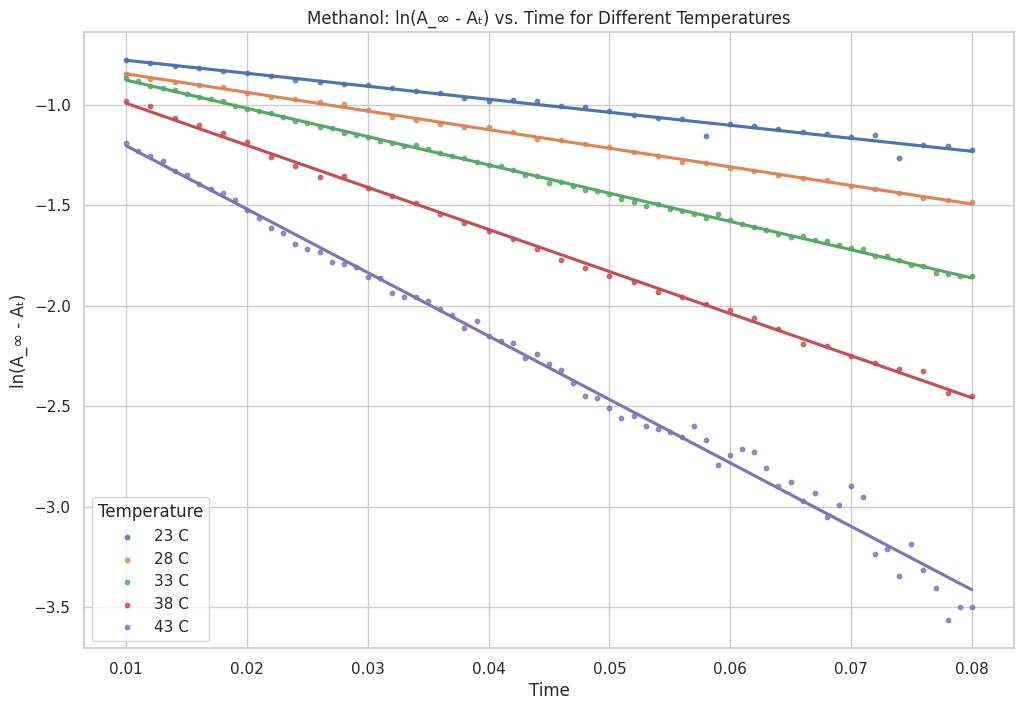

DataFrame with k values:
  Temperature          k
0        23 C   6.464473
1        28 C   9.248844
2        33 C  14.053502
3        38 C  20.913786
4        43 C  31.530175


In [ ]:
# Sort the selected DataFrames by temperature
sorted_dfs = sorted(selected_dfs.items(), key=lambda x: int(x[0].split()[0]))
k_values = {}
# Create a single plot
plt.figure(figsize=(12, 8))

# Iterate through the sorted DataFrames
for temperature_name, df in sorted_dfs:
    print(f"Processing DataFrame for {temperature_name}")
    # Assuming df is your DataFrame and 'column_to_drop' is the column you want to drop
    column_to_drop = 'ln(A_inf - A_t)'

    # Check if the column exists in the DataFrame before dropping
    if column_to_drop in df.columns:
      df.drop(columns=[column_to_drop], inplace=True)
      print(f"Column '{column_to_drop}' dropped.")

    try:
        # Calculate ln(A_inf - A_t) and add it as a new column
        df['ln(A_inf - A_t)'] = df.apply(calculate_ln_A_inf_minus_A_t, axis=1)

        # Filter rows where time is between 0 and 1.5
        filtered_df = df[(df.iloc[:, 0] >= 0.01) & (df.iloc[:, 0] <= 0.08)]
        # Print some debug information
        print(f"Filtered DataFrame for {temperature_name}:")
        print(filtered_df.head())
        # Plot using seaborn and add to the single plot
        sns.regplot(x=filtered_df.columns[0], y='ln(A_inf - A_t)', data=filtered_df, ci=None, scatter_kws={'s': 10}, label=temperature_name)
         # Extract the regression parameters
        slope, _ = np.polyfit(filtered_df.iloc[:, 0], filtered_df['ln(A_inf - A_t)'], 1)

        # Save the negative gradient (k) value in the dictionary with temperature name as key
        k_values[temperature_name] = -slope
    except Exception as e:
        print(f"Error processing DataFrame for {temperature_name}: {e}")
label_expr = "ln(A_∞ - Aₜ)"
# Show the plot with all graphs
plt.title('Methanol: ' +label_expr+' vs. Time for Different Temperatures')
plt.xlabel('Time')
plt.ylabel(label_expr)
plt.legend(title='Temperature', loc='lower left', bbox_to_anchor=(0, 0))
plt.show()
# Create a DataFrame from the k values dictionary
k_df = pd.DataFrame(list(k_values.items()), columns=['Temperature', 'k'])

# Print the k DataFrame
print("DataFrame with k values:")
print(k_df)


In [ ]:
# Remove 'C' from 'Temperature' column
k_df['Temperature'] = k_df['Temperature'].str.replace(' C', '')
# Convert 'Temperature' column to numeric
k_df['Temperature'] = pd.to_numeric(k_df['Temperature'])
k_df['Temperature'] = k_df['Temperature'] + 273.15

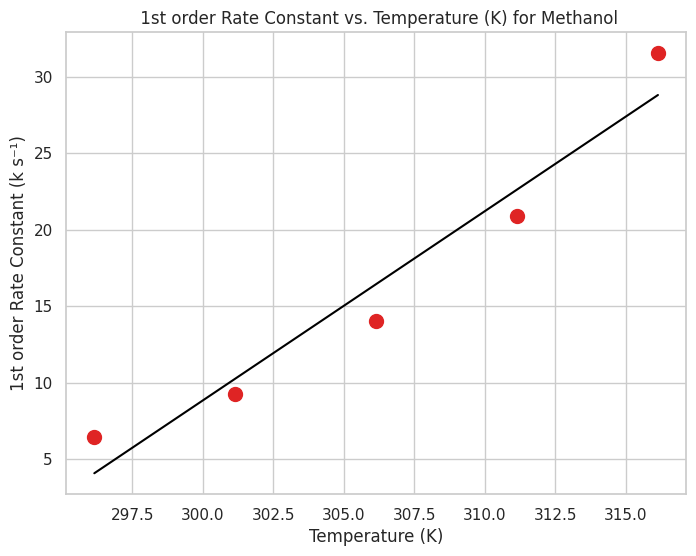

In [ ]:

# Plot using Matplotlib
plt.figure(figsize=(8, 6))
# Scatter plot
plt.scatter(k_df['Temperature'], k_df['k'], s=100, color='#DF2424', label='Scatter Plot')
# Linear regression
regression_model = LinearRegression()
X = k_df[['Temperature']]
y = k_df['k']
regression_model.fit(X, y)
slope = regression_model.coef_[0]
intercept = regression_model.intercept_

# Add linear regression line
plt.plot(X, slope * X + intercept, color='black', )

# Add labels and title
plt.xlabel('Temperature (K)')
plt.ylabel('1st order Rate Constant (k s\u207B\u00B9)')
plt.title(' 1st order Rate Constant vs. Temperature (K) for Methanol')

# Show the plot
plt.show()

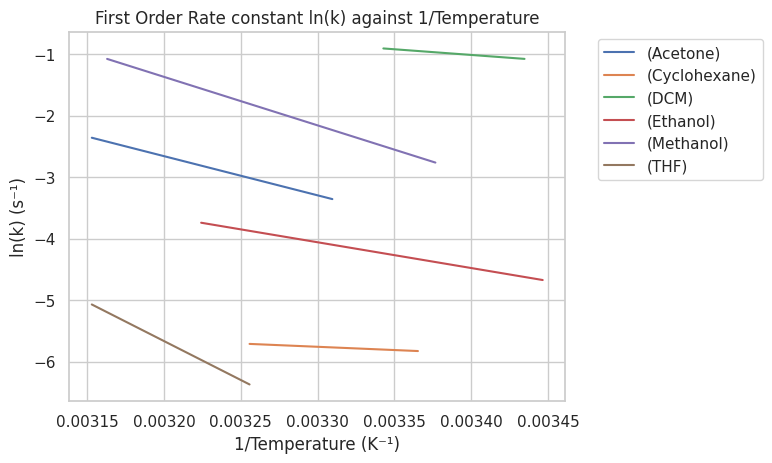

In [ ]:



# Plotting
for solvent, data in grouped_info.groupby('Solvent'):
    # Remove rows with NaN values in 'inv_temp' and 'ln_gradient'
    data = data.dropna(subset=['inv_temp', 'ln_gradient'])

    # Check if there are still data points after removing NaN values
    if data.empty:
        continue

    # Linear regression
    model = LinearRegression()
    model.fit(data[['inv_temp']], data['ln_gradient'])

    # Plotting the line of fit
    plt.plot(data['inv_temp'], model.predict(data[['inv_temp']]), label=f'({solvent})')


plt.xlabel('1/Temperature (K\u207B\u00B9)')
plt.ylabel('ln(k) (s\u207B\u00B9)')
plt.title('First Order Rate constant ln(k) against 1/Temperature')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

<ipython-input-97-c4ce78f83ea1>:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  uvvis_df = pd.read_csv(file_path, delim_whitespace=True, error_bad_lines=False)  # Adjust the delimiter if needed
<ipython-input-97-c4ce78f83ea1>:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  uvvis_df = pd.read_csv(file_path, delim_whitespace=True, error_bad_lines=False)  # Adjust the delimiter if needed
Skipping line 3649: expected 2 fields, saw 4

<ipython-input-97-c4ce78f83ea1>:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  uvvis_df = pd.read_csv(file_path, delim_whitespace=True, error_bad_lines=False)  # Adjust the delimiter if needed
Skipping line 3649: expected 2 fields, saw 4

<ipython-input-97-c4ce78f83ea1>:7: Fut

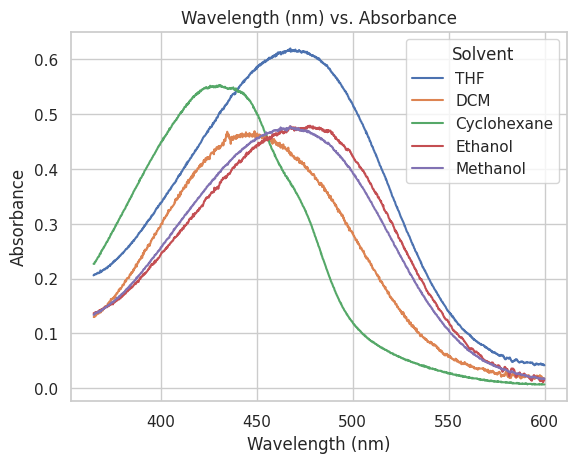

In [ ]:

# Iterate through UVVIS files
for filename in uvvis_files:
    file_path = os.path.join(UVVIS_PATH, filename)

    try:
        # Read the text file into a DataFrame, skipping problematic lines
        uvvis_df = pd.read_csv(file_path, delim_whitespace=True, error_bad_lines=False)  # Adjust the delimiter if needed

        # Check if the DataFrame is not empty
        if not uvvis_df.empty:

            # Filter data within x-range (250 to 600)
            filtered_df = uvvis_df[(uvvis_df.iloc[:, 0] >= 365) & (uvvis_df.iloc[:, 0] <= 600)]

            # Remove '.txt' extension from filename
            label = os.path.splitext(filename)[0]
            # Skip plotting if the solvent is THF
            #if label.lower() == 'thf':
                #continue
            # Plotting first column against the second one
            plt.plot(filtered_df.iloc[:, 0], filtered_df.iloc[:, 1], label=label)
        else:
            print(f"Warning: DataFrame is empty for file {filename}")
    except Exception as e:
        print(f"Error processing file {filename}: {e}")

# Add labels and title
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('Wavelength (nm) vs. Absorbance')

# Add legend to the top-right corner inside the plot
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', title='Solvent')

# Show the plot
plt.show()

In [ ]:
pip install adjustText


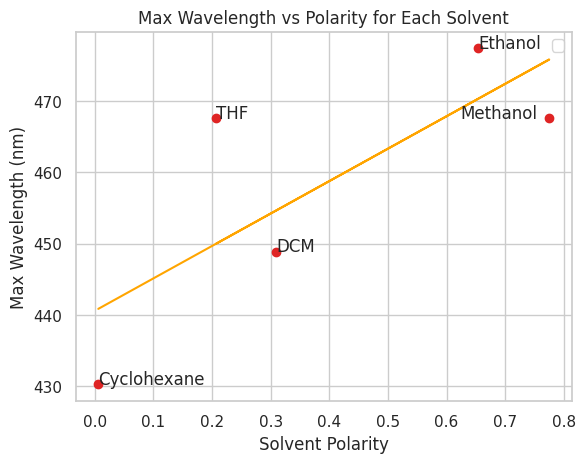

In [ ]:

# Filter out rows where 'Max Wavelength' is not available
filtered_df = solvent_df.dropna(subset=['Max Wavelength (nm)'])

# Plotting
# Plotting with dots colored in #DF2424
plt.scatter(filtered_df['Solvent Polarity'], filtered_df['Max Wavelength (nm)'], color='#DF2424')

plt.title('Max Wavelength vs Polarity for Each Solvent')
plt.xlabel('Solvent Polarity')
plt.ylabel('Max Wavelength (nm)')

# Add labels for each solvent with manual adjustment for 'Methanol'
for i, txt in enumerate(filtered_df['Solvent']):
    if txt == 'Methanol':
        plt.annotate(txt,
                     (filtered_df['Solvent Polarity'].iloc[i] - 0.02, filtered_df['Max Wavelength (nm)'].iloc[i]),
                     xytext=(0, 0),  # Adjust these values to fine-tune the label position
                     textcoords='offset points',
                     ha='right')
    else:
        plt.annotate(txt, (filtered_df['Solvent Polarity'].iloc[i], filtered_df['Max Wavelength (nm)'].iloc[i]))

# Fit a line of best fit
x = filtered_df['Solvent Polarity'].values.reshape(-1, 1)
y = filtered_df['Max Wavelength (nm)'].values
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)

# Plot the line of best fit
plt.plot(filtered_df['Solvent Polarity'], y_pred, color='orange')


plt.legend()
plt.show()

In [ ]:
print(filtered_df.sort_values('Solvent Polarity', ascending=True))

       Solvent  Activation Energy Eₐ (J)             A  Solvent Polarity  \
1  Cyclohexane                  8.803093  1.040724e-01             0.006   
5          THF                105.300898  1.387928e+15             0.207   
2          DCM                 15.350458  1.933398e+02             0.309   
3      Ethanol                 34.841409  1.752789e+04             0.654   
4     Methanol                 65.585858  2.336854e+10             0.775   

  Max Wavelength (nm)   Arrhenius Constant ln(A)  
1              430.28                  -2.262668  
5              467.55                  34.866588  
2               448.9                   5.264449  
3              477.36                   9.771549  
4              467.55                  23.874657  


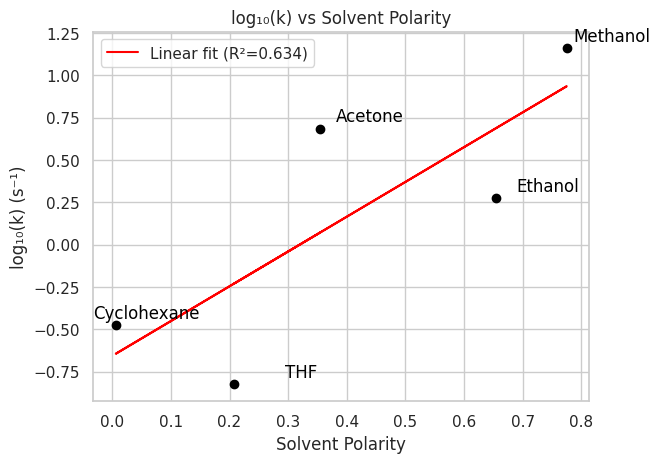

In [ ]:
# Fit a linear regression model
X = filtered_data[['Solvent Polarity']]
y = filtered_data['log10(k)']
regressor = LinearRegression()
regressor.fit(X, y)

# Calculate R^2 value
y_pred = regressor.predict(X)
r_squared = r2_score(y, y_pred)

# Label each point with solvent name and change scatter plot to black
for i, solvent in enumerate(filtered_data['Solvent']):
    plt.annotate(solvent, (filtered_data['Solvent Polarity'].iloc[i], filtered_data['log10(k)'].iloc[i]),
                 textcoords="offset points", xytext=(60,5), ha='right', color='black')

# Change plot line to red and scatter plot to black
plt.scatter(filtered_data['Solvent Polarity'], filtered_data['log10(k)'], color='black')
plt.plot(X, y_pred, color='red', label=f'Linear fit (R²={r_squared:.3f})')

plt.xlabel('Solvent Polarity')
plt.ylabel('log\u2081\u2080(k) (s\u207B\u00B9)')
plt.title('log\u2081\u2080(k) vs Solvent Polarity')

plt.legend()
plt.show()

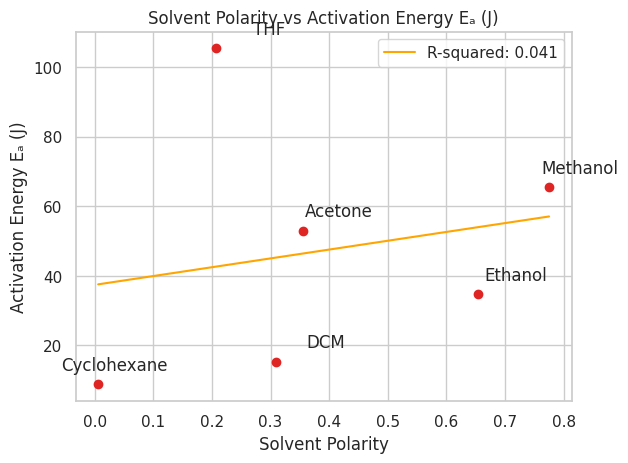

In [ ]:
# Plot and fit linear regression for each variable with labels
plot_and_fit_with_labels(solvent_df['Solvent Polarity'], solvent_df['Activation Energy Eₐ (J)'], 'Solvent Polarity', 'Activation Energy Eₐ (J)', solvent_df['Solvent'])

In [ ]:
'''# Extracting data
X = solvent_df[['Solvent Polarity']]
y = np.log(solvent_df[' Arrhenius Constant ln(A)'])

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate R^2 value
r2_value = r2_score(y, y_pred)

# Plot the scatter plot
plt.scatter(X, y, label='Data points')

# Plot the regression line
plt.plot(X, y_pred, color='red', label=f'Linear Regression (R^2 = {r2_value:.2f})')

# Add labels and title
plt.xlabel('Solvent Polarity')
plt.ylabel('Arrhenius Constant ln(A)')
plt.title('Scatter plot of ln(A) against Solvent Polarity with Linear Regression')

# Add legend
plt.legend()'''

# Show the plot
plt.show()

In [ ]:
#solvent_df.columns
# Rename the colum
column_to_drop = "Isomerisation Energy E\u2021ₐ ×10³ (mol/J)"

if column_to_drop in solvent_df.columns:
    solvent_df.drop(column_to_drop, axis=1, inplace=True)
solvent_df.rename(columns={'Isomerisation Energy E\u2021ₐ ×10³ (mol/J))': 'Activation Energy Eₐ'}, inplace=True)
print(solvent_df)

       Solvent  Activation Energy Eₐ (J)             A  Solvent Polarity  \
0      Acetone                 52.978438  5.029349e+07             0.355   
1  Cyclohexane                  8.803093  1.040724e-01             0.006   
2          DCM                 15.350458  1.933398e+02             0.309   
3      Ethanol                 34.841409  1.752789e+04             0.654   
4     Methanol                 65.585858  2.336854e+10             0.775   
5          THF                105.300898  1.387928e+15             0.207   

  Max Wavelength (nm)   Arrhenius Constant ln(A)  
0                None                  17.733386  
1              430.28                  -2.262668  
2               448.9                   5.264449  
3              477.36                   9.771549  
4              467.55                  23.874657  
5              467.55                  34.866588  


In [ ]:
#calculating  the standard enthalpy of activation ∆‡H0
T = 273.15
solvent_df.rename(columns={'Activation Energy Eₐ (J mol⁻¹) x 10³': 'Activation Energy Eₐ (J)'}, inplace=True)
# Take Cyclohexane's activation energy and multiply by 10
#cyclohexane_index = solvent_df.index[solvent_df['Solvent'] == 'Cyclohexane'].tolist()[0]
# Calculate the standard enthalpy of activation for each solvent
solvent_df['Standard Enthalpy of Activation ∆‡H₀ x 10⁻³(J mol⁻¹)'] = (solvent_df['Activation Energy Eₐ (J)']*1000 - R * T)*0.001

# Constants
h = 6.626e-34  # Planck constant (Joule-second)
kB = 1.381e-23  # Boltzmann constant (Joule/Kelvin)
e = 2.71828  # Euler's number
# Calculate the standard entropy of activation for each solvent
solvent_df['Standard Entropy of Activation ∆‡S₀ (J K⁻¹ mol⁻¹)'] =(R * np.log((solvent_df['A'] * h) / (kB * T * e)))
# Calculate the Gibbs free energy of activation for each solvent
solvent_df['Gibbs Free Energy of Activation ∆‡G₀ x 10⁻³ (J mol⁻¹)'] = (solvent_df['Standard Enthalpy of Activation ∆‡H₀ x 10⁻³(J mol⁻¹)']*1000 - T * solvent_df['Standard Entropy of Activation ∆‡S₀ (J K⁻¹ mol⁻¹)'])*0.001
# Calculate the quasi-equilibrium constant for each solvent
solvent_df['Quasi-Equilibrium Constant K‡'] = np.exp(-(solvent_df['Standard Enthalpy of Activation ∆‡H₀ x 10⁻³(J mol⁻¹)']*1000)/ (R * T))
solvent_df.rename(columns={'Activation Energy Eₐ (J)': 'Activation Energy Eₐ x 10³ (J mol⁻¹)'}, inplace=True)
# Print the updated DataFrame
print(solvent_df)


       Solvent  Activation Energy Eₐ x 10³ (J mol⁻¹)             A  \
0      Acetone                             52.978438  5.029349e+07   
1  Cyclohexane                              8.803093  1.040724e-01   
2          DCM                             15.350458  1.933398e+02   
3      Ethanol                             34.841409  1.752789e+04   
4     Methanol                             65.585858  2.336854e+10   
5          THF                            105.300898  1.387928e+15   

   Solvent Polarity Max Wavelength (nm)   Arrhenius Constant ln(A)  \
0             0.355                None                  17.733386   
1             0.006              430.28                  -2.262668   
2             0.309               448.9                   5.264449   
3             0.654              477.36                   9.771549   
4             0.775              467.55                  23.874657   
5             0.207              467.55                  34.866588   

   Standard Enthal

In [ ]:
# Sample data
data = {'Solvent': ['Acetone', 'Cyclohexane', 'DCM', 'Ethanol', 'Methanol', 'THF']}
# Define a function to classify solvents
def classify_solvent(solvent):
    protic_solvents = ['Water', 'Methanol', 'Ethanol']
    if solvent in protic_solvents:
        return 'Protic'
    else:
        return 'Aprotic'
# Apply the function to create the 'Type' column
solvent_df['Type'] = solvent_df['Solvent'].apply(classify_solvent)


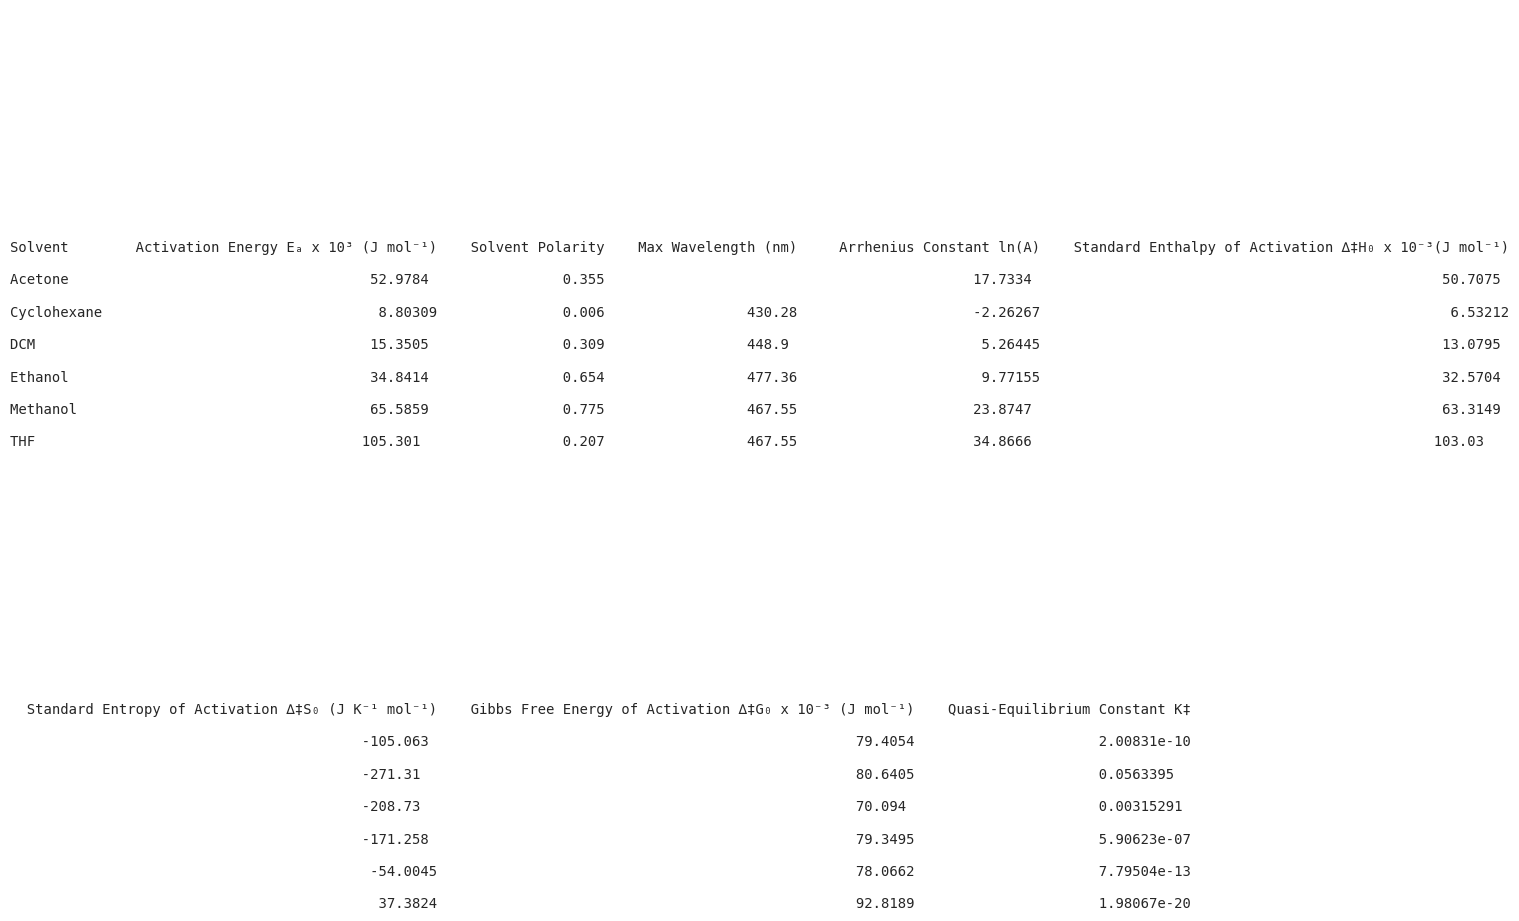

In [ ]:
from tabulate import tabulate
# Rename the column using HTML formatting for superscripts

# Drop 'Type' and 'A' columns
solvent_df_dropped = solvent_df.drop(columns=['Type', 'A'])

# Exclude the 'A' column during formatting
significant_figures = 3

solvent_df_formatted = solvent_df_dropped.copy()
# Split the DataFrame into two parts
first_part = solvent_df_formatted.iloc[:, :6]
second_part = solvent_df_formatted.iloc[:, 6:]

# Convert the DataFrames to pretty tables
table_first_part = tabulate(first_part, headers='keys', tablefmt='plain', showindex=False)
table_second_part = tabulate(second_part, headers='keys', tablefmt='plain', showindex=False)

# Increase spacing between rows for both tables
table_first_part_with_spacing = table_first_part.replace('\n', '\n\n')
table_second_part_with_spacing = table_second_part.replace('\n', '\n\n')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Hide axis
ax.axis('off')

# Plot the first table as text
ax.text(0, 0.5, table_first_part_with_spacing, va='top', ha='left', fontsize=10, family='monospace')

# Plot the second table as text below the first one
ax.text(0, -0.5, table_second_part_with_spacing, va='top', ha='left', fontsize=10, family='monospace')

# Save the figure as PNG or JPEG
plt.savefig('formatted_table.png', bbox_inches='tight', dpi=300)  # Change the file extension for JPEG

# Show the plot (optional)
plt.show()

In [ ]:
# Convert the DataFrame to a pretty table with wider spacing
table = tabulate(solvent_df_formatted, headers='keys', tablefmt='fancy_grid', showindex=False)

# Save the figure as PNG or JPEG
plt.savefig('formatted_table.png', bbox_inches='tight', dpi=300)  # Change the file extension for JPEG

# Show the plot (optional)
plt.show()

<Figure size 640x480 with 0 Axes>

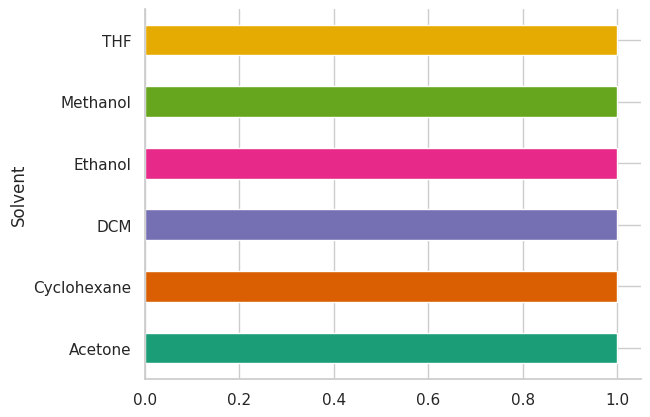

In [ ]:
# @title Solvent

from matplotlib import pyplot as plt
import seaborn as sns
solvent_df_formatted.groupby('Solvent').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-108-1432465cc240>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = solvent_df.corr()


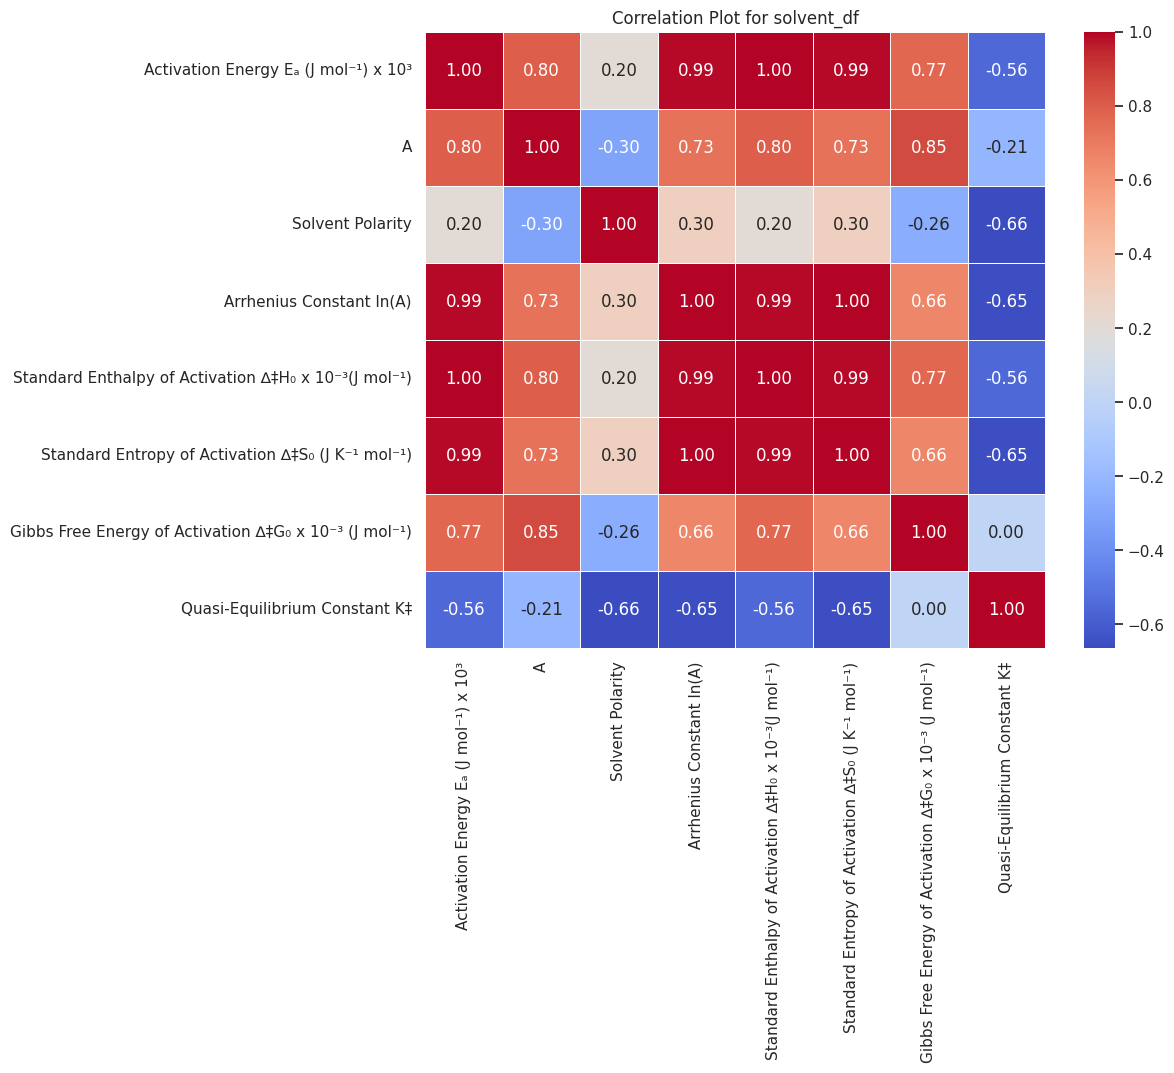

In [ ]:


# Calculate the correlation matrix
correlation_matrix = solvent_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Plot for solvent_df')
plt.show()

#pi star values ]
 C. Reichardt, Solvents and Solvent Effects in Organic Chemistry, third ed.,
WILEY-VCH, 2002, pp. 433.